#Abstract

Inflation has been plaguing societies since the ancient times, at occasions leading to complete market instability and significantly dropping the living standards of people in societies. In less severe scenarios, inflation adds uncertainty to investment decisions and shortens the investment horizon in emerging markets, making the generation of accurate inflation forecasting models imperative.
This paper seeks to compare three different widely used approaches in the domain of macroeconomic forecasting in determining which one of those approaches shows more promising results for short term inflation prediction. More specifically, the first method that is employed to forecast inflation is ARIMA, an extensively used, traditional, time series forecasting approach that focuses solely on past CPI values to generate predictions. Moreover, an LSTM Artificial Neural Network has been designed to forecast inflation, as a contemporary deep learning approach often used for regression tasks and time series forecasting. Finally, XGBoost, an ensemble algorithm that combines simple decision trees (base learners) is the third model that has been generated, which is the proposed method for inflation forecasting in this research project. All three methods are compared to a persistence model, which constitutes a challenging baseline to surpass in terms of its forecasting performance.
Findings show that, overall, XGBoost outperformed both the ARIMA and the LSTM ANN in terms of forecasting performance (RMSE). The ARIMA model demonstrated better performance than that of the LSTM, showcasing that simpler models may be more effective when working with only a limited amount of data. However, it should be highlighted that the LSTM model showed promising results in capturing unexpected inflation dynamics, particularly during extreme scenarios. On the other hand, although XGBoost exhibited the smallest RMSE score and most accurately predicted the direction of CPI changes, the model was completely unable to capture the extreme inflation spikes that occurred after 2022. The persistence baseline, although it exhibited the best results in terms of RMSE, it does not capture at all the direction of changes in CPI values, and hence its reliability as a forecasting model is compromised.

# Data Reading

In [ ]:
#First import pandas
import pandas as pd

In [ ]:
#read the excel file into a pandas df
HICP = pd.read_excel("HICP.xls")

In [ ]:
#print the df
HICP

Date   CPI_index  HICP_index  excl_energy_unprocessed_food  \
0   1959-01-01    1.083857         NaN                           NaN   
1   1959-02-01    1.083857         NaN                           NaN   
2   1959-03-01    1.088166         NaN                           NaN   
3   1959-04-01    1.096785         NaN                           NaN   
4   1959-05-01    1.094630         NaN                           NaN   
..         ...         ...         ...                           ...   
763 2022-08-01  111.211375      111.98                    106.524829   
764 2022-09-01  114.478049      115.29                    109.963764   
765 2022-10-01  113.157924      113.85                    110.297165   
766 2022-11-01  113.146170      113.55                    109.900408   
767 2022-12-01  112.532917      112.81                    109.988219   

          goods        food  unprocessed_food  processed_food  \
0           NaN         NaN               NaN             NaN   
1           NaN         NaN               NaN             NaN   
2           NaN         NaN               NaN             NaN   
3           NaN         NaN               NaN             NaN   
4           NaN         NaN               NaN             NaN   
..          ...         ...               ...             ...   
763  114.073622  117.002893        120.871360      115.494272   
764  118.657844  118.254739        121.697408      116.918722   
765  116.682760  119.653004        123.285026      118.241135   
766  116.894534  120.748222        123.974925      119.500611   
767  116.186407  120.704720        122.678474      119.963283   

     industrial_goods  industrial_goods_excl_energy      energy    services  
0                 NaN                           NaN         NaN         NaN  
1                 NaN                           NaN         NaN         NaN  
2                 NaN                           NaN         NaN         NaN  
3                 NaN                           NaN         NaN         NaN  
4                 NaN                           NaN         NaN         NaN  
..                ...                           ...         ...         ...  
763        111.546661                     94.547139  158.076730  108.743760  
764        118.630878                    102.834306  162.319534  110.240788  
765        114.117628                    104.187913  142.771690  109.554283  
766        113.662650                    103.619222  142.591773  108.539567  
767        112.455337                    104.928646  134.956945  107.760221  

[768 rows x 12 columns]

In [ ]:
#we just need the HICP data in this df, so CPI is cleared
del HICP['CPI_index']

In [ ]:
HICP

Date  HICP_index  excl_energy_unprocessed_food       goods  \
0   1959-01-01         NaN                           NaN         NaN   
1   1959-02-01         NaN                           NaN         NaN   
2   1959-03-01         NaN                           NaN         NaN   
3   1959-04-01         NaN                           NaN         NaN   
4   1959-05-01         NaN                           NaN         NaN   
..         ...         ...                           ...         ...   
763 2022-08-01      111.98                    106.524829  114.073622   
764 2022-09-01      115.29                    109.963764  118.657844   
765 2022-10-01      113.85                    110.297165  116.682760   
766 2022-11-01      113.55                    109.900408  116.894534   
767 2022-12-01      112.81                    109.988219  116.186407   

           food  unprocessed_food  processed_food  industrial_goods  \
0           NaN               NaN             NaN               NaN   
1           NaN               NaN             NaN               NaN   
2           NaN               NaN             NaN               NaN   
3           NaN               NaN             NaN               NaN   
4           NaN               NaN             NaN               NaN   
..          ...               ...             ...               ...   
763  117.002893        120.871360      115.494272        111.546661   
764  118.254739        121.697408      116.918722        118.630878   
765  119.653004        123.285026      118.241135        114.117628   
766  120.748222        123.974925      119.500611        113.662650   
767  120.704720        122.678474      119.963283        112.455337   

     industrial_goods_excl_energy      energy    services  
0                             NaN         NaN         NaN  
1                             NaN         NaN         NaN  
2                             NaN         NaN         NaN  
3                             NaN         NaN         NaN  
4                             NaN         NaN         NaN  
..                            ...         ...         ...  
763                     94.547139  158.076730  108.743760  
764                    102.834306  162.319534  110.240788  
765                    104.187913  142.771690  109.554283  
766                    103.619222  142.591773  108.539567  
767                    104.928646  134.956945  107.760221  

[768 rows x 11 columns]

In [ ]:
## let's drop all HICP values that are null. This only includes values before the day, HICP data was first recorded (1995).
HICP.dropna(inplace = True)

In [ ]:
HICP

Date  HICP_index  excl_energy_unprocessed_food       goods  \
432 1995-01-01   54.747300                     56.245224   56.005166   
433 1995-02-01   54.502071                     55.914581   55.862441   
434 1995-03-01   55.850829                     57.630757   57.612067   
435 1995-04-01   56.463900                     58.177839   58.030847   
436 1995-05-01   57.015665                     58.101259   58.954873   
..         ...         ...                           ...         ...   
763 2022-08-01  111.980000                    106.524829  114.073622   
764 2022-09-01  115.290000                    109.963764  118.657844   
765 2022-10-01  113.850000                    110.297165  116.682760   
766 2022-11-01  113.550000                    109.900408  116.894534   
767 2022-12-01  112.810000                    109.988219  116.186407   

           food  unprocessed_food  processed_food  industrial_goods  \
432   51.481125         58.993265       46.968401         60.104793   
433   52.008036         59.336870       47.647283         59.453585   
434   52.313092         59.728729       47.915240         62.317536   
435   52.988901         61.129156       48.150988         62.546859   
436   53.402195         61.959372       48.386472         63.868544   
..          ...               ...             ...               ...   
763  117.002893        120.871360      115.494272        111.546661   
764  118.254739        121.697408      116.918722        118.630878   
765  119.653004        123.285026      118.241135        114.117628   
766  120.748222        123.974925      119.500611        113.662650   
767  120.704720        122.678474      119.963283        112.455337   

     industrial_goods_excl_energy      energy    services  
432                     68.362693   36.940809   51.675504  
433                     67.316064   37.055531   51.377277  
434                     71.647590   36.898483   51.669497  
435                     71.851482   37.155155   52.705419  
436                     72.097707   40.915999   52.162499  
..                            ...         ...         ...  
763                     94.547139  158.076730  108.743760  
764                    102.834306  162.319534  110.240788  
765                    104.187913  142.771690  109.554283  
766                    103.619222  142.591773  108.539567  
767                    104.928646  134.956945  107.760221  

[336 rows x 11 columns]

In [ ]:
#now let's read CPI
CPI = pd.read_excel("HICP.xls")

In [ ]:
CPI

Date   CPI_index  HICP_index  excl_energy_unprocessed_food  \
0   1959-01-01    1.083857         NaN                           NaN   
1   1959-02-01    1.083857         NaN                           NaN   
2   1959-03-01    1.088166         NaN                           NaN   
3   1959-04-01    1.096785         NaN                           NaN   
4   1959-05-01    1.094630         NaN                           NaN   
..         ...         ...         ...                           ...   
763 2022-08-01  111.211375      111.98                    106.524829   
764 2022-09-01  114.478049      115.29                    109.963764   
765 2022-10-01  113.157924      113.85                    110.297165   
766 2022-11-01  113.146170      113.55                    109.900408   
767 2022-12-01  112.532917      112.81                    109.988219   

          goods        food  unprocessed_food  processed_food  \
0           NaN         NaN               NaN             NaN   
1           NaN         NaN               NaN             NaN   
2           NaN         NaN               NaN             NaN   
3           NaN         NaN               NaN             NaN   
4           NaN         NaN               NaN             NaN   
..          ...         ...               ...             ...   
763  114.073622  117.002893        120.871360      115.494272   
764  118.657844  118.254739        121.697408      116.918722   
765  116.682760  119.653004        123.285026      118.241135   
766  116.894534  120.748222        123.974925      119.500611   
767  116.186407  120.704720        122.678474      119.963283   

     industrial_goods  industrial_goods_excl_energy      energy    services  
0                 NaN                           NaN         NaN         NaN  
1                 NaN                           NaN         NaN         NaN  
2                 NaN                           NaN         NaN         NaN  
3                 NaN                           NaN         NaN         NaN  
4                 NaN                           NaN         NaN         NaN  
..                ...                           ...         ...         ...  
763        111.546661                     94.547139  158.076730  108.743760  
764        118.630878                    102.834306  162.319534  110.240788  
765        114.117628                    104.187913  142.771690  109.554283  
766        113.662650                    103.619222  142.591773  108.539567  
767        112.455337                    104.928646  134.956945  107.760221  

[768 rows x 12 columns]

In [ ]:
#drop all irrelevant vars
CPI.drop(CPI.iloc[:, 2:], inplace=True, axis=1)

In [ ]:
CPI

Date   CPI_index
0   1959-01-01    1.083857
1   1959-02-01    1.083857
2   1959-03-01    1.088166
3   1959-04-01    1.096785
4   1959-05-01    1.094630
..         ...         ...
763 2022-08-01  111.211375
764 2022-09-01  114.478049
765 2022-10-01  113.157924
766 2022-11-01  113.146170
767 2022-12-01  112.532917

[768 rows x 2 columns]

In [ ]:
### let's read all variables into dataframes
GDP = pd.read_excel('GDP_quarterly.xls')

In [ ]:
monthly_GDP.drop(columns = (2, :))

SyntaxError: invalid syntax (<ipython-input-13-a7ad6b543915>, line 1)

In [ ]:
###
M3 = pd.read_excel('M3.xls')

In [ ]:
##
capital_flows = pd.read_csv('capital_flows.csv')

In [ ]:
###
energy = pd.read_excel('CMO.xlsx')

In [ ]:
###
electric_consumption = pd.read_excel('electric_energy_consumption.xlsx')

In [ ]:
###
import_prices = pd.read_csv('import_prices.csv')

In [ ]:
###
greek_bonds = pd.read_excel('greek_bonds_maturity.xlsx')

In [ ]:
###
business_confidence = pd.read_csv('business_confidence.csv')

In [ ]:
###
Capacity_utilization = pd.read_csv('Capacity_utilization.csv')

In [ ]:
###
industrial_production = pd.read_csv('industrial_production.csv')

In [ ]:
###
manufacturing_production = pd.read_csv('manufacturing_production.csv')

In [ ]:
###
retail_turnover = pd.read_excel('retail_turnover_index.xlsx')

In [ ]:
###
PPI = pd.read_csv('PPI_monthly.csv')

In [ ]:
###
interest_rates = pd.read_excel('average_interest_rates.xlsx')

In [ ]:
interest_rates

Date  Average_interest_rates
0   2002-09-01                    6.66
1   2002-10-01                    6.61
2   2002-11-01                    6.38
3   2002-12-01                    6.29
4   2003-01-01                    6.32
..         ...                     ...
238 2022-07-01                    3.71
239 2022-08-01                    4.00
240 2022-09-01                    4.60
241 2022-10-01                    4.86
242 2022-11-01                    4.89

[243 rows x 2 columns]

In [ ]:
###
loans = pd.read_excel('loans.xlsx')

In [ ]:
###
deposits = pd.read_excel('deposits.xlsx')

In [ ]:
###
unemployment = pd.read_excel('unemployment.xls')

In [ ]:
###
wages = pd.read_excel('wages_index.xlsx')

In [ ]:
wages

Date  Index  Ι  Unnamed: 2  Unnamed: 3
0  2000-03-01      76.6         NaN         NaN
1  2000-06-01      87.1         NaN         NaN
2  2000-09-01      93.0         NaN         NaN
3  2000-12-01     103.5         NaN         NaN
4  2001-03-01      82.1         NaN         NaN
..        ...       ...         ...         ...
87 2021-12-01     118.8         NaN         NaN
88 2022-03-01     100.5         NaN         NaN
89 2022-06-01     112.3         NaN         NaN
90 2022-09-01     121.3         NaN         NaN
91 2022-12-01     124.1         NaN         NaN

[92 rows x 4 columns]

In [ ]:
###
stock_market = pd.read_csv('stock_market.csv')

In [ ]:
stock_market

Date    Value
0     2023-02-03  1033.44
1     2023-02-02  1029.68
2     2023-02-01  1027.25
3     2023-01-31  1022.82
4     2023-01-30  1024.75
...          ...      ...
8776  1987-01-09   103.23
8777  1987-01-08   101.33
8778  1987-01-07    99.76
8779  1987-01-05    98.51
8780  1987-01-02    97.36

[8781 rows x 2 columns]

Now that all the variables have been read into pandas, we can start exploring them. Let's start with our basic predictor: CPI.

# CPI & HICP

In [ ]:
#Let's see the basic statistics
CPI.describe()

CPI_index
count  768.000000
mean    44.642449
std     41.412871
min      1.083857
25%      2.293768
50%     32.690111
75%     88.489198
max    114.478049

In total it seems like there are 768 values. Looking at the mean value of the index it seems like that most of the times the CPI is bellow the base year's CPI. However this occurs because the base year is 2020 and at the same time the data date back to 1959. Hence, the mean does not give us any valuable information. It should be interesting to generate a graph.

In [ ]:
#we will plot the cpi line using matplot lib
import matplotlib.pyplot as plt

In [ ]:
#Let's check if the Date is datetime dtype
CPI['Date'].dtype

dtype('<M8[ns]')

In [ ]:
#Let's set the Date as the index
CPI.set_index('Date', inplace = True)

In [ ]:
#Everything looks ok
CPI.tail(24)

CPI_index
Date                  
2021-01-01   98.519355
2021-02-01   98.722872
2021-03-01   99.910763
2021-04-01  100.819348
2021-05-01  100.425331
2021-06-01  101.364410
2021-07-01   99.957605
2021-08-01   99.827284
2021-09-01  102.190627
2021-10-01  103.752700
2021-11-01  104.244412
2021-12-01  104.951198
2022-01-01  104.676525
2022-02-01  105.844748
2022-03-01  108.752901
2022-04-01  111.075508
2022-05-01  111.802846
2022-06-01  113.623166
2022-07-01  111.543407
2022-08-01  111.211375
2022-09-01  114.478049
2022-10-01  113.157924
2022-11-01  113.146170
2022-12-01  112.532917

In [ ]:
from matplotlib import style
plt.style.use('default')

In [ ]:
CPI

CPI_index
Date                  
1959-01-01    1.083857
1959-02-01    1.083857
1959-03-01    1.088166
1959-04-01    1.096785
1959-05-01    1.094630
...                ...
2022-08-01  111.211375
2022-09-01  114.478049
2022-10-01  113.157924
2022-11-01  113.146170
2022-12-01  112.532917

[768 rows x 1 columns]

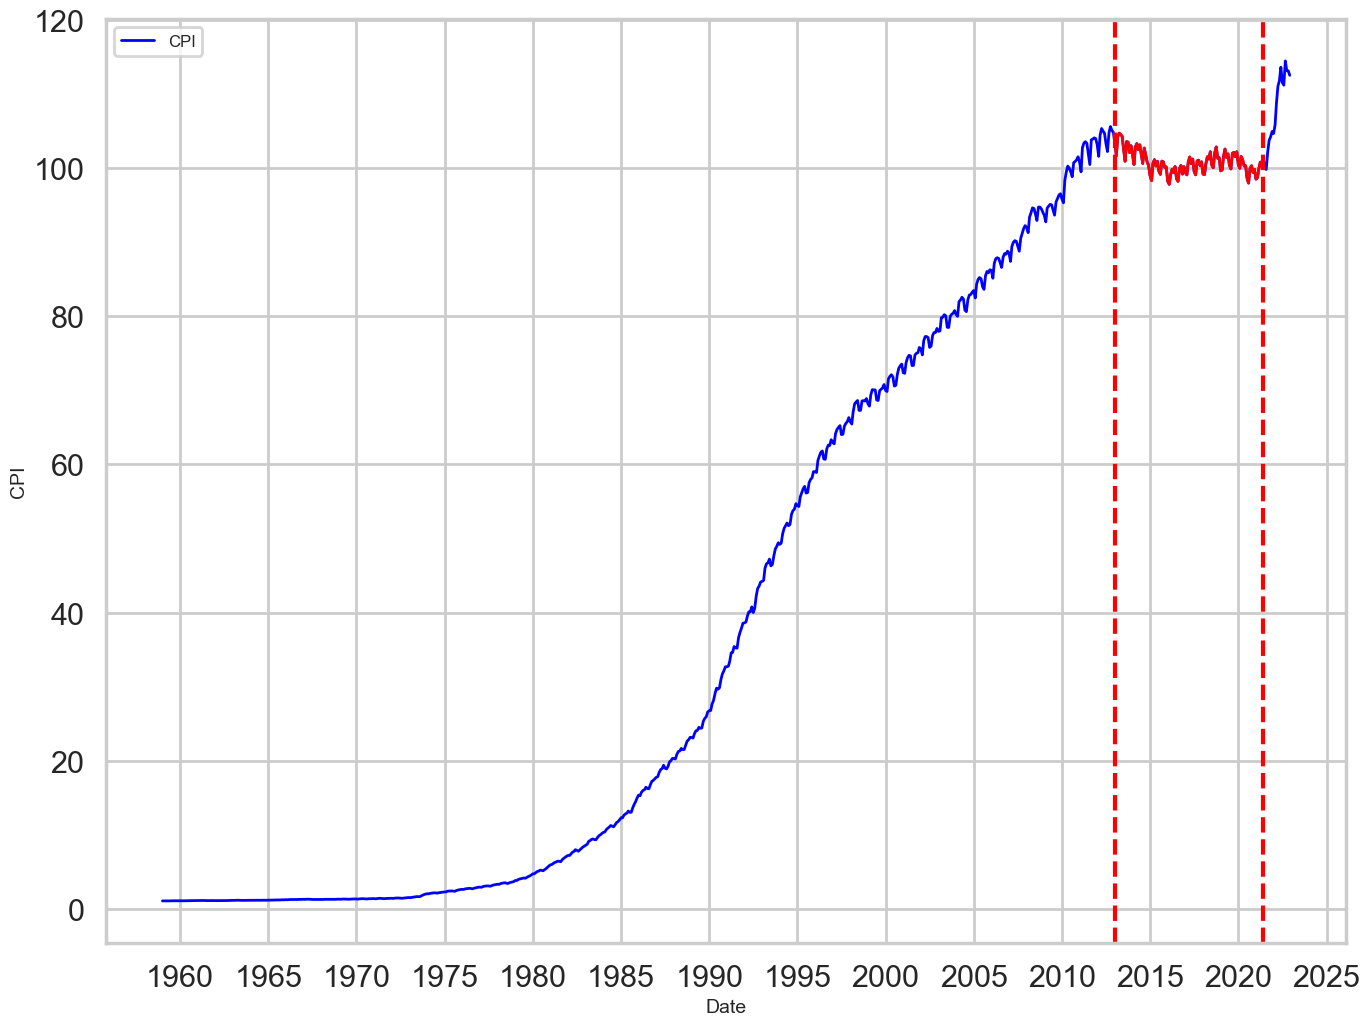

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

# Set style and context for Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")


#create a figure with axes and a size of 16x12
fig, ax = plt.subplots(figsize=(16,12))

ax.set_xlabel('Date', fontsize = 14) #set the x axis label as date
ax.set_ylabel('CPI', fontsize = 14) #set the y axis label as CPI

#plot the CPI timeseries line
ax.plot(CPI, linewidth=2, label = 'CPI', color='b') #plot the CPI timeseries line with blue color

# set the color of the line between the two vertical lines to red
date_range = (CPI.index >= '2013-01-01') & (CPI.index <= '2021-06-01')
ax.plot(CPI[date_range], linewidth=2, color='r')

# set the tick marks every 3 years
years = mdates.YearLocator(base=5)
ax.xaxis.set_major_locator(years)
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)


# format the date labels to show only the year
date_format= mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

#setting two vertical lines that indicate the period of stability
line_2013 = datetime.datetime(2013, 1, 1)
ax.axvline(x=mdates.date2num(line_2013), color='r', linestyle='--')

line_2021 = datetime.datetime(2021, 6, 1)
ax.axvline(x=mdates.date2num(line_2021), color='r', linestyle='--')

ax.legend(loc='upper left', fontsize = 12) # place the legend upper left corner

In [ ]:
CPI.columns

Index(['CPI_index'], dtype='object')

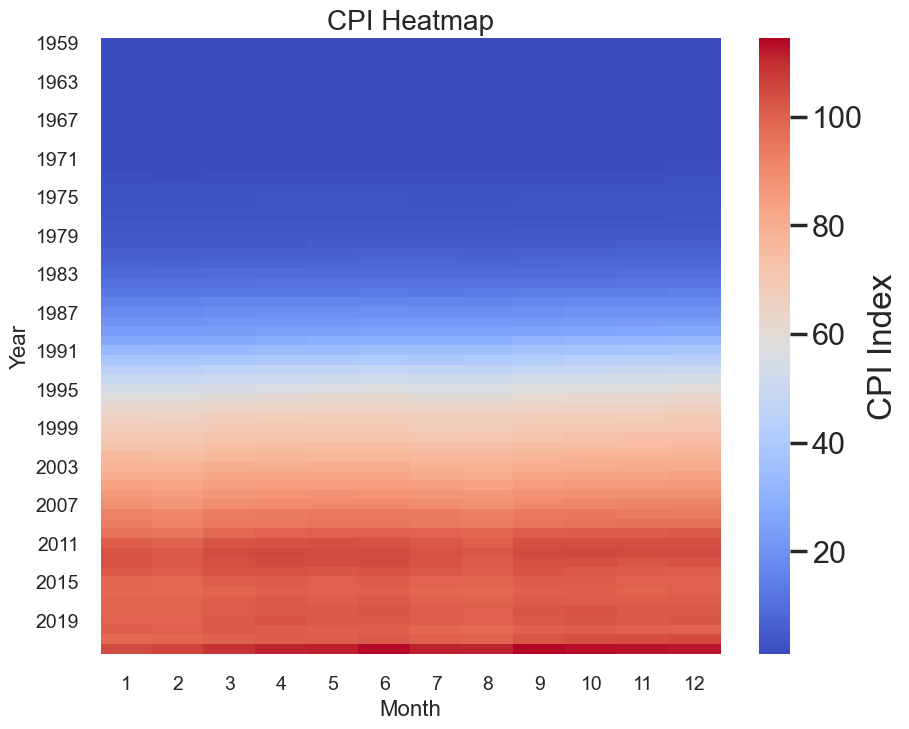

In [ ]:
import seaborn as sns

# Extract the month and year from the 'Date' variable
CPI['Date'] = CPI.index
CPI['Month'] = CPI['Date'].dt.month
CPI['Year'] = CPI['Date'].dt.year

# Pivot the data to create a matrix with CPI values for each year and month
CPI_pivot = CPI.pivot_table(index = 'Year', columns='Month', values='CPI_index')

# Create the heatmap using Seaborn
# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
plt.title('CPI Heatmap', fontsize=20)
sns.heatmap(CPI_pivot, cmap='coolwarm', cbar_kws={'label': 'CPI Index'})
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Year', fontsize=16)

# Show the plot
plt.show()

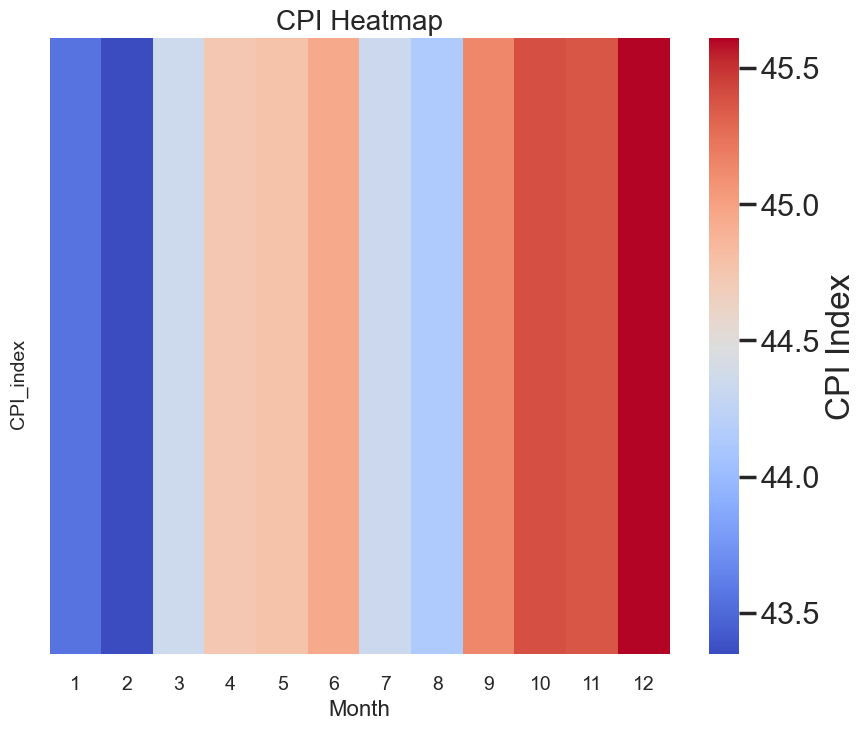

In [ ]:
#Pivot the data to create a matrix with CPI values for each month
CPI_pivot = CPI.pivot_table(columns='Month', values='CPI_index')

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
plt.title('CPI Heatmap', fontsize=20)
sns.heatmap(CPI_pivot, cmap='coolwarm', cbar_kws={'label': 'CPI Index'})
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=16)

# Show the plot
plt.show()

In [ ]:
#From the graph it appears that there aren't any null values but let's double check.
null_mask = CPI.isnull()

In [ ]:
#let's sum the null values(if isnull = True)
sum_null = null_mask.sum()

In [ ]:
#no null values
sum_null

CPI_index    0
Date         0
Month        0
Year         0
dtype: int64

It is interesting to note that there is an always increasing CPI since 1959 until today(upward trend). It should also be highlighted that from 2010 until 2020 it seems like that CPI is somewhat stabilized, while after 2020 there is a spike. It is also eminent that there is some sort of seasonality in the CPI values. This might occur because in Greece, tourism is a big industry and during summer, seasonal stores sell for higher prices.  Other causes of inflation seasonality might be sales, production cycles e.t.c.

In [ ]:
import pandas as pd

monthly_mean = CPI.resample('M').mean()

# Calculate the mean CPI for each month of the year
monthly_mean_by_month = monthly_mean.groupby('Month').mean()

# Print the results
print(monthly_mean_by_month['CPI_index'])



Month
1     43.559026
2     43.349334
3     44.351407
4     44.741610
5     44.778068
6     44.954123
7     44.330472
8     44.141233
9     45.139650
10    45.390512
11    45.363959
12    45.609996
Name: CPI_index, dtype: float64


In [ ]:
monthly_mean[['CPI_index', 'Month']]

CPI_index  Month
Date                         
1959-01-31    1.083857      1
1959-02-28    1.083857      2
1959-03-31    1.088166      3
1959-04-30    1.096785      4
1959-05-31    1.094630      5
...                ...    ...
2022-08-31  111.211375      8
2022-09-30  114.478049      9
2022-10-31  113.157924     10
2022-11-30  113.146170     11
2022-12-31  112.532917     12

[768 rows x 2 columns]

In [ ]:
# Let's have a look at HICP
HICP

Date  HICP_index  excl_energy_unprocessed_food       goods  \
432 1995-01-01   54.747300                     56.245224   56.005166   
433 1995-02-01   54.502071                     55.914581   55.862441   
434 1995-03-01   55.850829                     57.630757   57.612067   
435 1995-04-01   56.463900                     58.177839   58.030847   
436 1995-05-01   57.015665                     58.101259   58.954873   
..         ...         ...                           ...         ...   
763 2022-08-01  111.980000                    106.524829  114.073622   
764 2022-09-01  115.290000                    109.963764  118.657844   
765 2022-10-01  113.850000                    110.297165  116.682760   
766 2022-11-01  113.550000                    109.900408  116.894534   
767 2022-12-01  112.810000                    109.988219  116.186407   

           food  unprocessed_food  processed_food  industrial_goods  \
432   51.481125         58.993265       46.968401         60.104793   
433   52.008036         59.336870       47.647283         59.453585   
434   52.313092         59.728729       47.915240         62.317536   
435   52.988901         61.129156       48.150988         62.546859   
436   53.402195         61.959372       48.386472         63.868544   
..          ...               ...             ...               ...   
763  117.002893        120.871360      115.494272        111.546661   
764  118.254739        121.697408      116.918722        118.630878   
765  119.653004        123.285026      118.241135        114.117628   
766  120.748222        123.974925      119.500611        113.662650   
767  120.704720        122.678474      119.963283        112.455337   

     industrial_goods_excl_energy      energy    services  
432                     68.362693   36.940809   51.675504  
433                     67.316064   37.055531   51.377277  
434                     71.647590   36.898483   51.669497  
435                     71.851482   37.155155   52.705419  
436                     72.097707   40.915999   52.162499  
..                            ...         ...         ...  
763                     94.547139  158.076730  108.743760  
764                    102.834306  162.319534  110.240788  
765                    104.187913  142.771690  109.554283  
766                    103.619222  142.591773  108.539567  
767                    104.928646  134.956945  107.760221  

[336 rows x 11 columns]

There are a lot of null values in this subset as it is drawn from the same dataset that included CPI that dates back to 1959 as opposed to HICP that only dates back to 1995. Therefore we should come up with 12*36 = 432 null values for each one of the variables.

In [ ]:
null_musk = HICP.isnull()

In [ ]:
sum_null = null_musk.sum()

In [ ]:
sum_null

Date                            0
HICP_index                      0
excl_energy_unprocessed_food    0
goods                           0
food                            0
unprocessed_food                0
processed_food                  0
industrial_goods                0
industrial_goods_excl_energy    0
energy                          0
services                        0
dtype: int64

This is the case, so there are no missing values in the dataset. We can drop the null rows.

In [ ]:
#drop the null rows.
HICP.dropna(inplace = True)

In [ ]:
#Everything looks alright now.
HICP

Date  HICP_index  excl_energy_unprocessed_food       goods  \
432 1995-01-01   54.747300                     56.245224   56.005166   
433 1995-02-01   54.502071                     55.914581   55.862441   
434 1995-03-01   55.850829                     57.630757   57.612067   
435 1995-04-01   56.463900                     58.177839   58.030847   
436 1995-05-01   57.015665                     58.101259   58.954873   
..         ...         ...                           ...         ...   
763 2022-08-01  111.980000                    106.524829  114.073622   
764 2022-09-01  115.290000                    109.963764  118.657844   
765 2022-10-01  113.850000                    110.297165  116.682760   
766 2022-11-01  113.550000                    109.900408  116.894534   
767 2022-12-01  112.810000                    109.988219  116.186407   

           food  unprocessed_food  processed_food  industrial_goods  \
432   51.481125         58.993265       46.968401         60.104793   
433   52.008036         59.336870       47.647283         59.453585   
434   52.313092         59.728729       47.915240         62.317536   
435   52.988901         61.129156       48.150988         62.546859   
436   53.402195         61.959372       48.386472         63.868544   
..          ...               ...             ...               ...   
763  117.002893        120.871360      115.494272        111.546661   
764  118.254739        121.697408      116.918722        118.630878   
765  119.653004        123.285026      118.241135        114.117628   
766  120.748222        123.974925      119.500611        113.662650   
767  120.704720        122.678474      119.963283        112.455337   

     industrial_goods_excl_energy      energy    services  
432                     68.362693   36.940809   51.675504  
433                     67.316064   37.055531   51.377277  
434                     71.647590   36.898483   51.669497  
435                     71.851482   37.155155   52.705419  
436                     72.097707   40.915999   52.162499  
..                            ...         ...         ...  
763                     94.547139  158.076730  108.743760  
764                    102.834306  162.319534  110.240788  
765                    104.187913  142.771690  109.554283  
766                    103.619222  142.591773  108.539567  
767                    104.928646  134.956945  107.760221  

[336 rows x 11 columns]

In this case the base year is 2015. Let's have a look at some basic descriptive statistics.

In [ ]:
HICP.describe()

HICP_index  excl_energy_unprocessed_food       goods        food  \
count  336.000000                    336.000000  336.000000  336.000000   
mean    88.537456                     89.940104   87.564586   85.536149   
std     15.391290                     14.064983   15.202061   17.358606   
min     54.502071                     55.914581   55.862441   51.346523   
25%     74.932574                     78.252944   73.892106   72.010834   
50%     94.413182                     97.555274   91.600936   89.498066   
75%    101.300000                    101.225118  100.218019  100.194402   
max    115.290000                    110.297165  118.657844  120.748222   

       unprocessed_food  processed_food  industrial_goods  \
count        336.000000      336.000000        336.000000   
mean          90.116375       82.981681         89.635271   
std           14.879760       19.098738         13.675222   
min           55.492418       46.968401         59.453585   
25%           79.643523       64.938098         77.676881   
50%           93.878888       86.321884         92.769404   
75%          100.171947      100.984743         99.970739   
max          126.227590      119.963283        118.630878   

       industrial_goods_excl_energy      energy    services  
count                    336.000000  336.000000  336.000000  
mean                      94.544332   76.114264   89.695281  
std                        9.120682   31.203314   16.148018  
min                       67.316064   36.390356   51.377277  
25%                       89.184345   45.819805   76.427701  
50%                       96.072741   68.218995   98.585284  
75%                      101.527701  103.274469  102.722096  
max                      108.721017  165.659811  110.240788

Now, although the base year is 2015, the mean HICP_index along with most HICP subcategories indices is quite high (approximately 88,5). Industrial goods excluding energy seem to have the highest mean and min value while energy the lowest mean and min value but at the same time holds the record for the max value. In any case, what it is important to look at is whether HICP and CPI comply with each other. We can plot both of the line charts.

In [ ]:
#First let's set the date as the dataset's index.
HICP.set_index('Date', inplace = True)

In [ ]:
HICP

HICP_index  excl_energy_unprocessed_food       goods        food  \
Date                                                                           
1995-01-01   54.747300                     56.245224   56.005166   51.481125   
1995-02-01   54.502071                     55.914581   55.862441   52.008036   
1995-03-01   55.850829                     57.630757   57.612067   52.313092   
1995-04-01   56.463900                     58.177839   58.030847   52.988901   
1995-05-01   57.015665                     58.101259   58.954873   53.402195   
...                ...                           ...         ...         ...   
2022-08-01  111.980000                    106.524829  114.073622  117.002893   
2022-09-01  115.290000                    109.963764  118.657844  118.254739   
2022-10-01  113.850000                    110.297165  116.682760  119.653004   
2022-11-01  113.550000                    109.900408  116.894534  120.748222   
2022-12-01  112.810000                    109.988219  116.186407  120.704720   

            unprocessed_food  processed_food  industrial_goods  \
Date                                                             
1995-01-01         58.993265       46.968401         60.104793   
1995-02-01         59.336870       47.647283         59.453585   
1995-03-01         59.728729       47.915240         62.317536   
1995-04-01         61.129156       48.150988         62.546859   
1995-05-01         61.959372       48.386472         63.868544   
...                      ...             ...               ...   
2022-08-01        120.871360      115.494272        111.546661   
2022-09-01        121.697408      116.918722        118.630878   
2022-10-01        123.285026      118.241135        114.117628   
2022-11-01        123.974925      119.500611        113.662650   
2022-12-01        122.678474      119.963283        112.455337   

            industrial_goods_excl_energy      energy    services  
Date                                                              
1995-01-01                     68.362693   36.940809   51.675504  
1995-02-01                     67.316064   37.055531   51.377277  
1995-03-01                     71.647590   36.898483   51.669497  
1995-04-01                     71.851482   37.155155   52.705419  
1995-05-01                     72.097707   40.915999   52.162499  
...                                  ...         ...         ...  
2022-08-01                     94.547139  158.076730  108.743760  
2022-09-01                    102.834306  162.319534  110.240788  
2022-10-01                    104.187913  142.771690  109.554283  
2022-11-01                    103.619222  142.591773  108.539567  
2022-12-01                    104.928646  134.956945  107.760221  

[336 rows x 10 columns]

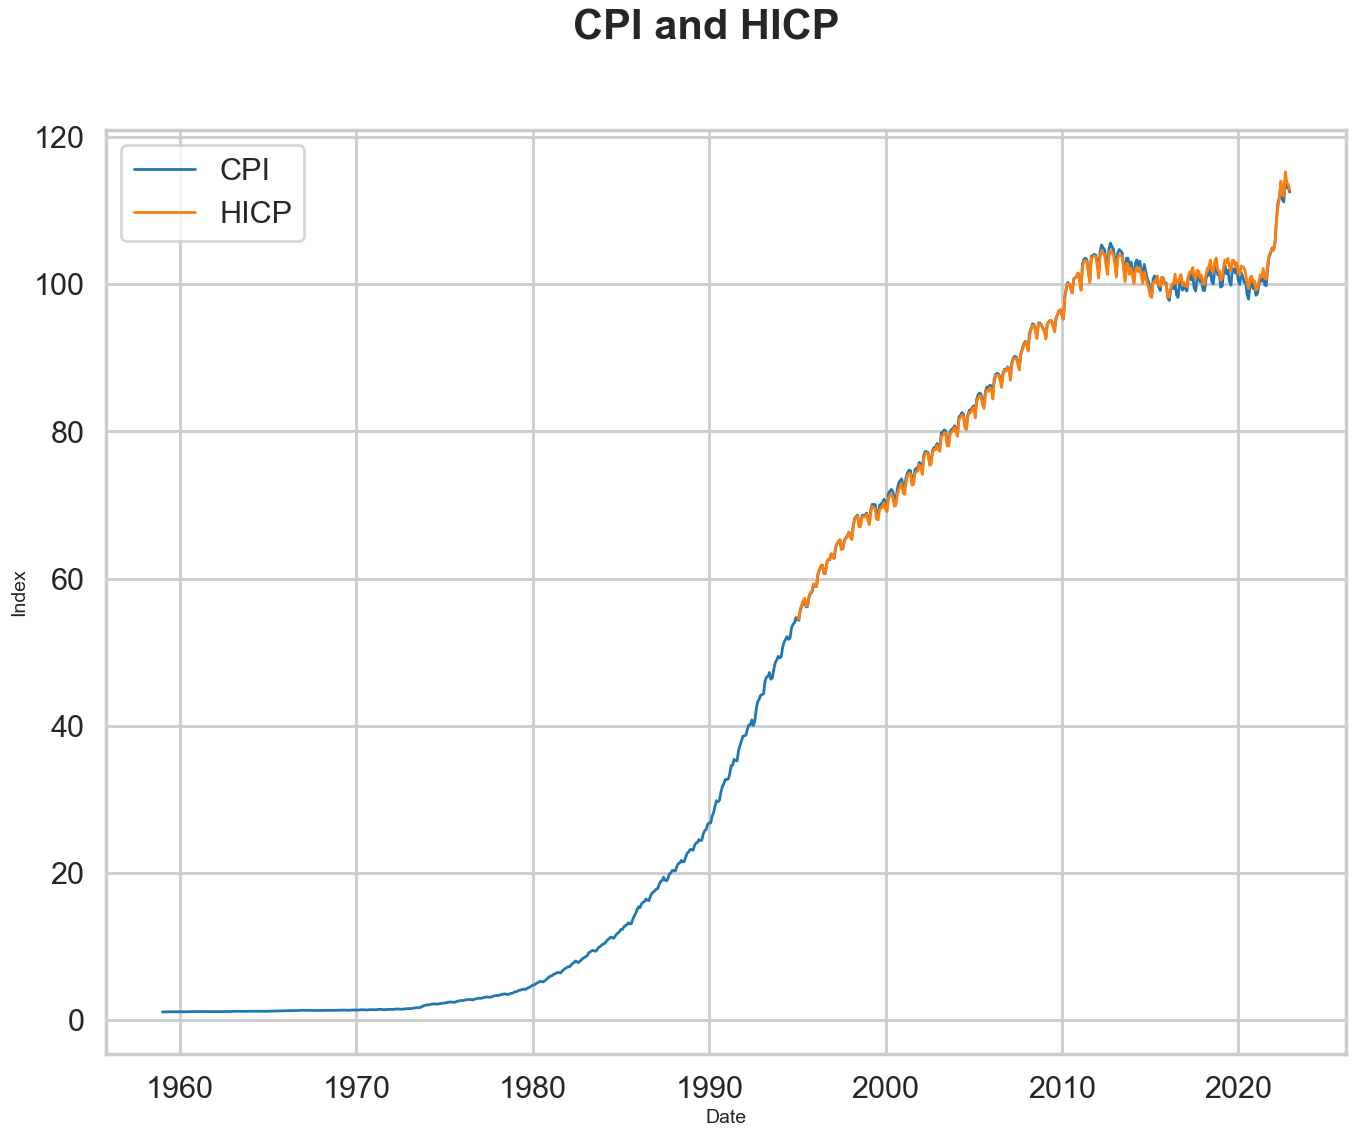

In [ ]:
# Now let's plot both of the lines in one graph
fig, ax = plt.subplots(figsize=(16,12))
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Index', fontsize = 14)
ax.plot(CPI['CPI_index'], linewidth=2, label = 'CPI')
ax.plot(HICP['HICP_index'], linewidth = 2, label = 'HICP')

# Add a main title for the figure
fig.suptitle('CPI and HICP', fontsize=30, fontweight='bold')

ax.legend()

HICP and CPI lines are extremely similar (as expected) and therefore most probably only one of them will be included in the ANN models. However this will be determined later in this report.

In [ ]:
CPI['CPI_index'].corr(HICP['HICP_index'])

0.9992771356302804

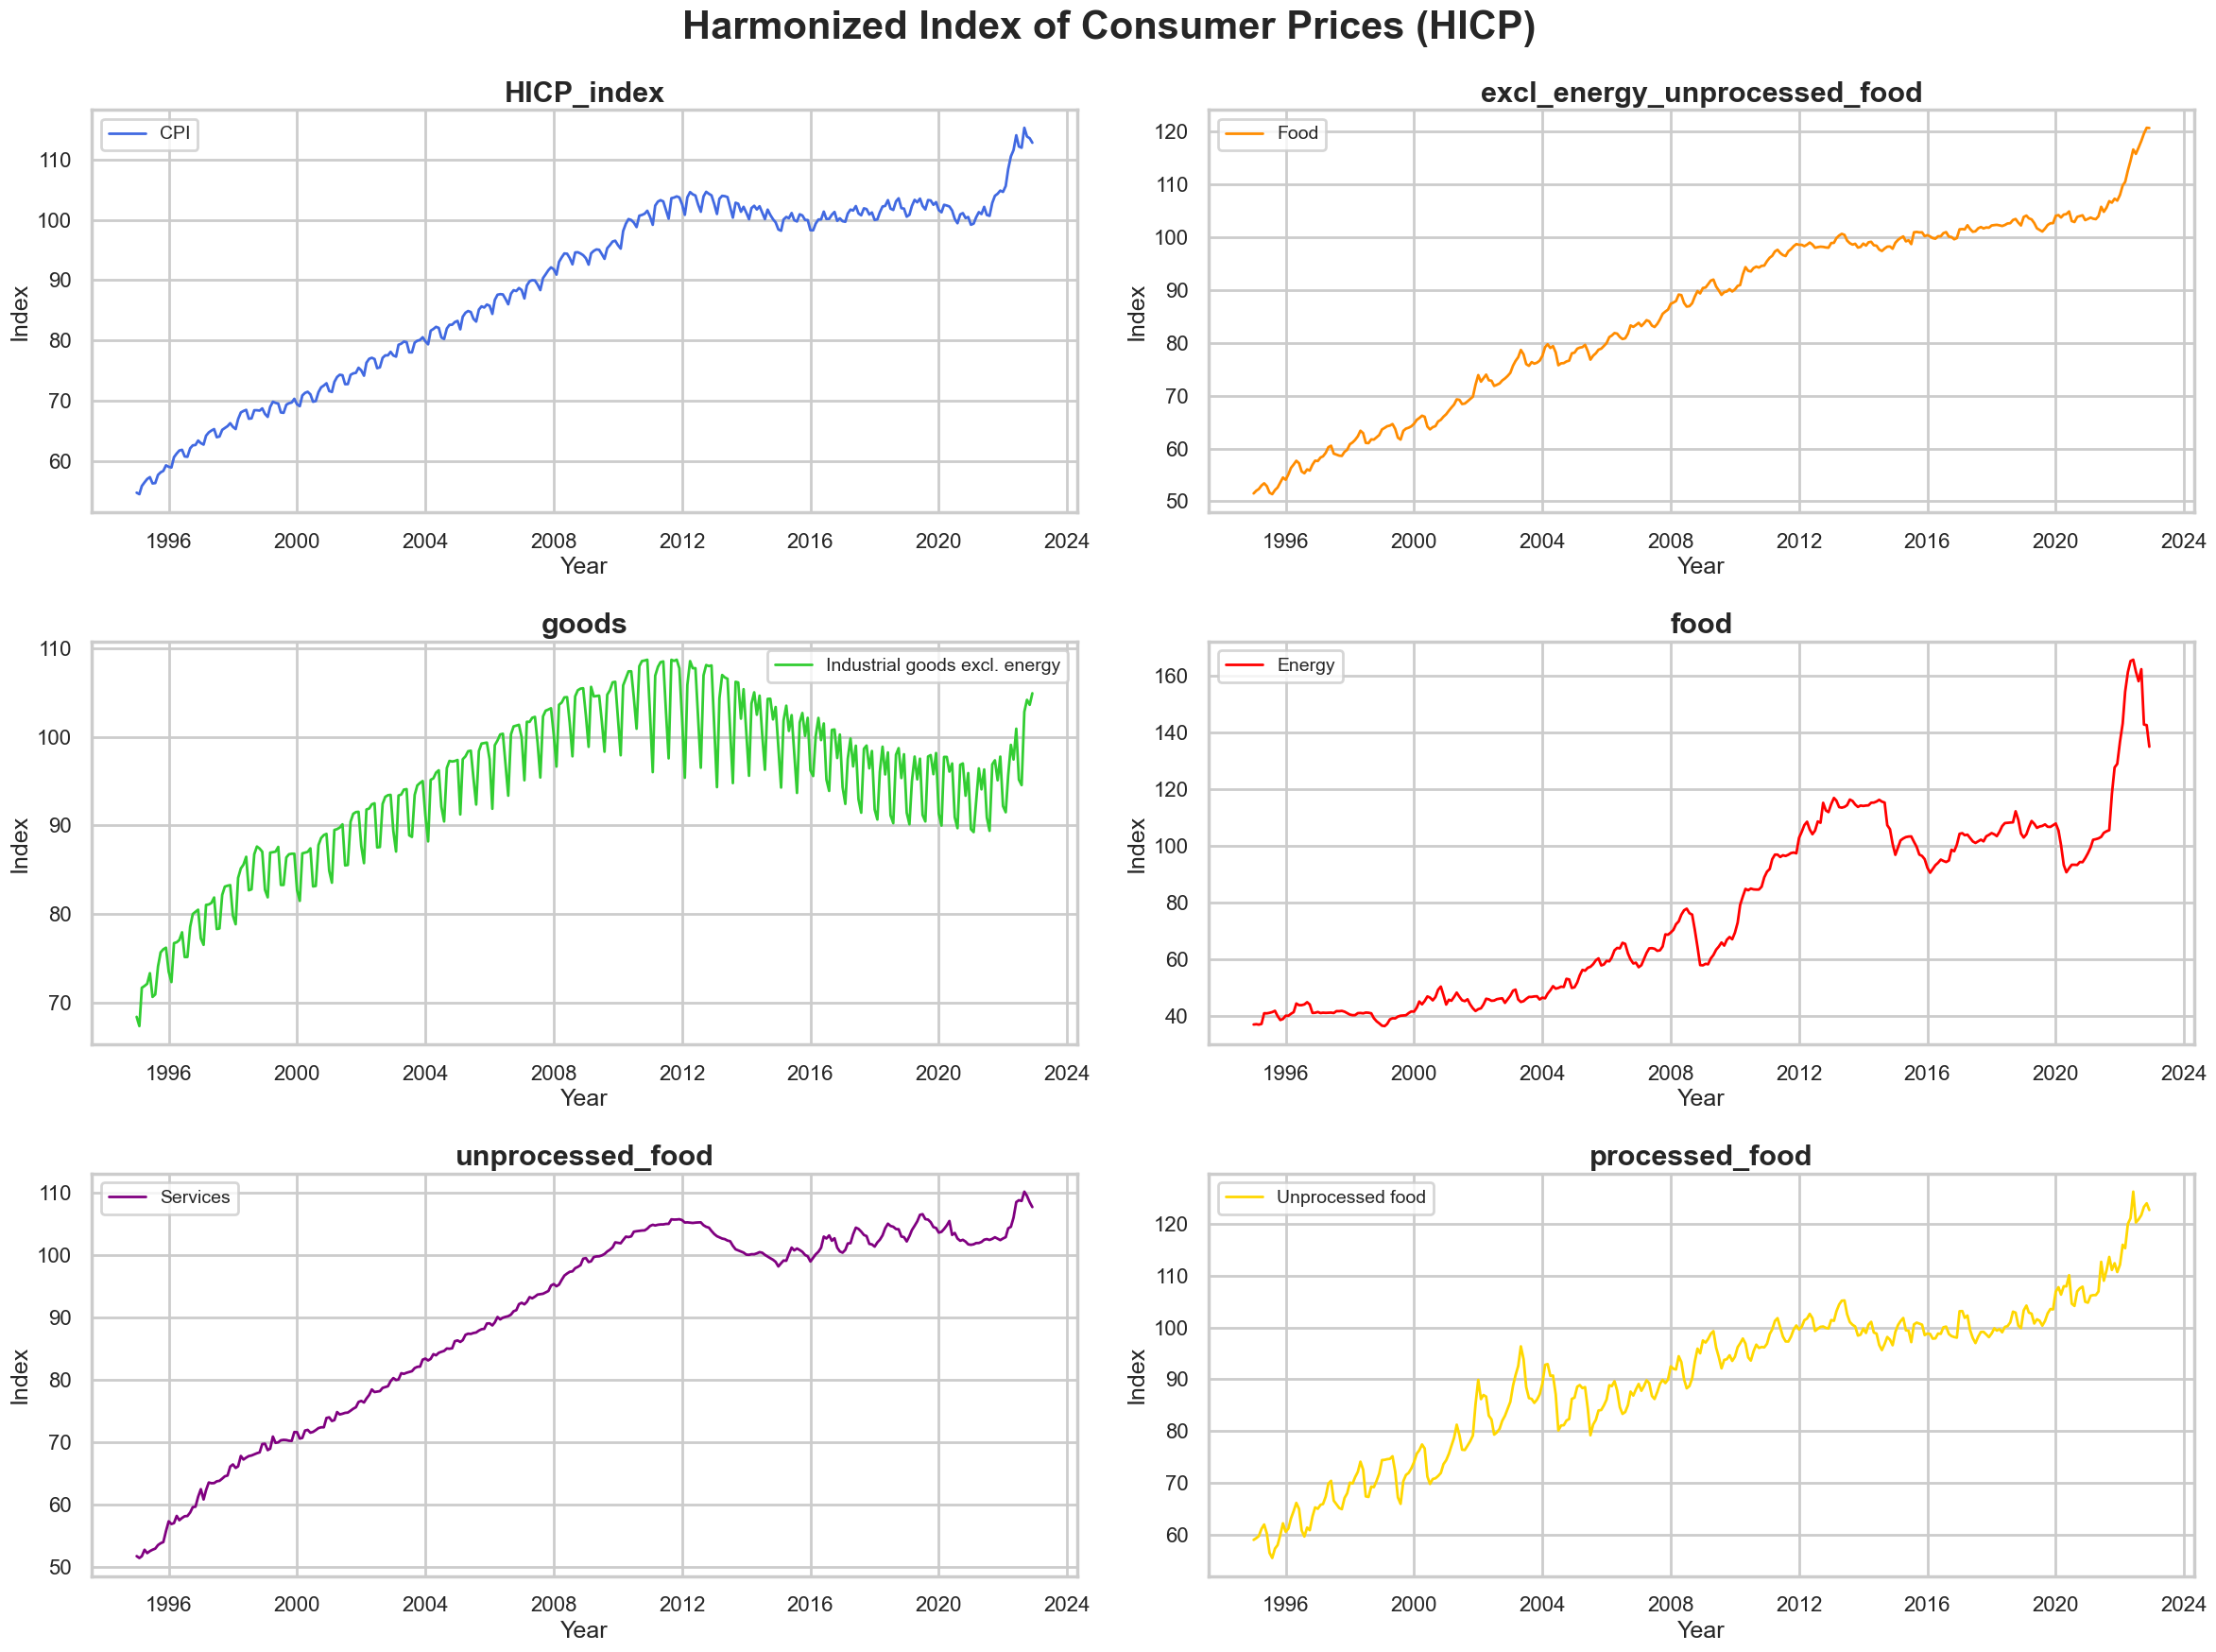

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

# Plot each variable on its corresponding subplot
ax[0,0].plot(HICP['HICP_index'], linewidth=2, color='royalblue', label='CPI')
ax[0,1].plot(HICP['food'], linewidth=2, color='darkorange', label='Food')
ax[1,0].plot(HICP['industrial_goods_excl_energy'], linewidth=2, color='limegreen', label='Industrial goods excl. energy')
ax[1,1].plot(HICP['energy'], linewidth=2, color='red', label='Energy')
ax[2,0].plot(HICP['services'], linewidth=2, color='purple', label='Services')
ax[2,1].plot(HICP['unprocessed_food'], linewidth=2, color='gold', label='Unprocessed food')

# Set titles and labels for each subplot
for i,a in enumerate(ax.flatten()):
    a.tick_params(axis='both', labelsize=16)
    a.set_xlabel('Year', fontsize=18)
    a.set_ylabel('Index', fontsize=18)
    a.set_title(HICP.columns[i], fontsize=22, fontweight='bold')
    a.legend(fontsize=14)

# Add a main title for the figure
fig.suptitle('Harmonized Index of Consumer Prices (HICP)', fontsize=30, fontweight='bold')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
HICP['Date'] = HICP.index

It is interesting to note here that there is a big spike in the energy prices after 2022, possibly due to the pandemic and the War in Ukraine. The extreme increase in the energy prices seem to draw the CPI values higher, but also other  CPI sub indices such as food and services. It is interesting to not that industrial_good_excluding_energy, although it has historically been holding the highest mean of all  CPI sub indices, after the energy price rises it has one of the lowest values, as it does not include energy prices. It is important to highlight that unprocessed food seems to have a significant spike after 2022 as well and that may also possibly occur due to the Pandemic and the War. Additionally, industrial_goods_excl_energy seem to present high seasonality. Energy prices also seem to had risen at around 2010-2015 and thus pulled the CPI higher. It should be interesting to see some of the basic commodity market prices, since energy seems like an important driver of inflation.

# Energy

In [ ]:
energy

Date  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
0   1960-01-01            1.630000              1.63              1.63   
1   1960-02-01            1.630000              1.63              1.63   
2   1960-03-01            1.630000              1.63              1.63   
3   1960-04-01            1.630000              1.63              1.63   
4   1960-05-01            1.630000              1.63              1.63   
..         ...                 ...               ...               ...   
751 2022-08-01           95.973333             98.60             97.75   
752 2022-09-01           88.220000             90.16             90.63   
753 2022-10-01           90.326667             93.13             90.59   
754 2022-11-01           87.376667             91.07             86.28   
755 2022-12-01           78.066667             80.90             76.78   

     Natural gas, US  Natural gas, Europe **    Cocoa  Coffee, Arabica  \
0             0.1400                0.404774  0.63400         0.940900   
1             0.1400                0.404774  0.60800         0.946900   
2             0.1400                0.404774  0.57890         0.928100   
3             0.1400                0.404774  0.59830         0.930300   
4             0.1400                0.404774  0.60010         0.920000   
..               ...                     ...      ...              ...   
751           8.7854               70.043640  2.32322         5.917861   
752           7.7629               59.102622  2.29846         5.897138   
753           5.6195               39.022050  2.30902         5.292852   
754           5.2769               35.723282  2.41204         4.715462   
755           5.5030               36.044260  2.51231         4.629482   

     Coffee, Robusta  Tea, avg 3 auctions  ...     Aluminum  \
0           0.696864             1.029700  ...   511.471832   
1           0.688707             1.029700  ...   511.471832   
2           0.688707             1.029700  ...   511.471832   
3           0.684519             1.029700  ...   511.471832   
4           0.690692             1.029700  ...   511.471832   
..               ...                  ...  ...          ...   
751         2.417366             3.369385  ...  2430.790000   
752         2.455065             3.334399  ...  2224.760000   
753         2.270979             3.146871  ...  2255.540000   
754         2.041258             3.046660  ...  2350.720000   
755         2.045446             2.934085  ...  2401.690000   

     Iron ore, cfr spot   Copper     Lead       Tin    Nickel     Zinc  \
0                 11.42   715.40   206.10   2180.40   1631.00   260.80   
1                 11.42   728.19   203.70   2180.40   1631.00   244.90   
2                 11.42   684.94   210.30   2173.80   1631.00   248.70   
3                 11.42   723.11   213.60   2178.20   1631.00   254.60   
4                 11.42   684.75   213.40   2162.70   1631.00   253.80   
..                  ...      ...      ...       ...       ...      ...   
751              108.85  7981.84  2072.72  24647.48  22057.39  3587.57   
752               99.81  7746.01  1870.10  21124.04  22773.97  3124.97   
753               92.56  7651.08  1999.86  19391.17  22032.89  2967.21   
754               93.34  8049.86  2099.99  21249.50  25562.70  2938.92   
755              111.84  8375.40  2216.48  24172.37  28946.81  3129.48   

        Gold  Platinum   Silver  
0      35.27     83.50   0.9137  
1      35.27     83.50   0.9137  
2      35.27     83.50   0.9137  
3      35.27     83.50   0.9137  
4      35.27     83.50   0.9137  
..       ...       ...      ...  
751  1764.56    908.65  19.7240  
752  1680.78    881.24  18.9440  
753  1664.45    914.67  19.4260  
754  1725.07    989.05  21.0180  
755  1797.55   1010.95  23.3260  

[756 rows x 54 columns]

In [ ]:
#ok, first let's set the Date as the index
energy.set_index('Date', inplace = True)

In [ ]:
energy.shape

(756, 53)

In [ ]:
energy.isnull().sum()

Crude oil, average           0
Crude oil, Brent             0
Crude oil, Dubai             0
Natural gas, US              0
Natural gas, Europe **       0
Cocoa                        0
Coffee, Arabica              0
Coffee, Robusta              0
Tea, avg 3 auctions          0
Tea, Colombo                 0
Tea, Kolkata                 0
Tea, Mombasa                 0
Coconut oil                  0
Groundnut oil                0
Palm oil                     0
Soybeans                     0
Soybean oil                  0
Soybean meal                 0
Rapeseed oil               505
Sunflower oil              516
Barley                       0
Maize                        0
Sorghum                      0
Rice, Thai 5%                0
Wheat, US HRW                0
Banana, Europe             444
Banana, US                   0
Orange                       0
Beef                         0
Chicken                      0
Shrimps, Mexican             0
Sugar, EU                    0
Sugar, U

In [ ]:
energy.dropna(axis = 1, inplace = True)

In [ ]:
#let's get some basic statistics
energy.describe()

Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
count          756.000000        756.000000        756.000000   
mean            31.942135         32.724944         31.238130   
std             30.712156         31.885368         30.936611   
min              1.210000          1.210000          1.210000   
25%             10.599998         10.564999         10.452500   
50%             20.310000         20.489130         18.550000   
75%             46.371326         47.157500         45.576023   
max            132.825184        133.873043        131.224783   

       Natural gas, US  Natural gas, Europe **       Cocoa  Coffee, Arabica  \
count       756.000000              756.000000  756.000000       756.000000   
mean          2.400707                4.551961    1.729645         2.576555   
std           2.208413                6.132065    0.879461         1.342454   
min           0.140000                0.384150    0.259000         0.777600   
25%           0.430000                1.730000    1.032200         1.351625   
50%           2.030750                2.890000    1.601000         2.697794   
75%           3.049875                4.970236    2.324550         3.312950   
max          13.522619               70.043640    4.362900         7.003600   

       Coffee, Robusta  Tea, avg 3 auctions  Tea, Colombo  ...     Aluminum  \
count       756.000000           756.000000    756.000000  ...   756.000000   
mean          1.727478             1.773128      1.777939  ...  1411.399292   
std           0.940748             0.715222      1.008639  ...   646.614475   
min           0.487210             0.707400      0.434198  ...   496.039490   
25%           0.923053             1.177600      0.892501  ...   852.636841   
50%           1.632172             1.654579      1.504001  ...  1427.641113   
75%           2.282200             2.352764      2.515204  ...  1818.162500   
max           6.883547             3.369385      4.490000  ...  3577.860000   

       Iron ore, cfr spot        Copper         Lead           Tin  \
count          756.000000    756.000000   756.000000    756.000000   
mean            46.174449   3122.396794   919.228063  10314.659517   
std             44.788904   2513.701267   749.248862   7560.551619   
min              8.770000    606.710000   140.700000   2162.700000   
25%             17.300000   1390.650000   394.125000   4738.698500   
50%             28.790000   1911.155000   582.000000   6914.800000   
75%             64.112500   4738.667250  1397.364500  15081.797500   
max            214.430000  10230.890000  3719.717000  43983.350000   

             Nickel         Zinc         Gold     Platinum      Silver  
count    756.000000   756.000000   756.000000   756.000000  756.000000  
mean    8954.705032  1225.958105   530.718441   573.194328    8.886463  
std     7490.980639   883.481018   519.625896   460.129711    8.060308  
min     1631.000000   176.600000    34.940000    78.500000    0.913700  
25%     3915.125000   663.725000   143.975000   160.680000    4.059912  
50%     6478.270000   981.150000   364.685000   419.735000    5.380850  
75%    12738.560000  1776.450000   665.885750   877.225000   13.926400  
max    52179.048000  4405.395000  1968.630000  2052.450000   42.695200  

[8 rows x 48 columns]

In [ ]:
energy.columns

Index(['Crude oil, average', 'Crude oil, Brent', 'Crude oil, Dubai',
       'Natural gas, US', 'Natural gas, Europe **', 'Cocoa', 'Coffee, Arabica',
       'Coffee, Robusta', 'Tea, avg 3 auctions', 'Tea, Colombo',
       'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil', 'Groundnut oil',
       'Palm oil', 'Soybeans', 'Soybean oil', 'Soybean meal', 'Barley',
       'Maize', 'Sorghum', 'Rice, Thai 5% ', 'Wheat, US HRW', 'Banana, US',
       'Orange', 'Beef', 'Chicken', 'Shrimps, Mexican', 'Sugar, EU',
       'Sugar, US', 'Sugar, world', 'Tobacco, US import u.v.',
       'Logs, Malaysian', 'Sawnwood, Malaysian', 'Cotton, A Index',
       'Rubber, RSS3', 'Phosphate rock', 'TSP', 'Urea ', 'Potassium chloride',
       'Aluminum', 'Iron ore, cfr spot', 'Copper', 'Lead', 'Tin', 'Nickel',
       'Zinc', 'Gold', 'Platinum', 'Silver'],
      dtype='object')

In [ ]:
correlation_matrix = energy.corr()

# Find variables with correlation greater than 90%
high_correlation_vars = []
for col in correlation_matrix.columns:
    correlated_vars = correlation_matrix.index[correlation_matrix[col] > 0.9].tolist()
    high_correlation_vars.extend([(col, var) for var in correlated_vars if var != col])

high_correlation_vars

[('Crude oil, average', 'Crude oil, Brent'),
 ('Crude oil, average', 'Crude oil, Dubai'),
 ('Crude oil, average', 'Iron ore, cfr spot'),
 ('Crude oil, average', 'Copper'),
 ('Crude oil, average', 'Platinum'),
 ('Crude oil, Brent', 'Crude oil, average'),
 ('Crude oil, Brent', 'Crude oil, Dubai'),
 ('Crude oil, Brent', 'Iron ore, cfr spot'),
 ('Crude oil, Brent', 'Copper'),
 ('Crude oil, Brent', 'Platinum'),
 ('Crude oil, Dubai', 'Crude oil, average'),
 ('Crude oil, Dubai', 'Crude oil, Brent'),
 ('Crude oil, Dubai', 'Iron ore, cfr spot'),
 ('Crude oil, Dubai', 'Copper'),
 ('Crude oil, Dubai', 'Platinum'),
 ('Tea, avg 3 auctions', 'Tea, Colombo'),
 ('Tea, avg 3 auctions', 'Tea, Mombasa'),
 ('Tea, avg 3 auctions', 'Tobacco, US import u.v.'),
 ('Tea, Colombo', 'Tea, avg 3 auctions'),
 ('Tea, Colombo', 'Banana, US'),
 ('Tea, Colombo', 'Tobacco, US import u.v.'),
 ('Tea, Mombasa', 'Tea, avg 3 auctions'),
 ('Groundnut oil', 'Soybeans'),
 ('Groundnut oil', 'Soybean oil'),
 ('Groundnut oil', 'Ma

In [ ]:
#here we read the excel file that only includes the variables that have no null values
## nor high correlation coefficient.
energy = pd.read_excel('energy_2.xlsx')

In [ ]:
#set date as the index
energy.set_index('Date', inplace = True)

In [ ]:
#look at the collumns
energy.columns

Index(['Crude oil, average', 'Natural gas, US', 'Natural gas, Europe **',
       'Cocoa', 'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Coconut oil', 'Soybeans', 'Barley', 'Sorghum', 'Rice, Thai 5% ',
       'Wheat, US HRW', 'Banana, US', 'Orange', 'Shrimps, Mexican',
       'Sugar, EU', 'Sugar, US', 'Sugar, world', 'Logs, Malaysian',
       'Sawnwood, Malaysian', 'Cotton, A Index', 'Rubber, RSS3',
       'Phosphate rock', 'TSP', 'Urea ', 'Potassium chloride', 'Aluminum',
       'Lead', 'Tin', 'Nickel', 'Zinc', 'Silver'],
      dtype='object')

In [ ]:
energy.shape

(756, 33)

In [ ]:
## I forgot to delete wheat so it has to be droped
energy.drop('Wheat, US HRW' ,axis = 1, inplace = True)

In [ ]:
#We end up with 32 variables of 756 records
energy.shape

(756, 32)

In [ ]:
energy.describe()

Crude oil, average  Natural gas, US  Natural gas, Europe **  \
count          756.000000       756.000000              756.000000   
mean            31.942135         2.400707                4.551961   
std             30.712156         2.208413                6.132065   
min              1.210000         0.140000                0.384150   
25%             10.599998         0.430000                1.730000   
50%             20.310000         2.030750                2.890000   
75%             46.371326         3.049875                4.970236   
max            132.825184        13.522619               70.043640   

            Cocoa  Coffee, Arabica  Coffee, Robusta  Tea, avg 3 auctions  \
count  756.000000       756.000000       756.000000           756.000000   
mean     1.729645         2.576555         1.727478             1.773128   
std      0.879461         1.342454         0.940748             0.715222   
min      0.259000         0.777600         0.487210             0.707400   
25%      1.032200         1.351625         0.923053             1.177600   
50%      1.601000         2.697794         1.632172             1.654579   
75%      2.324550         3.312950         2.282200             2.352764   
max      4.362900         7.003600         6.883547             3.369385   

       Coconut oil    Soybeans  Rice, Thai 5%   ...  Phosphate rock  \
count   756.000000  756.000000      756.000000  ...      756.000000   
mean    689.701973  282.479002      298.258545  ...       57.840754   
std     403.931718  137.866136      136.673772  ...       62.987236   
min     200.000000   88.000000       95.670000  ...       11.000000   
25%     380.000000  200.000000      190.297500  ...       31.000000   
50%     583.000000  257.000000      276.775000  ...       36.000000   
75%     856.000000  359.215000      395.242500  ...       68.000000   
max    2256.000000  737.060000      907.000000  ...      450.000000   

               TSP       Urea   Potassium chloride     Aluminum         Lead  \
count   756.000000  756.000000          756.000000   756.000000   756.000000   
mean    197.316687  164.064491          142.368353  1411.399292   919.228063   
std     167.602948  138.156622          131.847152   646.614475   749.248862   
min      36.000000   16.000000           22.000000   496.039490   140.700000   
25%      99.750000   70.925000           55.075000   852.636841   394.125000   
50%     142.500000  122.500000          110.200000  1427.641113   582.000000   
75%     245.375000  222.281250          192.500000  1818.162500  1397.364500   
max    1131.500000  925.000000          682.500000  3577.860000  3719.717000   

                Tin        Nickel         Zinc      Silver  
count    756.000000    756.000000   756.000000  756.000000  
mean   10314.659517   8954.705032  1225.958105    8.886463  
std     7560.551619   7490.980639   883.481018    8.060308  
min     2162.700000   1631.000000   176.600000    0.913700  
25%     4738.698500   3915.125000   663.725000    4.059912  
50%     6914.800000   6478.270000   981.150000    5.380850  
75%    15081.797500  12738.560000  1776.450000   13.926400  
max    43983.350000  52179.048000  4405.395000   42.695200  

[8 rows x 30 columns]

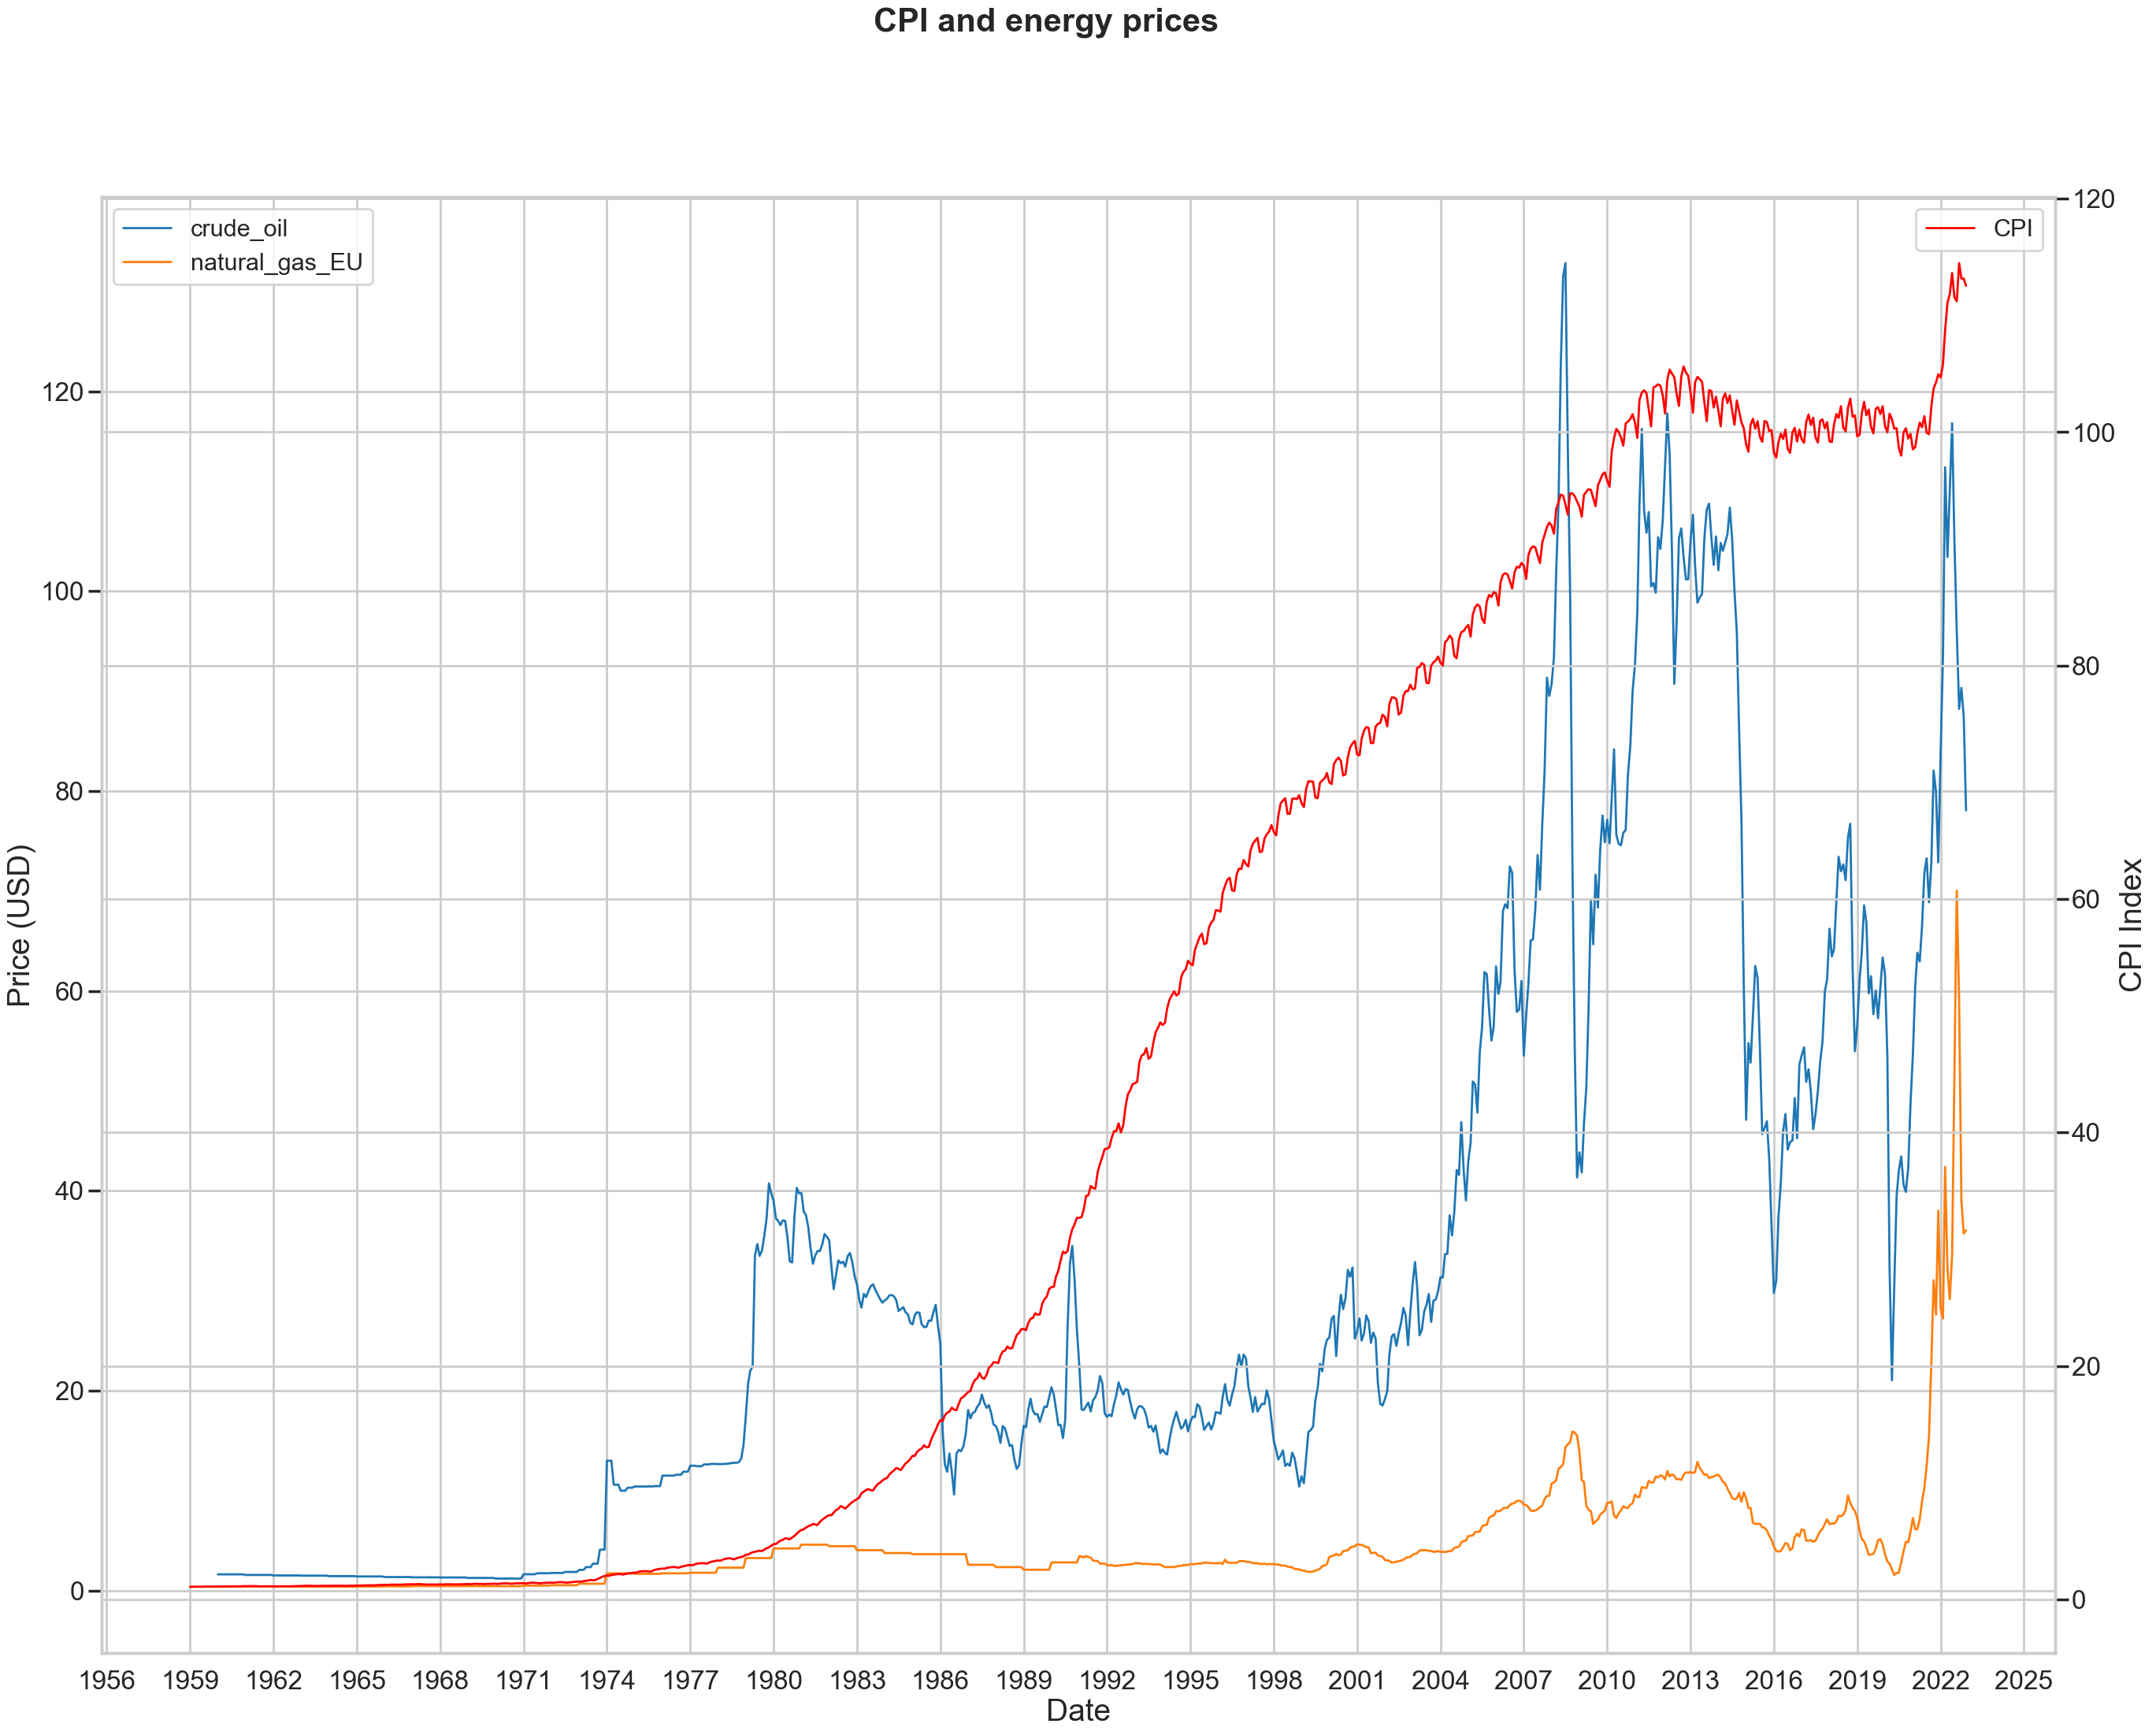

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot crude oil and natural gas
ax1.plot(energy['Crude oil, average'], linewidth=2, label = 'crude_oil')
ax1.plot(energy['Natural gas, Europe **'], linewidth=2, label = 'natural_gas_EU')

# plot CPI
ax2.plot(CPI['CPI_index'], color='red', linewidth=2, label = 'CPI')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Price (USD)', fontsize=28)
ax2.set_ylabel('CPI Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)
ax2.tick_params(axis='both', labelsize=24)


# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
ate_format = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_formatter(date_format)

# Add a main title for the figure
fig.suptitle('CPI and energy prices', fontsize=30, fontweight='bold')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

It is interesting to note here that although the magnitude of the price and hence price changes is different among the crude oil, natural gas EU and Natural gas US, the overal direction and timing of the changes is quite similar between the variables. It is notable that the spike of Natural gas EU prices after 2022 is extremely high.

Behavior of wheat and rice is also very similar in terms of timing of spikes.

In [ ]:
energy.columns

Index(['Crude oil, average', 'Natural gas, US', 'Natural gas, Europe **',
       'Cocoa', 'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Coconut oil', 'Soybeans', 'Barley', 'Sorghum', 'Rice, Thai 5% ',
       'Banana, US', 'Orange', 'Shrimps, Mexican', 'Sugar, EU', 'Sugar, US',
       'Sugar, world', 'Logs, Malaysian', 'Sawnwood, Malaysian',
       'Cotton, A Index', 'Rubber, RSS3', 'Phosphate rock', 'TSP', 'Urea ',
       'Potassium chloride', 'Aluminum', 'Lead', 'Tin', 'Nickel', 'Zinc',
       'Silver'],
      dtype='object')

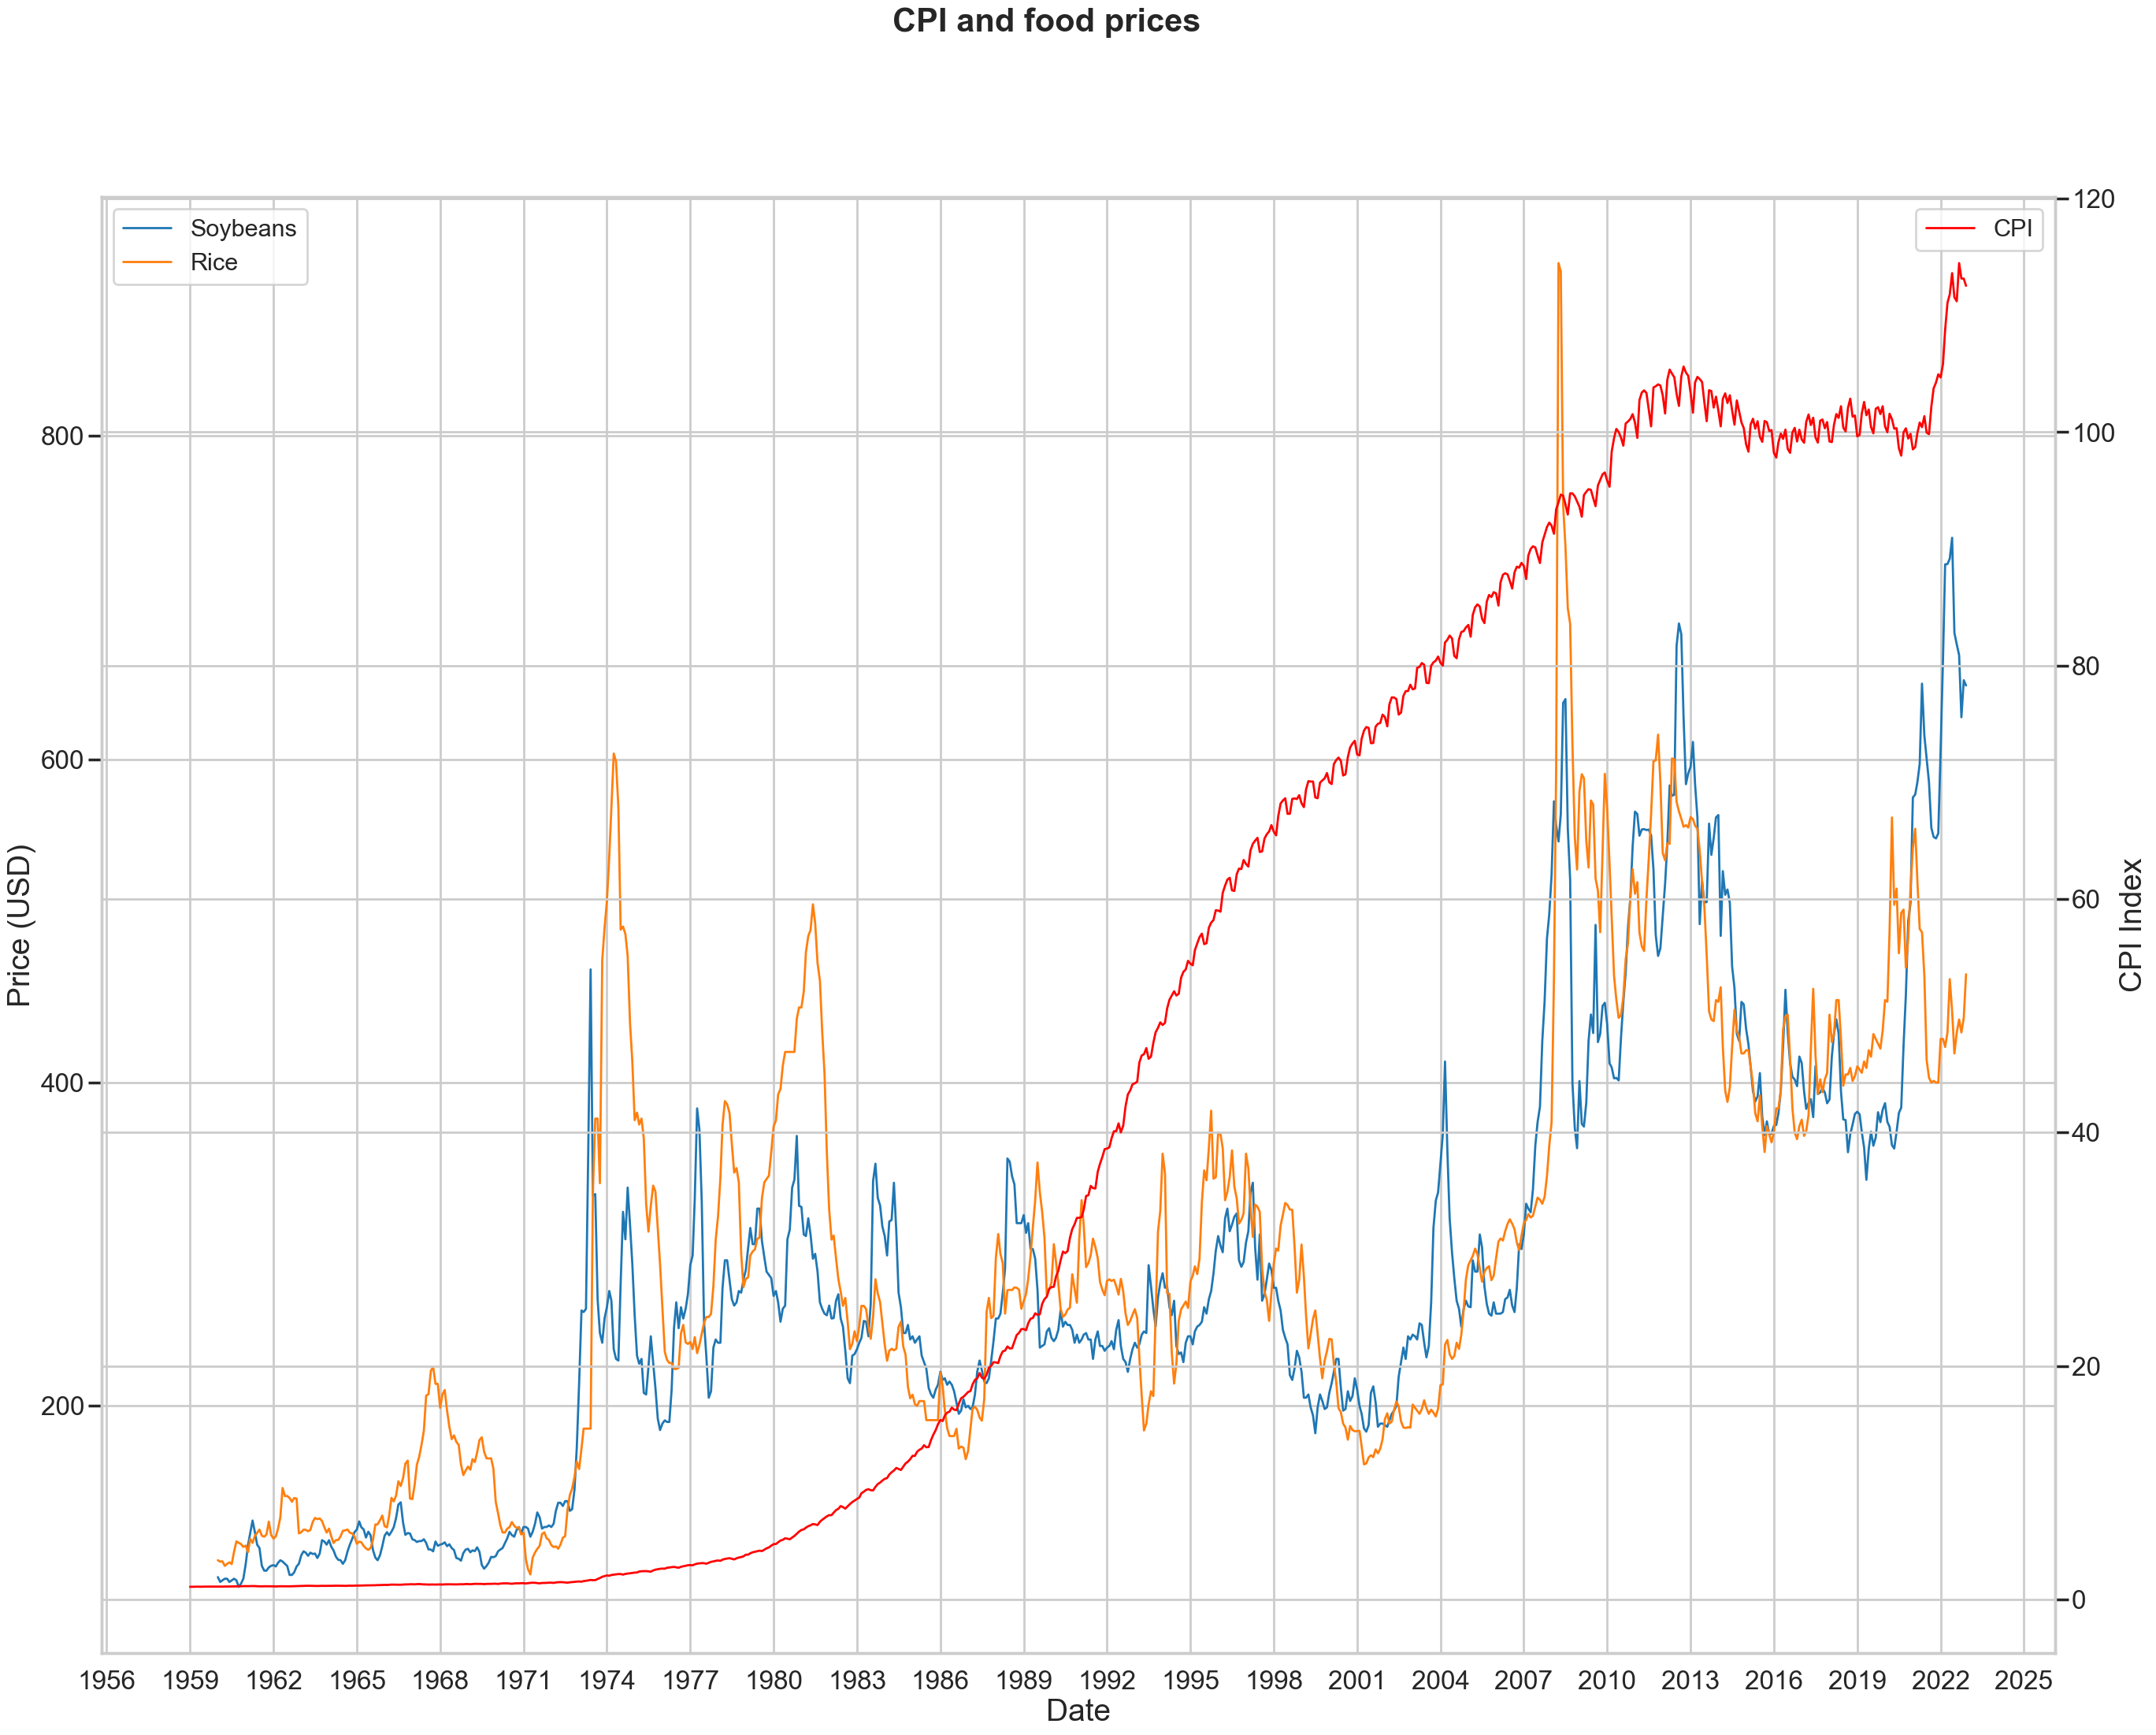

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot Soybeans and rice
ax1.plot(energy['Soybeans'], linewidth=2, label = 'Soybeans')
ax1.plot(energy['Rice, Thai 5% '], linewidth=2, label = 'Rice')

# plot CPI
ax2.plot(CPI['CPI_index'], color='red', linewidth=2, label = 'CPI')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Price (USD)', fontsize=28)
ax2.set_ylabel('CPI Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)
ax2.tick_params(axis='both', labelsize=24)


# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
ate_format = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_formatter(date_format)

# Add a main title for the figure
fig.suptitle('CPI and food prices', fontsize=30, fontweight='bold')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

In [ ]:
merged_data = pd.merge(CPI, energy[['Crude oil, average', 'Soybeans', 'Natural gas, Europe **', 'Rice, Thai 5% ']], right_index = True, left_index = True)

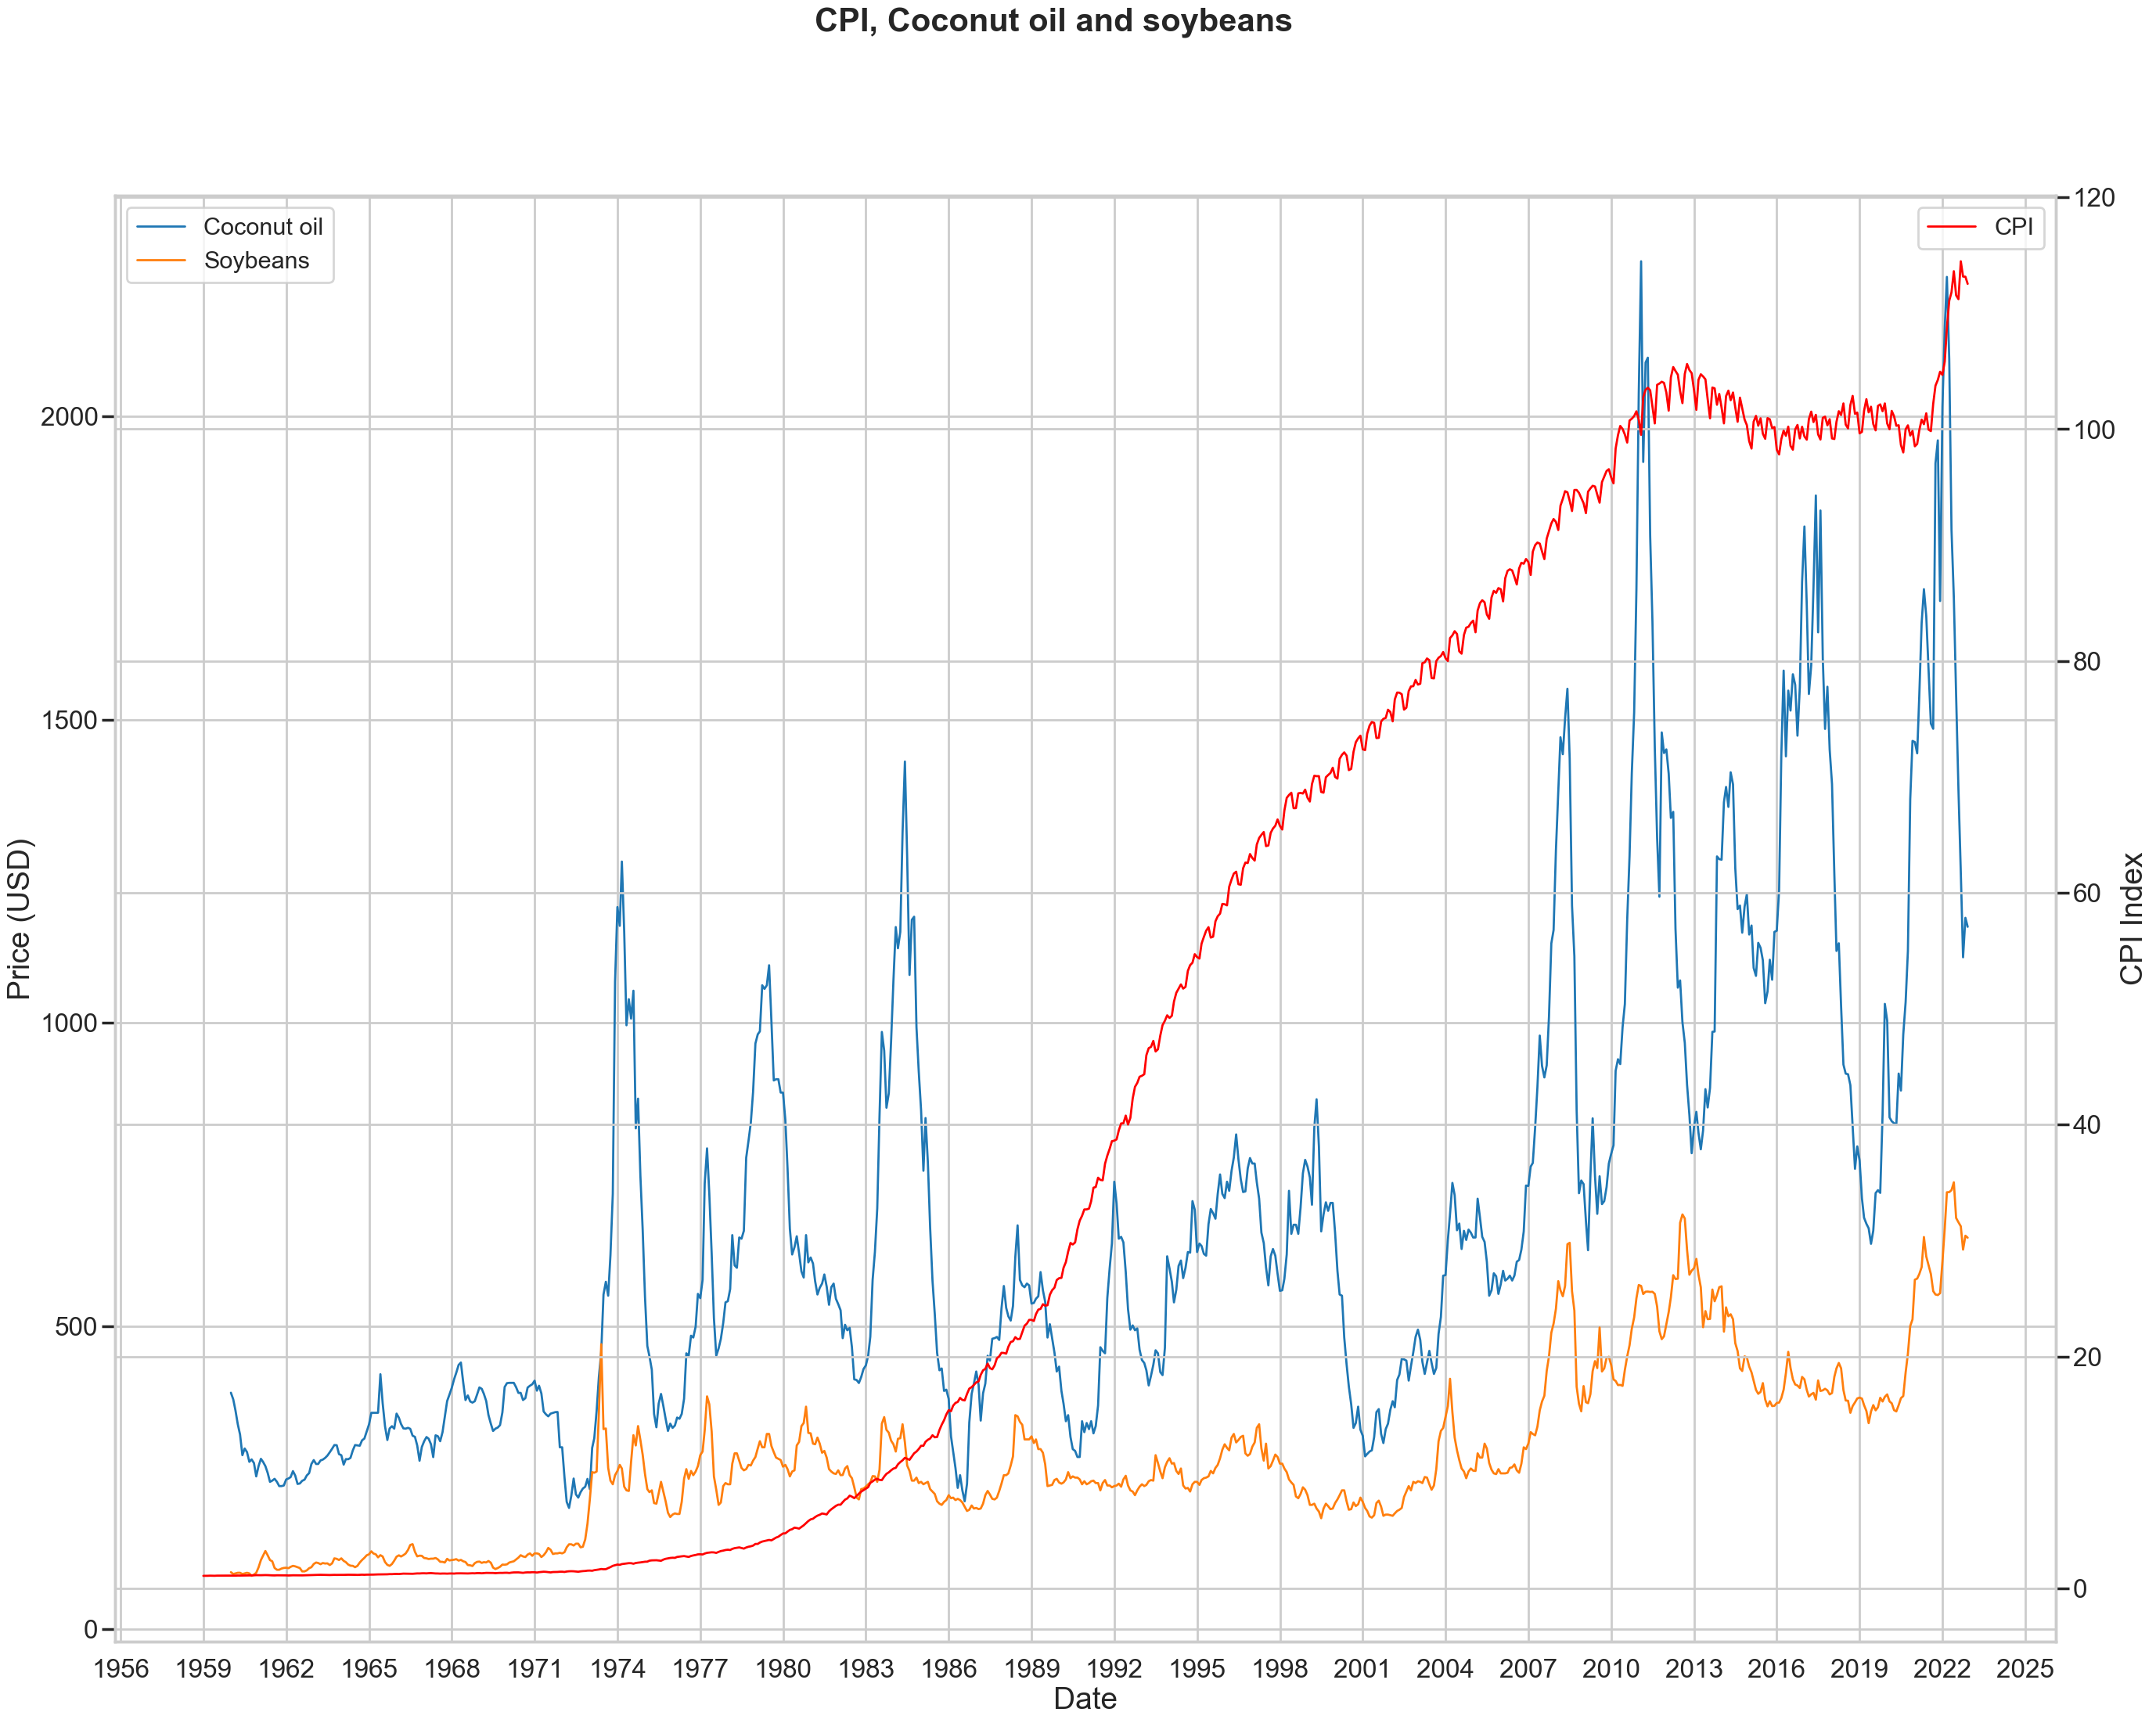

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot coconut oil and Soybeans
ax1.plot(energy['Coconut oil'], linewidth=2, label = 'Coconut oil')
ax1.plot(energy['Soybeans'], linewidth=2, label = 'Soybeans')

# plot CPI
ax2.plot(CPI['CPI_index'], color='red', linewidth=2, label = 'CPI')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Price (USD)', fontsize=28)
ax2.set_ylabel('CPI Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)
ax2.tick_params(axis='both', labelsize=24)


# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
ate_format = mdates.DateFormatter('%Y')
ax2.xaxis.set_major_formatter(date_format)

# Add a main title for the figure
fig.suptitle('CPI, Coconut oil and soybeans', fontsize=30, fontweight='bold')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

Coconut oil and Soybeans follow a very similar pattern.

Text(0.5, 0.98, 'Scatterplot for CPI and Commodity Prices')

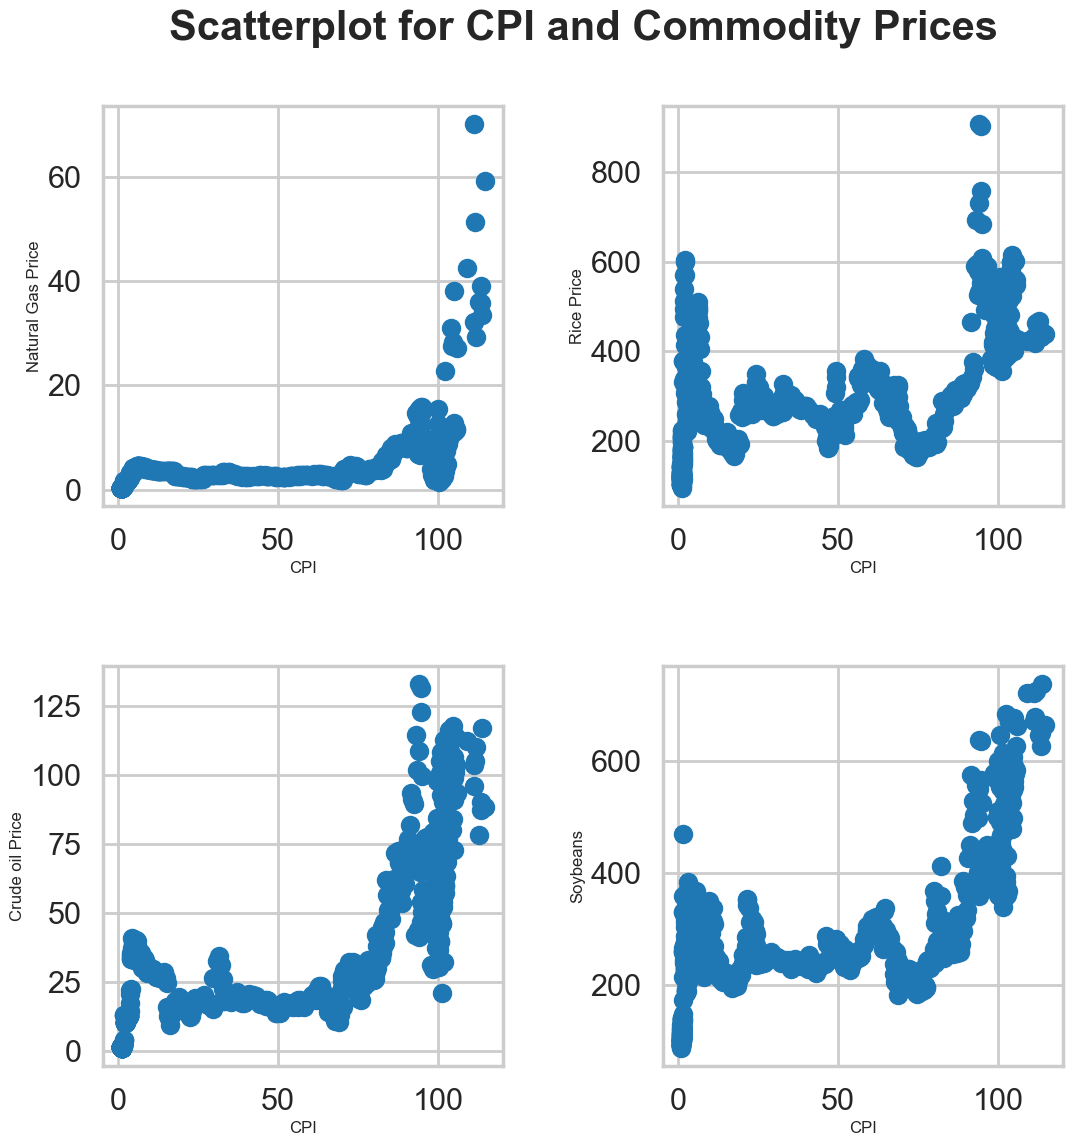

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12,12))
ax[0,0].set_xlabel('CPI', fontsize = 12)
ax[0,0].set_ylabel('Natural Gas Price', fontsize = 12)
ax[0,0].scatter(merged_data['CPI_index'], merged_data['Natural gas, Europe **'])

ax[1,0].set_xlabel('CPI', fontsize = 12)
ax[1,0].set_ylabel('Crude oil Price', fontsize = 12)
ax[1,0].scatter(merged_data['CPI_index'], merged_data['Crude oil, average'])

ax[1,1].set_xlabel('CPI', fontsize = 12)
ax[1,1].set_ylabel('Soybeans', fontsize = 12)
ax[1,1].scatter(merged_data['CPI_index'], merged_data['Soybeans'])

ax[0,1].set_xlabel('CPI', fontsize = 12)
ax[0,1].set_ylabel('Rice Price', fontsize = 12)
ax[0,1].scatter(merged_data['CPI_index'], merged_data['Rice, Thai 5% '])

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Add a main title for the figure
fig.suptitle('Scatterplot for CPI and Commodity Prices', fontsize=30, fontweight='bold')


For lower values of CPI (<80), there is no emminent relationship betweeen CPI and commodity prices. However, when CPI exceeds 80 units crude oil price, wheat price and rice price and natural gas seem to climb exponentially.

In [ ]:
energy.describe()

Crude oil, average  Natural gas, US  Natural gas, Europe **  \
count          756.000000       756.000000              756.000000   
mean            31.942135         2.400707                4.551961   
std             30.712156         2.208413                6.132065   
min              1.210000         0.140000                0.384150   
25%             10.599998         0.430000                1.730000   
50%             20.310000         2.030750                2.890000   
75%             46.371326         3.049875                4.970236   
max            132.825184        13.522619               70.043640   

            Cocoa  Coffee, Arabica  Coffee, Robusta  Tea, avg 3 auctions  \
count  756.000000       756.000000       756.000000           756.000000   
mean     1.729645         2.576555         1.727478             1.773128   
std      0.879461         1.342454         0.940748             0.715222   
min      0.259000         0.777600         0.487210             0.707400   
25%      1.032200         1.351625         0.923053             1.177600   
50%      1.601000         2.697794         1.632172             1.654579   
75%      2.324550         3.312950         2.282200             2.352764   
max      4.362900         7.003600         6.883547             3.369385   

       Coconut oil    Soybeans  Rice, Thai 5%   ...  Phosphate rock  \
count   756.000000  756.000000      756.000000  ...      756.000000   
mean    689.701973  282.479002      298.258545  ...       57.840754   
std     403.931718  137.866136      136.673772  ...       62.987236   
min     200.000000   88.000000       95.670000  ...       11.000000   
25%     380.000000  200.000000      190.297500  ...       31.000000   
50%     583.000000  257.000000      276.775000  ...       36.000000   
75%     856.000000  359.215000      395.242500  ...       68.000000   
max    2256.000000  737.060000      907.000000  ...      450.000000   

               TSP       Urea   Potassium chloride     Aluminum         Lead  \
count   756.000000  756.000000          756.000000   756.000000   756.000000   
mean    197.316687  164.064491          142.368353  1411.399292   919.228063   
std     167.602948  138.156622          131.847152   646.614475   749.248862   
min      36.000000   16.000000           22.000000   496.039490   140.700000   
25%      99.750000   70.925000           55.075000   852.636841   394.125000   
50%     142.500000  122.500000          110.200000  1427.641113   582.000000   
75%     245.375000  222.281250          192.500000  1818.162500  1397.364500   
max    1131.500000  925.000000          682.500000  3577.860000  3719.717000   

                Tin        Nickel         Zinc      Silver  
count    756.000000    756.000000   756.000000  756.000000  
mean   10314.659517   8954.705032  1225.958105    8.886463  
std     7560.551619   7490.980639   883.481018    8.060308  
min     2162.700000   1631.000000   176.600000    0.913700  
25%     4738.698500   3915.125000   663.725000    4.059912  
50%     6914.800000   6478.270000   981.150000    5.380850  
75%    15081.797500  12738.560000  1776.450000   13.926400  
max    43983.350000  52179.048000  4405.395000   42.695200  

[8 rows x 30 columns]

In [ ]:
electric_consumption

Date  electric_consumption
0    2008-01              4751.000
1        NaN                   NaN
2    2008-02              4253.000
3        NaN                   NaN
4    2008-03              3873.000
..       ...                   ...
352  2022-09              4046.558
353      NaN                   NaN
354  2022-10              3720.550
355      NaN                   NaN
356  2022-11              3700.371

[357 rows x 2 columns]

In [ ]:
electric_consumption.dropna(axis = 0, inplace = True)

In [ ]:
electric_consumption['Date'] = pd.to_datetime(electric_consumption['Date'])

In [ ]:
electric_consumption.set_index('Date', inplace = True)

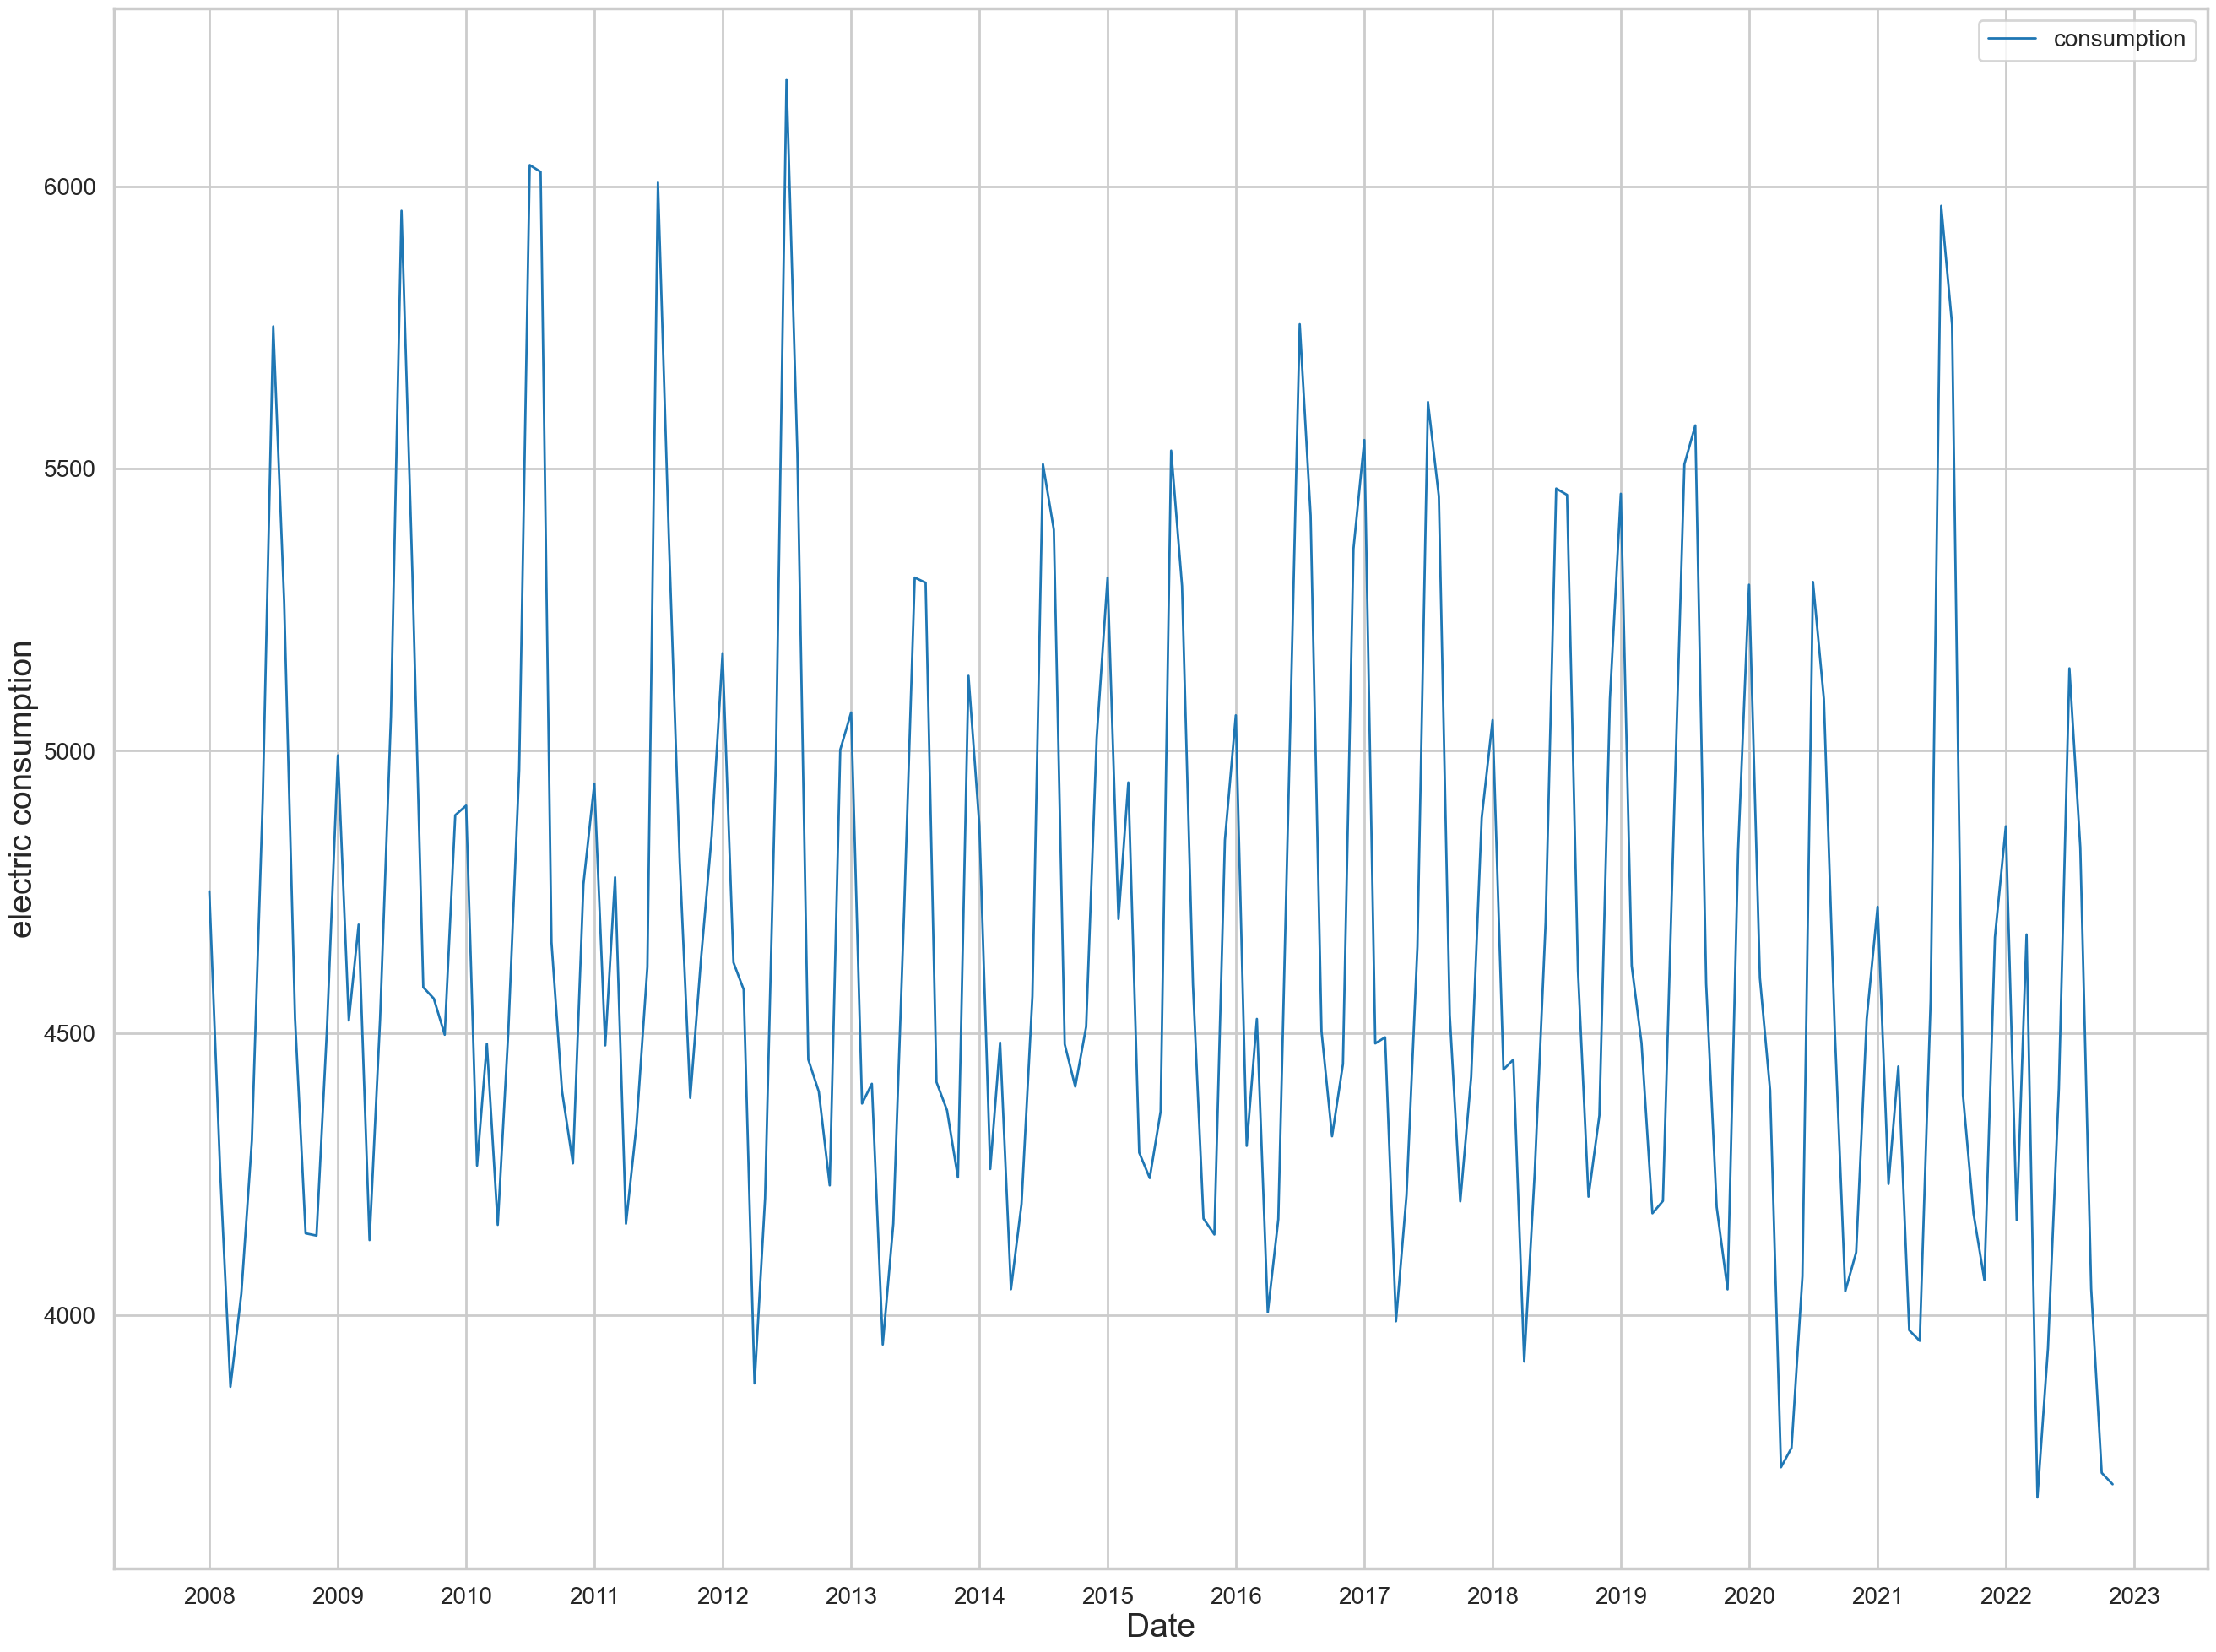

In [ ]:
import matplotlib.dates as mdates
import numpy as np
fig,ax= plt.subplots(figsize=(32,24))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Date', fontsize = 28)
ax.set_ylabel('electric consumption', fontsize = 28)

# set the tick marks every 1 years
years = mdates.YearLocator(base=1)
ax.xaxis.set_major_locator(years)

ax.plot(electric_consumption, linewidth=2, label = 'consumption')

ax.legend(fontsize = '20')

In [ ]:
import_prices['Date'] = pd.to_datetime(import_prices['Date'])

In [ ]:
import_prices.sort_values(ascending = True, by = 'Date', inplace = True)

In [ ]:
import_prices.set_index('Date', inplace = True)

In [ ]:
import_prices.rename(columns = {'Value':'import price'}, inplace = True)

In [ ]:
import_prices['Date'] = import_prices.index
import_prices['Month'] = import_prices.index.month
import_prices['Year'] = import_prices.index.year
merged_data = pd.merge(CPI, import_prices, on=['Month', 'Year'], how = 'inner')

In [ ]:
merged_data.drop('Date_y', axis = 1, inplace = True)

In [ ]:
merged_data.rename(columns = {'Date_x' : 'Date'}, inplace = True)

In [ ]:
merged_data.set_index('Date')

CPI_index  Month  Year  import price
Date                                             
1968-01-01    1.286406      1  1968        1.1279
1968-02-01    1.277787      2  1968        1.1279
1968-03-01    1.295025      3  1968        1.1246
1968-04-01    1.299335      4  1968        1.1246
1968-05-01    1.299335      5  1968        1.1246
...                ...    ...   ...           ...
2022-07-01  111.543407      7  2022      158.3182
2022-08-01  111.211375      8  2022      160.8214
2022-09-01  114.478049      9  2022      157.2755
2022-10-01  113.157924     10  2022      159.7038
2022-11-01  113.146170     11  2022      147.8985

[659 rows x 4 columns]

In [ ]:
merged_data.corr()

CPI_index     Month      Year  import price
CPI_index      1.000000  0.012871  0.973756      0.985414
Month          0.012871  1.000000 -0.004129      0.010373
Year           0.973756 -0.004129  1.000000      0.976563
import price   0.985414  0.010373  0.976563      1.000000

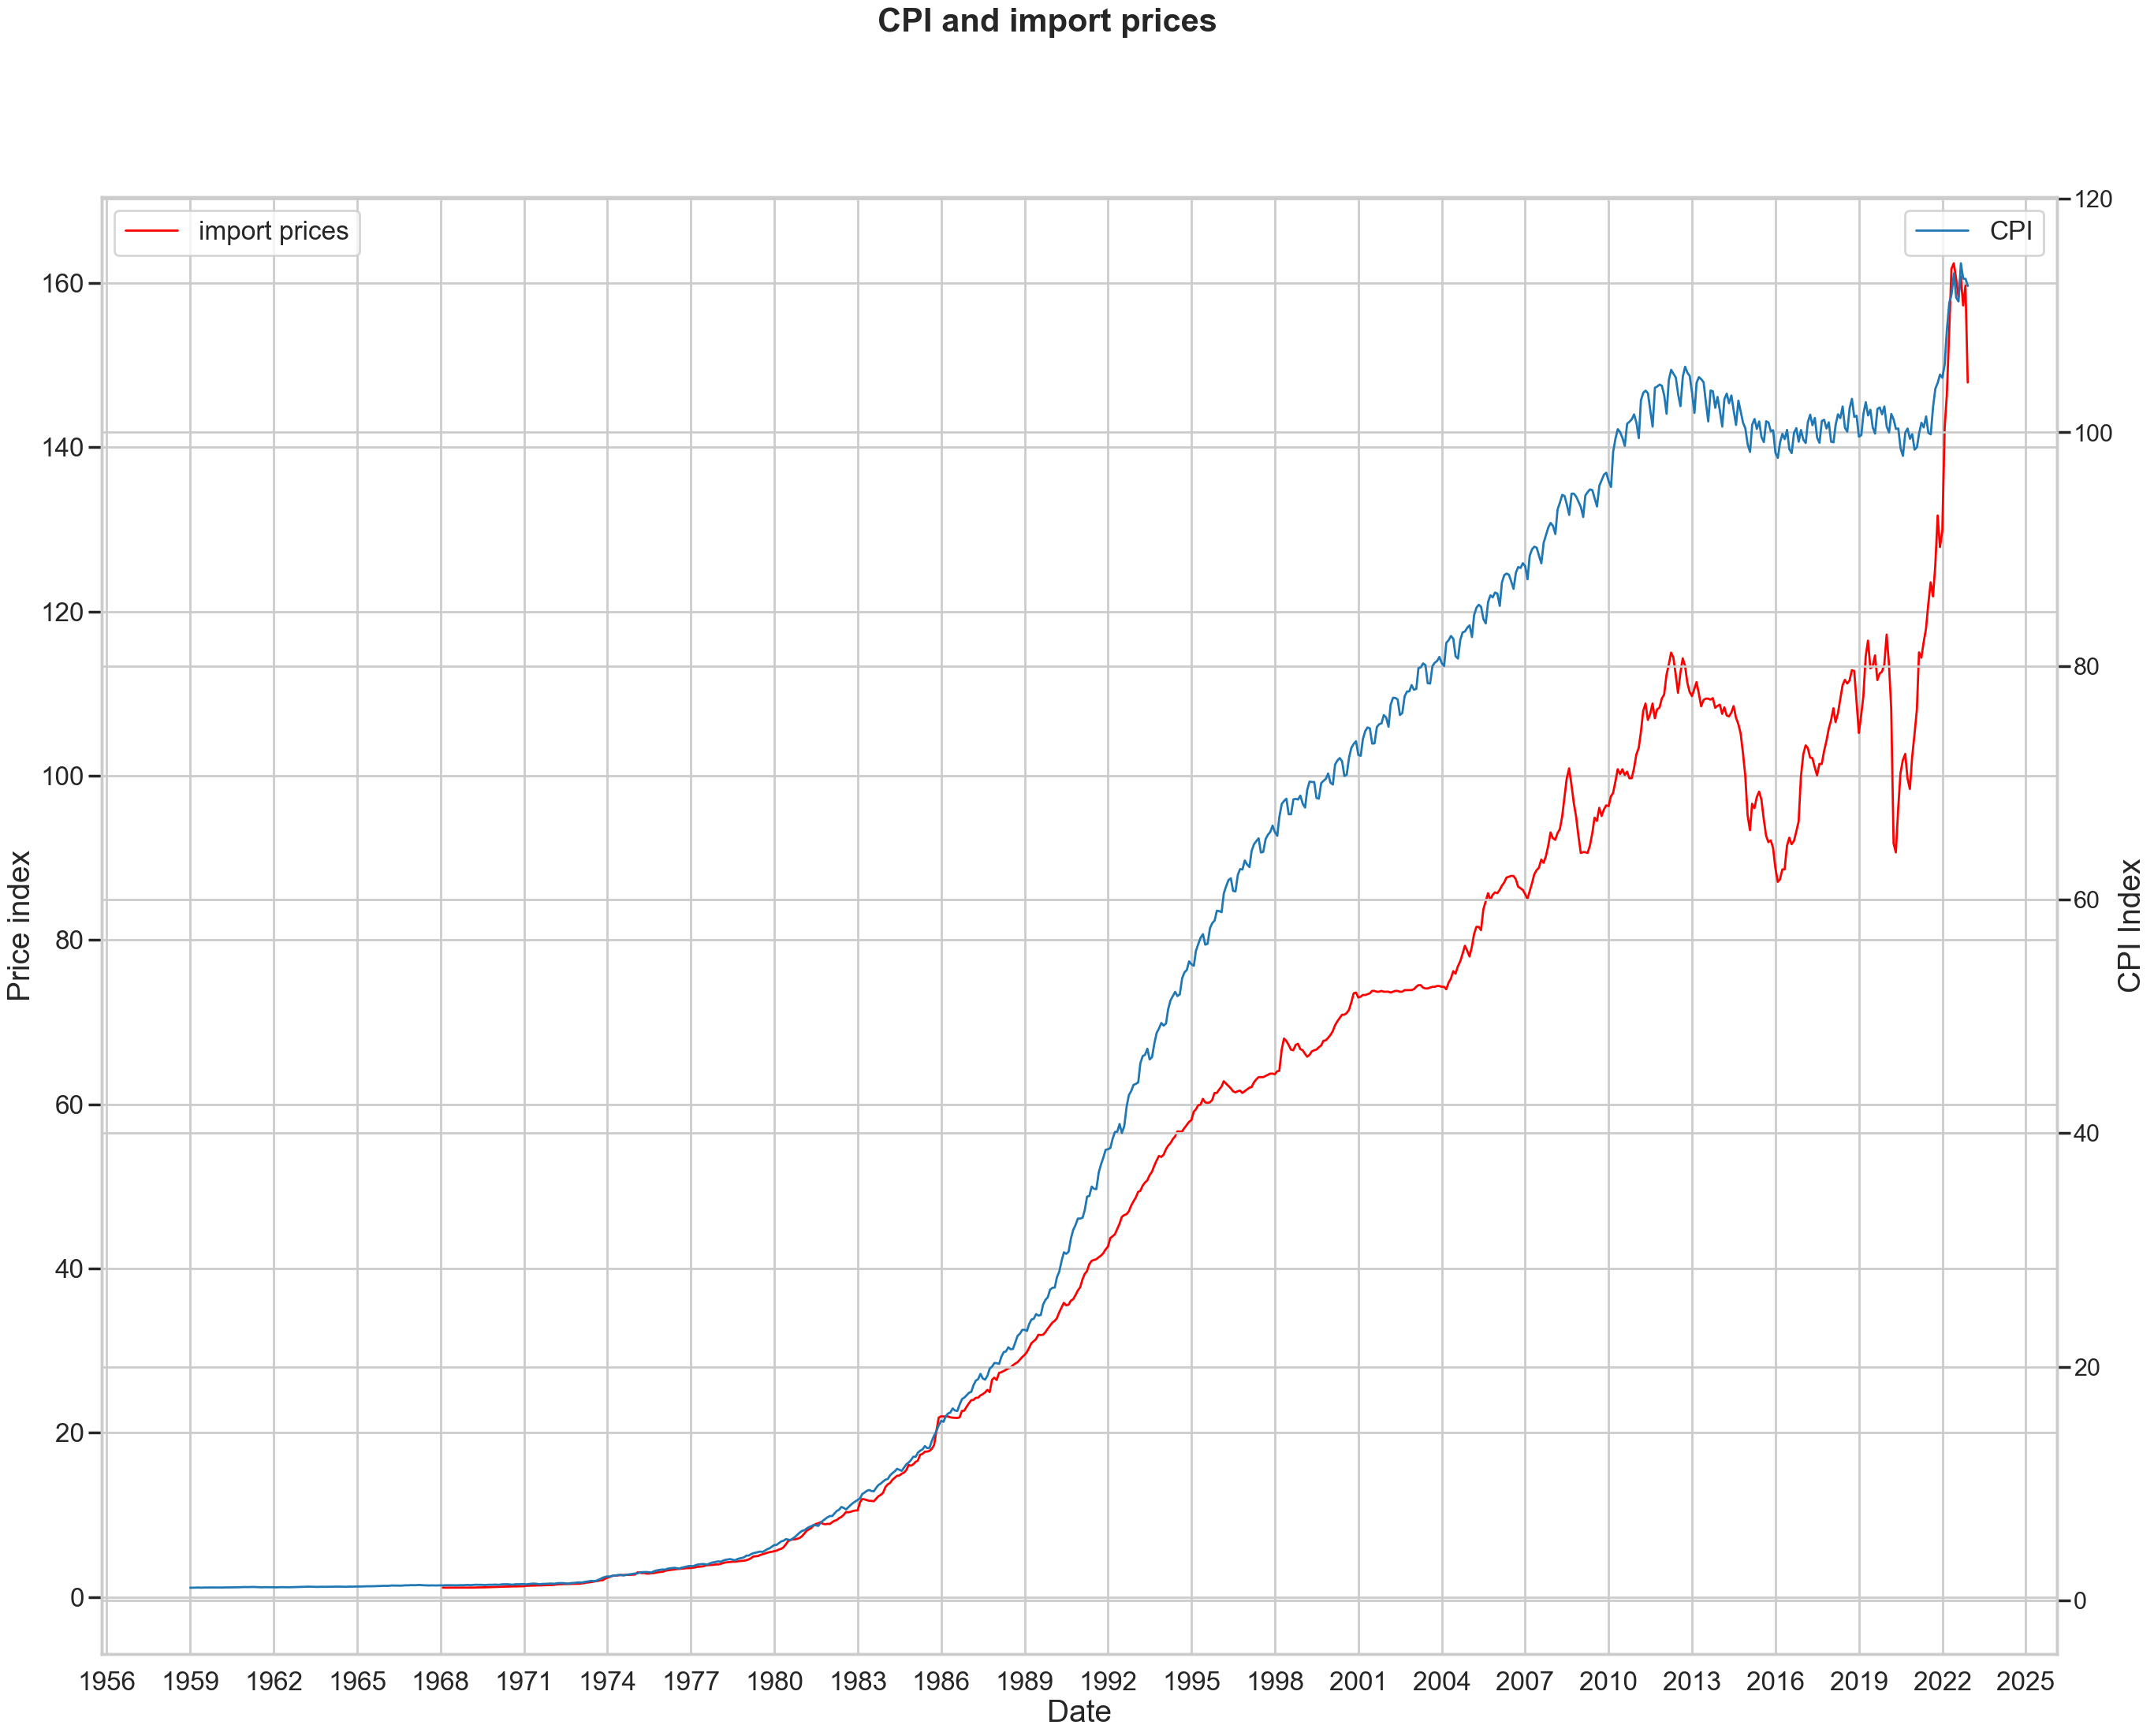

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot import prices
ax1.plot(import_prices['import price'], linewidth=2, label = 'import prices', color = 'r')

# plot CPI
ax2.plot(CPI['CPI_index'], linewidth=2, label = 'CPI')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Price index', fontsize=28)
ax2.set_ylabel('CPI Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)

# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# Add separate legends for each plot
ax1.legend(loc='upper left', fontsize='24')
ax2.legend(loc='upper right', fontsize='24')

# Add a main title for the figure
fig.suptitle('CPI and import prices', fontsize=30, fontweight='bold')

plt.show()



# Asset Prices

In [ ]:
stock_market

Date    Value
0     2023-02-03  1033.44
1     2023-02-02  1029.68
2     2023-02-01  1027.25
3     2023-01-31  1022.82
4     2023-01-30  1024.75
...          ...      ...
8776  1987-01-09   103.23
8777  1987-01-08   101.33
8778  1987-01-07    99.76
8779  1987-01-05    98.51
8780  1987-01-02    97.36

[8781 rows x 2 columns]

In [ ]:
stock_market.head()

Date    Value
0  2023-02-03  1033.44
1  2023-02-02  1029.68
2  2023-02-01  1027.25
3  2023-01-31  1022.82
4  2023-01-30  1024.75

In [ ]:
stock_market.dtypes

Date      object
Value    float64
dtype: object

In [ ]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

In [ ]:
stock_market.set_index('Date', inplace = True)

In [ ]:
stock_market.sort_index(ascending = True, inplace = True)

In [ ]:
stock_market.describe()

Value
count  8781.000000
mean   1624.607932
std    1304.730797
min      97.360000
25%     772.900000
50%     947.620000
75%    2313.500000
max    6355.040000

In [ ]:
stock_market.rename(columns = {'Value':'average index'}, inplace = True)

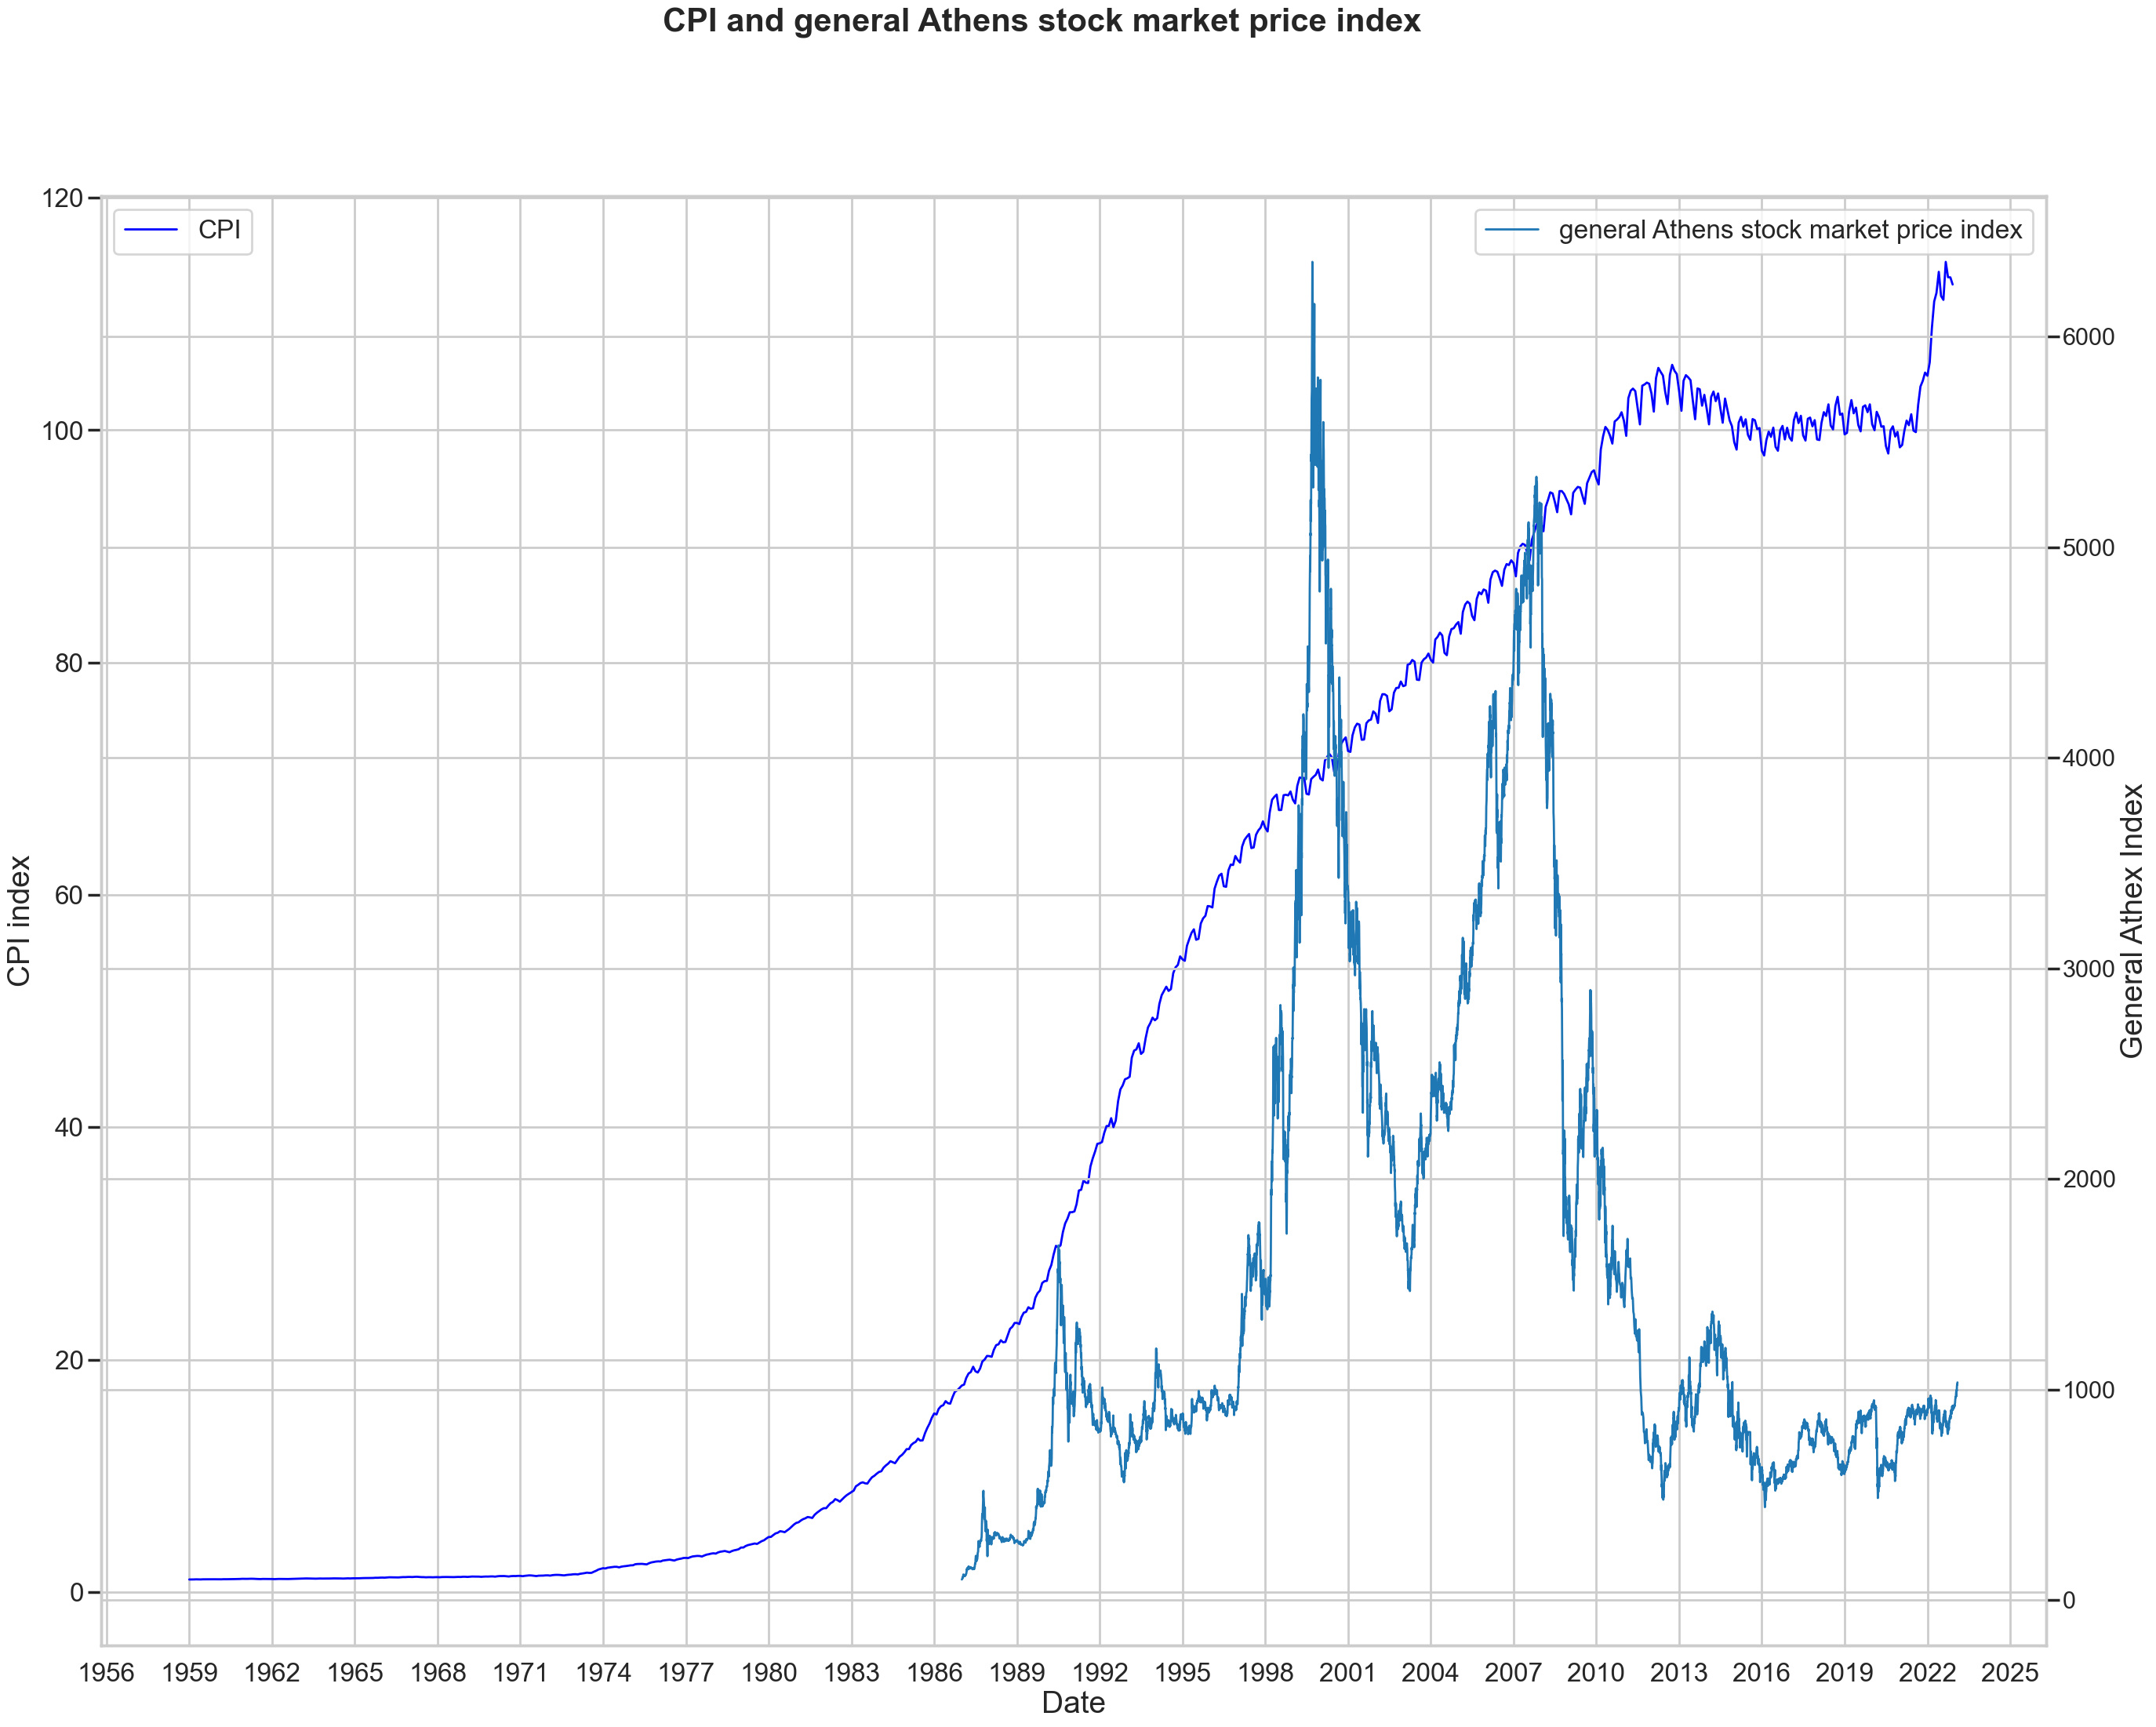

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot import prices
ax1.plot(CPI['CPI_index'], linewidth=2, label = 'CPI', color = 'b')

# plot CPI
ax2.plot(stock_market['average index'], linewidth=2, label = 'general Athens stock market price index')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('CPI index', fontsize=28)
ax2.set_ylabel('General Athex Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)

# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# Add separate legends for each plot
ax1.legend(loc='upper left', fontsize='24')
ax2.legend(loc='upper right', fontsize='24')

# Add a main title for the figure
fig.suptitle('CPI and general Athens stock market price index', fontsize=30, fontweight='bold')

plt.show()



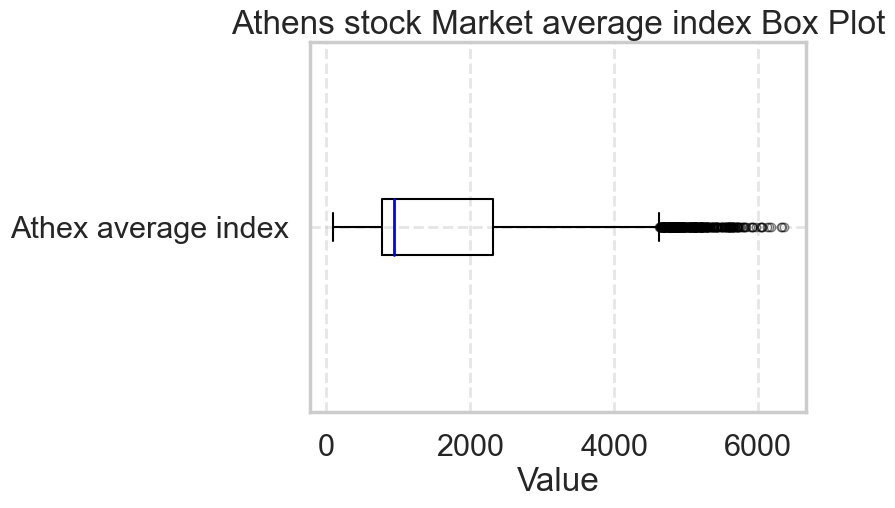

In [ ]:

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
box = ax.boxplot(stock_market['average index'], vert=False)

# Customize the box plot appearance
ax.set_title("Athens stock Market average index Box Plot")
ax.set_xlabel("Value")
ax.set_yticklabels(["Athex average index"])
ax.grid(True, linestyle="--", alpha=0.5)

# Set the style of the outliers
outliers = box["fliers"]
for outlier in outliers:
    outlier.set(marker="o", color="red", alpha=0.5)

# Set the style of the whiskers and caps
whiskers = box["whiskers"]
caps = box["caps"]
for whisker, cap in zip(whiskers, caps):
    whisker.set(color="black", linewidth=1.5)
    cap.set(color="black", linewidth=1.5)

# Set the style of the medians and boxes
medians = box["medians"]
boxes = box["boxes"]
for median in medians:
    median.set(color="blue", linewidth=2)
for box_ in boxes:
    box_.set(color="black", linewidth=1.5)

# Display the box plot
plt.show()

There is no clear relationship between cpi and stock market prices, however it seems like that between 1997 and 2008, when two asset price spikes occur, CPI rises and after 2010, when asset prices drop and stabilize, CPI also stabilizes for the first time until 2022, when it rises again, potentially due to other factors.

In [ ]:
CPI['CPI_index'].corr(stock_market['average index'])

0.16004081760019326

In [ ]:
greek_bonds

Date  10-year Price  10-year Yield (%)  15-year Price  \
0   2023-01-01          99.57               4.30          99.25   
1   2022-12-01          81.03               4.22          96.15   
2   2022-11-01          79.53               4.42          93.83   
3   2022-10-01          76.42               4.87          91.43   
4   2022-09-01          79.11               4.44          95.88   
..         ...            ...                ...            ...   
247 2002-05-01          97.98               5.52         107.49   
248 2002-04-01          98.01               5.51         107.53   
249 2002-03-01          98.02               5.51         107.77   
250 2002-02-01          99.53               5.31         109.38   
251 2002-01-01         100.35               5.23         109.92   

     15-year Yield (%)  
0                 4.07  
1                 4.38  
2                 4.60  
3                 4.85  
4                 4.39  
..                 ...  
247               5.60  
248               5.60  
249               5.58  
250               5.41  
251               5.36  

[252 rows x 5 columns]

In [ ]:
greek_bonds.describe()

10-year Price  10-year Yield (%)  15-year Price  15-year Yield (%)
count     252.000000         252.000000     252.000000         252.000000
mean       87.001984           6.494563      89.518929           6.419762
std        21.890725           5.126705      29.420075           4.374852
min        15.840000           0.590000      13.280000           0.700000
25%        73.417500           3.977500      64.437500           4.150000
50%        96.370000           4.600000      95.905000           4.935000
75%       101.082500           7.975000     115.085000           8.107500
max       124.080000          29.240000     132.680000          25.360000

In [ ]:
greek_bonds.sort_values(ascending = True, by = 'Date', inplace = True)

In [ ]:
greek_bonds['Date'] = pd.to_datetime(greek_bonds['Date'])

In [ ]:
greek_bonds.set_index('Date', inplace = True)

In [ ]:
greek_bonds.sort_index(ascending = True, inplace = True)

In [ ]:
greek_bonds

10-year Price  10-year Yield (%)  15-year Price  15-year Yield (%)
Date                                                                          
2002-01-01         100.35               5.23         109.92               5.36
2002-02-01          99.53               5.31         109.38               5.41
2002-03-01          98.02               5.51         107.77               5.58
2002-04-01          98.01               5.51         107.53               5.60
2002-05-01          97.98               5.52         107.49               5.60
...                   ...                ...            ...                ...
2022-09-01          79.11               4.44          95.88               4.39
2022-10-01          76.42               4.87          91.43               4.85
2022-11-01          79.53               4.42          93.83               4.60
2022-12-01          81.03               4.22          96.15               4.38
2023-01-01          99.57               4.30          99.25               4.07

[252 rows x 4 columns]

In [ ]:
CPI

CPI_index       Date  Month  Year
Date                                          
1959-01-01    1.083857 1959-01-01      1  1959
1959-02-01    1.083857 1959-02-01      2  1959
1959-03-01    1.088166 1959-03-01      3  1959
1959-04-01    1.096785 1959-04-01      4  1959
1959-05-01    1.094630 1959-05-01      5  1959
...                ...        ...    ...   ...
2022-08-01  111.211375 2022-08-01      8  2022
2022-09-01  114.478049 2022-09-01      9  2022
2022-10-01  113.157924 2022-10-01     10  2022
2022-11-01  113.146170 2022-11-01     11  2022
2022-12-01  112.532917 2022-12-01     12  2022

[768 rows x 4 columns]

In [ ]:
greek_bonds.describe()

10-year Price  10-year Yield (%)  15-year Price  15-year Yield (%)
count     252.000000         252.000000     252.000000         252.000000
mean       87.001984           6.494563      89.518929           6.419762
std        21.890725           5.126705      29.420075           4.374852
min        15.840000           0.590000      13.280000           0.700000
25%        73.417500           3.977500      64.437500           4.150000
50%        96.370000           4.600000      95.905000           4.935000
75%       101.082500           7.975000     115.085000           8.107500
max       124.080000          29.240000     132.680000          25.360000

In [ ]:
merged_data = pd.merge(greek_bonds['10-year Price'], CPI, left_index = True, right_index = True)
merged_data = pd.merge(merged_data, greek_bonds['10-year Yield (%)'], left_index = True, right_index = True)
merged_data = pd.merge(merged_data, greek_bonds['15-year Yield (%)'], left_index = True, right_index = True)
merged_data = pd.merge(merged_data, greek_bonds['15-year Price'], left_index = True, right_index = True)

In [ ]:
merged_data

10-year Price   CPI_index       Date  Month  Year  \
Date                                                            
2002-01-01         100.35   75.592693 2002-01-01      1  2002   
2002-02-01          99.53   74.792438 2002-02-01      2  2002   
2002-03-01          98.02   76.684403 2002-03-01      3  2002   
2002-04-01          98.01   77.275046 2002-04-01      4  2002   
2002-05-01          97.98   77.266187 2002-05-01      5  2002   
...                   ...         ...        ...    ...   ...   
2022-08-01          86.06  111.211375 2022-08-01      8  2022   
2022-09-01          79.11  114.478049 2022-09-01      9  2022   
2022-10-01          76.42  113.157924 2022-10-01     10  2022   
2022-11-01          79.53  113.146170 2022-11-01     11  2022   
2022-12-01          81.03  112.532917 2022-12-01     12  2022   

            10-year Yield (%)  15-year Yield (%)  15-year Price  
Date                                                             
2002-01-01               5.23               5.36         109.92  
2002-02-01               5.31               5.41         109.38  
2002-03-01               5.51               5.58         107.77  
2002-04-01               5.51               5.60         107.53  
2002-05-01               5.52               5.60         107.49  
...                       ...                ...            ...  
2022-08-01               3.46               3.62         104.26  
2022-09-01               4.44               4.39          95.88  
2022-10-01               4.87               4.85          91.43  
2022-11-01               4.42               4.60          93.83  
2022-12-01               4.22               4.38          96.15  

[251 rows x 8 columns]

In [ ]:
merged_data.corr()

10-year Price  CPI_index     Month      Year  \
10-year Price           1.000000  -0.475268  0.009171 -0.127784   
CPI_index              -0.475268   1.000000  0.077784  0.853060   
Month                   0.009171   0.077784  1.000000 -0.000286   
Year                   -0.127784   0.853060 -0.000286  1.000000   
10-year Yield (%)      -0.908631   0.300939 -0.026208 -0.081030   
15-year Yield (%)      -0.918710   0.302170 -0.015064 -0.085669   
15-year Price           0.906534  -0.582822 -0.002205 -0.251111   

                   10-year Yield (%)  15-year Yield (%)  15-year Price  
10-year Price              -0.908631          -0.918710       0.906534  
CPI_index                   0.300939           0.302170      -0.582822  
Month                      -0.026208          -0.015064      -0.002205  
Year                       -0.081030          -0.085669      -0.251111  
10-year Yield (%)           1.000000           0.989140      -0.844249  
15-year Yield (%)           0.989140           1.000000      -0.873981  
15-year Price              -0.844249          -0.873981       1.000000

Text(0.5, 0.98, 'CPI and Greek bonds')

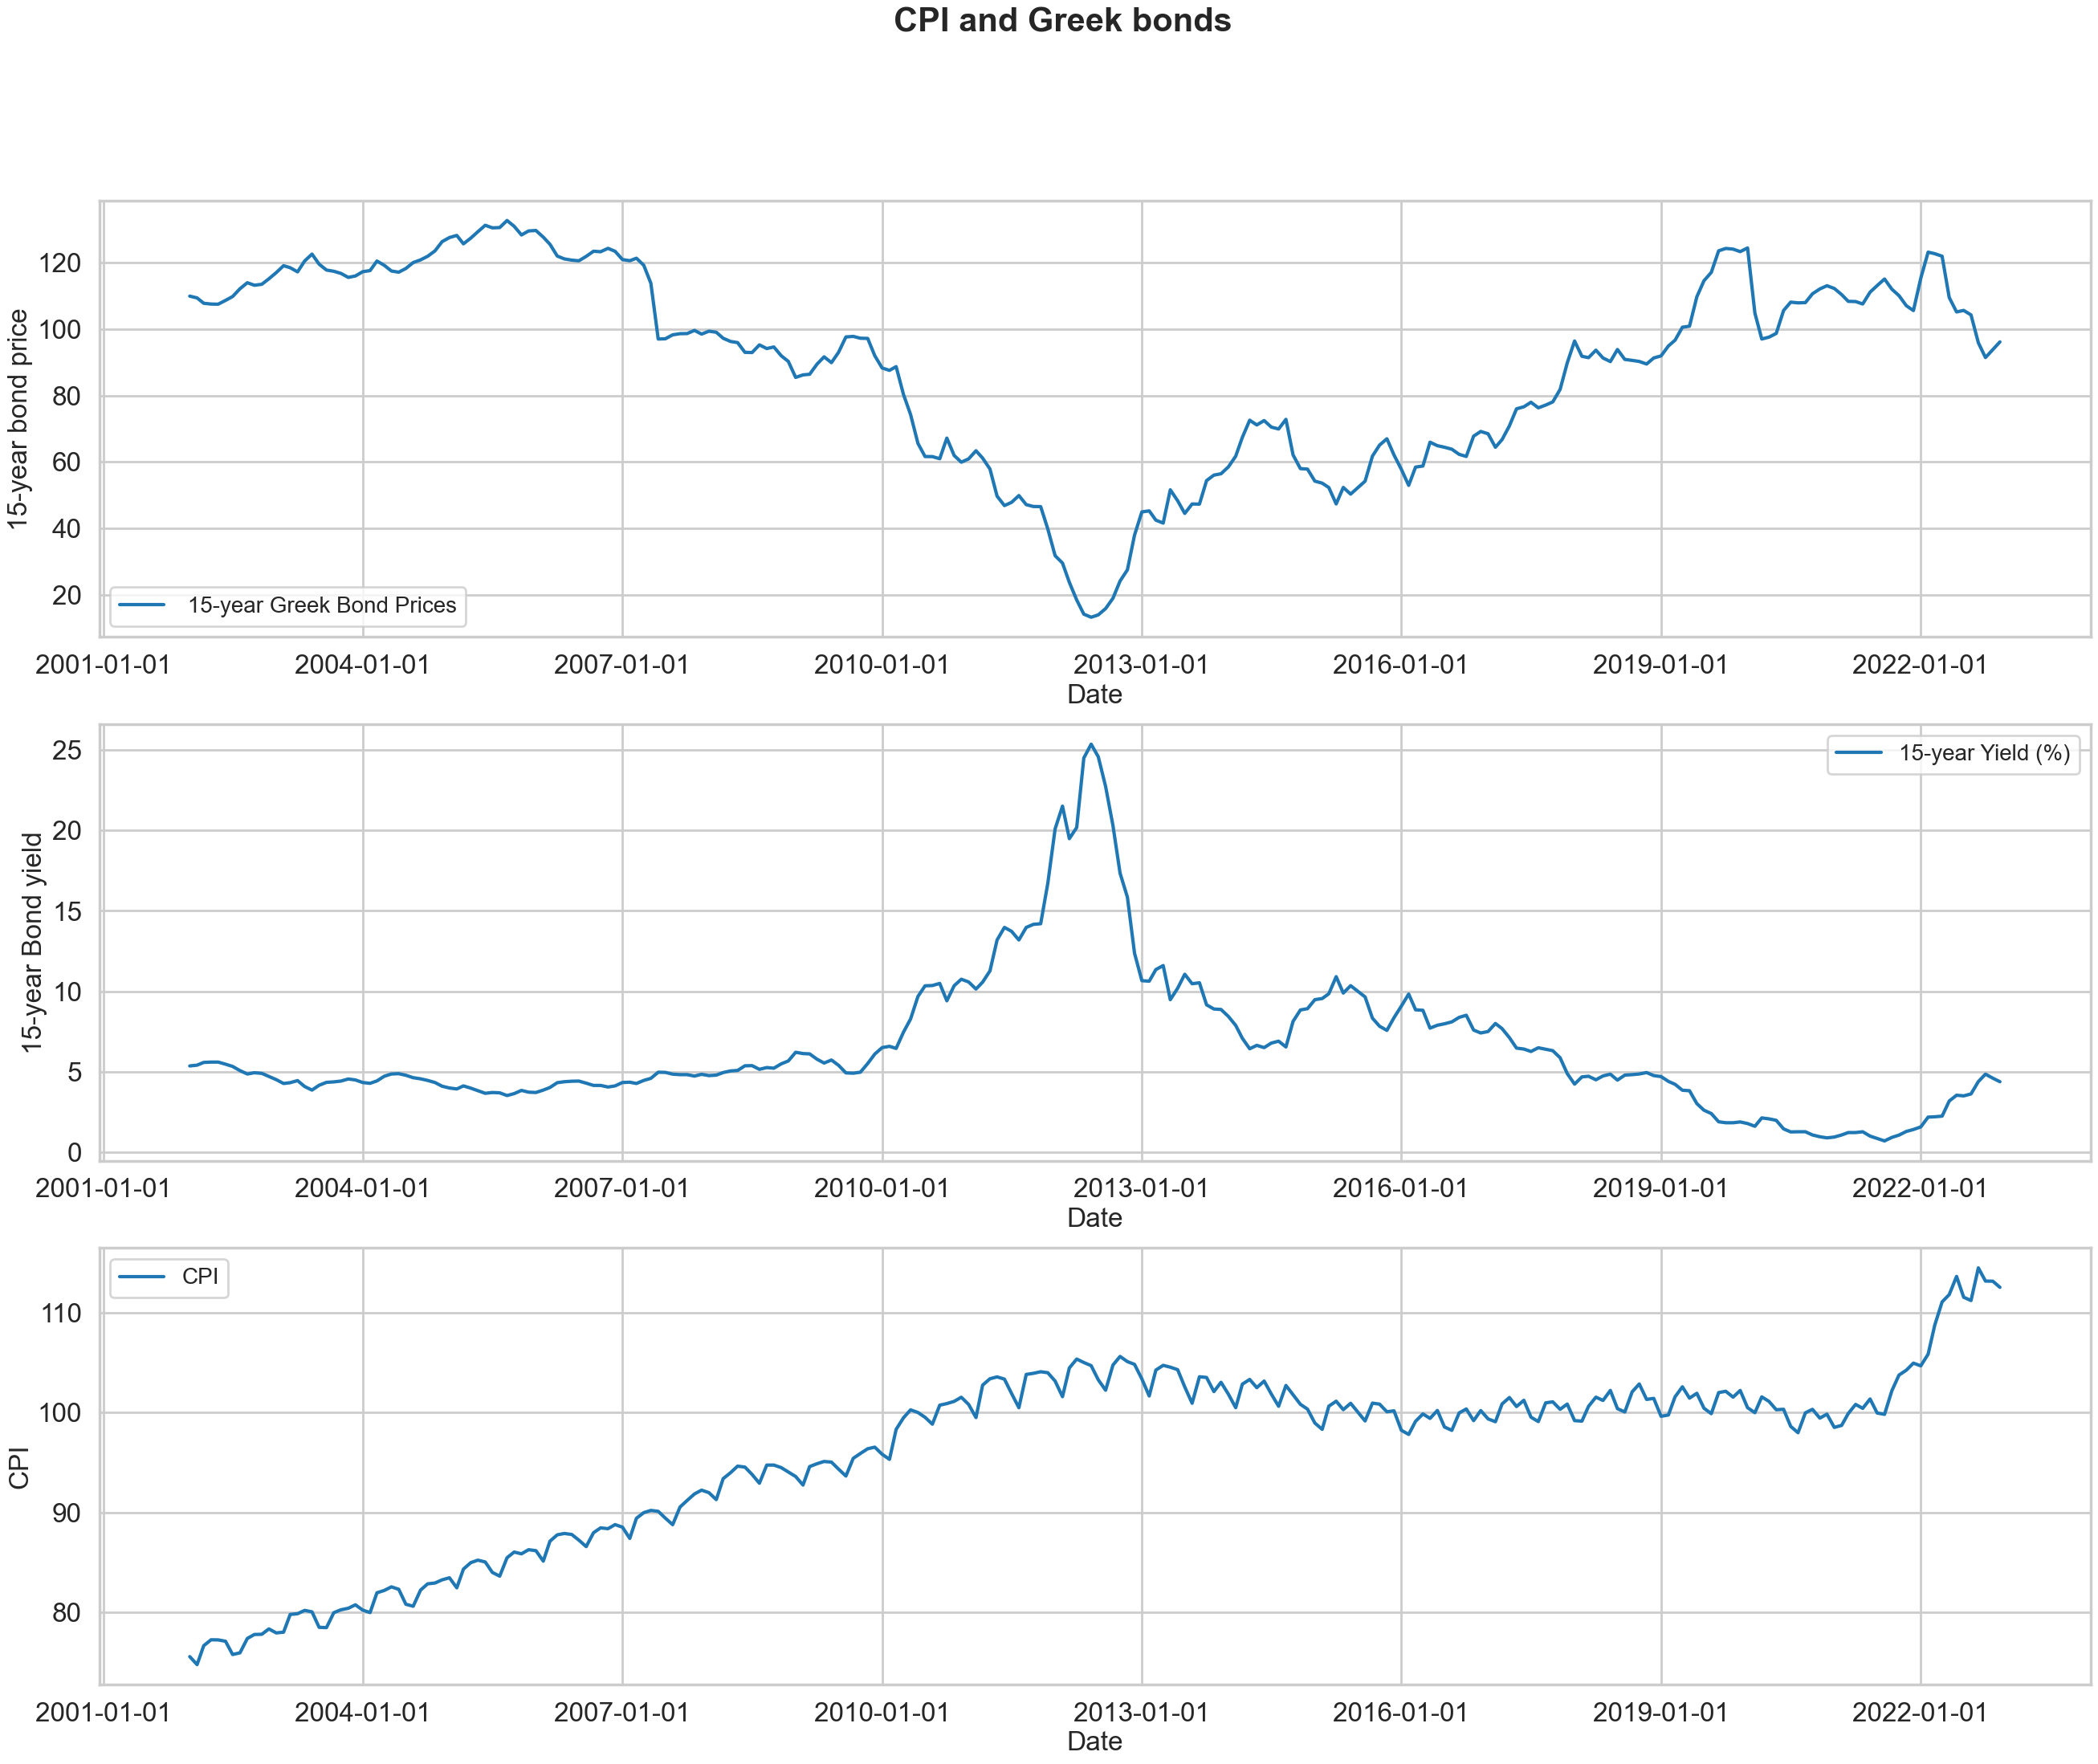

In [ ]:
fig, ax = plt.subplots(3, figsize=(32,24))

ax[0].set_xlabel('Date', fontsize = 24)
ax[0].set_ylabel('15-year bond price', fontsize = 24)

ax[1].set_xlabel('Date', fontsize = 24)
ax[1].set_ylabel('15-year Bond yield', fontsize = 24)

ax[2].set_xlabel('Date', fontsize = 24)
ax[2].set_ylabel('CPI', fontsize = 24)

for a in ax:
    a.tick_params(axis='both', labelsize=24)


ax[0].plot(merged_data['15-year Price'], linewidth=3, label = ' 15-year Greek Bond Prices')
ax[0].legend(fontsize = '20')

ax[1].plot(merged_data['15-year Yield (%)'], linewidth=3, label = '15-year Yield (%)')
ax[1].legend(fontsize = '20')


ax[2].plot(merged_data['CPI_index'], linewidth=3, label = 'CPI')
ax[2].legend(fontsize = '20')

years = mdates.YearLocator(base=3)
ax[0].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_locator(years)
ax[2].xaxis.set_major_locator(years)

fig.suptitle('CPI and Greek bonds', fontsize=30, fontweight='bold')

In [ ]:
greek_bonds = greek_bonds['15-year Price']

In [ ]:
greek_bonds = pd.DataFrame(greek_bonds)


In [ ]:
greek_bonds

15-year Price
Date                     
2002-01-01         109.92
2002-02-01         109.38
2002-03-01         107.77
2002-04-01         107.53
2002-05-01         107.49
...                   ...
2022-09-01          95.88
2022-10-01          91.43
2022-11-01          93.83
2022-12-01          96.15
2023-01-01          99.25

[252 rows x 1 columns]

There is no clear relationship among the variables above.

# Money Quantity

There is eminent seasonality in the electric consumption data and that probably occurs because during the summer season in Greece, a lot of stores, restaurants and hotels require electric energy for their operation. Besides that, there is no eminent relationship between CPI and electric consumption.

In [ ]:
M3

Date      M3
0   1980-01-01    3074
1   1980-02-01    3059
2   1980-03-01    3108
3   1980-04-01    3108
4   1980-05-01    3131
..         ...     ...
510 2022-07-01  234197
511 2022-08-01  236000
512 2022-09-01  237813
513 2022-10-01  236718
514 2022-11-01  236528

[515 rows x 2 columns]

In [ ]:
M3.describe()

M3
count     515.000000
mean   117178.184466
std     80184.454908
min      3059.000000
25%     34675.500000
50%    135451.000000
75%    184450.000000
max    262054.000000

In [ ]:
M3['Date'] = pd.to_datetime(M3['Date'])

In [ ]:
M3.set_index('Date', inplace = True)

In [ ]:
M3

M3
Date              
1980-01-01    3074
1980-02-01    3059
1980-03-01    3108
1980-04-01    3108
1980-05-01    3131
...            ...
2022-07-01  234197
2022-08-01  236000
2022-09-01  237813
2022-10-01  236718
2022-11-01  236528

[515 rows x 1 columns]

In [ ]:
M3.index = pd.to_datetime(M3.index)

In [ ]:
M3.index.dtype

dtype('<M8[ns]')

In [ ]:
M3.index = M3.index.date

In [ ]:
M3

M3
1980-01-01    3074
1980-02-01    3059
1980-03-01    3108
1980-04-01    3108
1980-05-01    3131
...            ...
2022-07-01  234197
2022-08-01  236000
2022-09-01  237813
2022-10-01  236718
2022-11-01  236528

[515 rows x 1 columns]

In [ ]:
merged_data = pd.merge(CPI, M3, left_index=True, right_index=True)

In [ ]:
merged_data

CPI_index       Date  Month  Year      M3
1980-01-01    4.738371 1980-01-01      1  1980    3074
1980-02-01    4.749145 1980-02-01      2  1980    3059
1980-03-01    4.897825 1980-03-01      3  1980    3108
1980-04-01    5.046505 1980-04-01      4  1980    3108
1980-05-01    5.106839 1980-05-01      5  1980    3131
...                ...        ...    ...   ...     ...
2022-07-01  111.543407 2022-07-01      7  2022  234197
2022-08-01  111.211375 2022-08-01      8  2022  236000
2022-09-01  114.478049 2022-09-01      9  2022  237813
2022-10-01  113.157924 2022-10-01     10  2022  236718
2022-11-01  113.146170 2022-11-01     11  2022  236528

[515 rows x 5 columns]

In [ ]:
merged_data.corr()

CPI_index     Month      Year        M3
CPI_index   1.000000  0.019769  0.967373  0.951914
Month       0.019769  1.000000 -0.005263  0.018982
Year        0.967373 -0.005263  1.000000  0.918007
M3          0.951914  0.018982  0.918007  1.000000

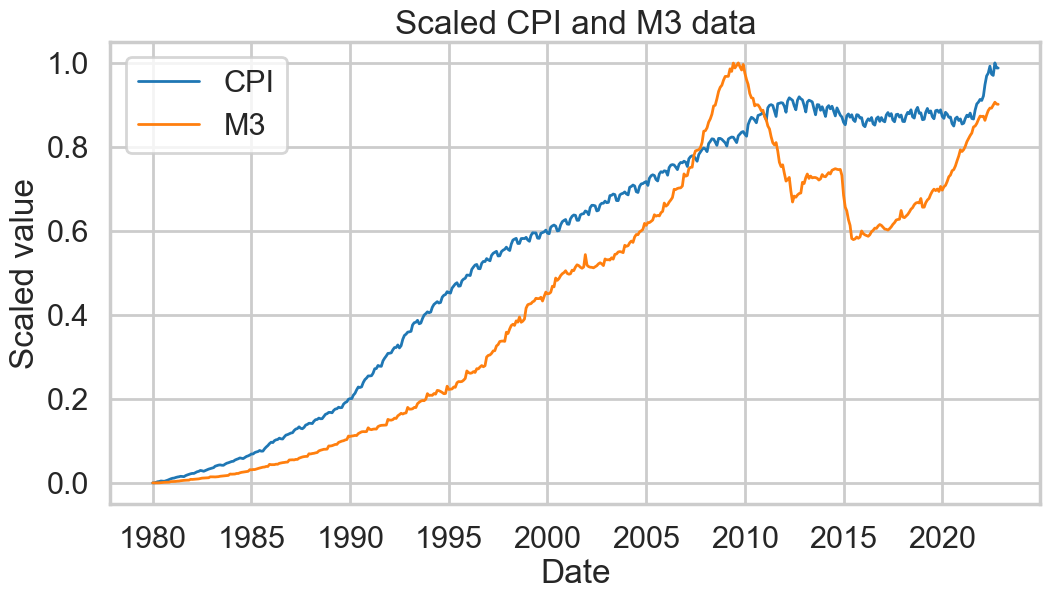

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale CPI and M3 data
scaler = MinMaxScaler()
scaled_CPI = scaler.fit_transform(merged_data[['CPI_index']])
scaled_M3 = scaler.fit_transform(merged_data[['M3']])

# Plot the scaled data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(merged_data.index, scaled_CPI, label='CPI', linewidth = 2)
ax.plot(merged_data.index, scaled_M3, label='M3', linewidth = 2)
ax.set_xlabel('Date')
ax.set_ylabel('Scaled value')
ax.set_title('Scaled CPI and M3 data')
ax.legend()
plt.show()

It is eminent that there is a strong relationship between CPI and M3 as the timing of spikes and descent of both of the lines are extremely similar.

In [ ]:
M3

M3
1980-01-01    3074
1980-02-01    3059
1980-03-01    3108
1980-04-01    3108
1980-05-01    3131
...            ...
2022-07-01  234197
2022-08-01  236000
2022-09-01  237813
2022-10-01  236718
2022-11-01  236528

[515 rows x 1 columns]

In [ ]:
money = M3['M3']

In [ ]:
import numpy as np
from scipy.stats import zscore
from scipy.stats import t

# Calculate z-scores
z_scores = zscore(money)

# Calculate critical value
n = len(money)
alpha = 0.05
t_critical = t.ppf(1 - alpha / (2 * n), n - 2)

# Perform Grubbs' Test
outliers = np.where(np.abs(z_scores) > (n - 1) / np.sqrt(n) * np.sqrt(t_critical ** 2 / (n - 2 + t_critical ** 2)))

# Get outlier indices and values
outlier_indices = outliers[0]
outlier_values = money[outlier_indices]

# Print the detected outliers
print("Detected Outliers:")
for i, outlier_idx in enumerate(outlier_indices):
    print(f"Index: {outlier_idx}, Value: {outlier_values[i]}")

Detected Outliers:


In [ ]:
capital_flows.sort_values(by = 'Date', inplace = True)

In [ ]:
capital_flows['Date'] = pd.to_datetime(capital_flows['Date'])

In [ ]:
capital_flows.set_index('Date', inplace = True)

In [ ]:
capital_flows['Month'] = capital_flows.index.month
capital_flows['Year'] = capital_flows.index.year

In [ ]:
GDP.rename(columns = {'observation_date' : 'date'}, inplace = True)

In [ ]:
GDP.set_index('date', inplace = True)

In [ ]:
# convert to monthly frequency using forward fill method
monthly_GDP = GDP.asfreq('M', method='ffill')

print(monthly_GDP)

                GDP
date               
1995-01-31  22484.1
1995-02-28  22484.1
1995-03-31  22484.1
1995-04-30  22966.2
1995-05-31  22966.2
...             ...
2021-11-30  48021.6
2021-12-31  48021.6
2022-01-31  50579.3
2022-02-28  50579.3
2022-03-31  50579.3

[327 rows x 1 columns]


In [ ]:
monthly_GDP['Date'] = monthly_GDP.index
monthly_GDP['Month'] = monthly_GDP.index.month
monthly_GDP['Year'] = monthly_GDP.index.year

In [ ]:
monthly_GDP

GDP       Date  Month  Year
date                                       
1995-01-31  22484.1 1995-01-31      1  1995
1995-02-28  22484.1 1995-02-28      2  1995
1995-03-31  22484.1 1995-03-31      3  1995
1995-04-30  22966.2 1995-04-30      4  1995
1995-05-31  22966.2 1995-05-31      5  1995
...             ...        ...    ...   ...
2021-11-30  48021.6 2021-11-30     11  2021
2021-12-31  48021.6 2021-12-31     12  2021
2022-01-31  50579.3 2022-01-31      1  2022
2022-02-28  50579.3 2022-02-28      2  2022
2022-03-31  50579.3 2022-03-31      3  2022

[327 rows x 4 columns]

In [ ]:
merged_data = pd.merge(CPI, monthly_GDP, on=['Month', 'Year'], how = 'inner')

In [ ]:
merged_data

CPI_index     Date_x  Month  Year      GDP     Date_y
0     54.456726 1995-01-01      1  1995  22484.1 1995-01-31
1     54.328045 1995-02-01      2  1995  22484.1 1995-02-28
2     55.614195 1995-03-01      3  1995  22484.1 1995-03-31
3     56.202739 1995-04-01      4  1995  22966.2 1995-04-30
4     56.732242 1995-05-01      5  1995  22966.2 1995-05-31
..          ...        ...    ...   ...      ...        ...
322  104.244412 2021-11-01     11  2021  48021.6 2021-11-30
323  104.951198 2021-12-01     12  2021  48021.6 2021-12-31
324  104.676525 2022-01-01      1  2022  50579.3 2022-01-31
325  105.844748 2022-02-01      2  2022  50579.3 2022-02-28
326  108.752901 2022-03-01      3  2022  50579.3 2022-03-31

[327 rows x 6 columns]

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Year'].astype(str) + '-' + merged_data['Month'].astype(str), format='%Y-%m-%d')

In [ ]:
merged_data.set_index('Date', inplace = True)

In [ ]:
merged_data.index.dtype

dtype('<M8[ns]')

In [ ]:
merged_data

CPI_index     Date_x  Month  Year      GDP     Date_y
Date                                                              
1995-01-01   54.456726 1995-01-01      1  1995  22484.1 1995-01-31
1995-02-01   54.328045 1995-02-01      2  1995  22484.1 1995-02-28
1995-03-01   55.614195 1995-03-01      3  1995  22484.1 1995-03-31
1995-04-01   56.202739 1995-04-01      4  1995  22966.2 1995-04-30
1995-05-01   56.732242 1995-05-01      5  1995  22966.2 1995-05-31
...                ...        ...    ...   ...      ...        ...
2021-11-01  104.244412 2021-11-01     11  2021  48021.6 2021-11-30
2021-12-01  104.951198 2021-12-01     12  2021  48021.6 2021-12-31
2022-01-01  104.676525 2022-01-01      1  2022  50579.3 2022-01-31
2022-02-01  105.844748 2022-02-01      2  2022  50579.3 2022-02-28
2022-03-01  108.752901 2022-03-01      3  2022  50579.3 2022-03-31

[327 rows x 6 columns]

In [ ]:
merged_data.corr()

CPI_index     Month      Year       GDP
CPI_index   1.000000  0.031742  0.930146  0.705129
Month       0.031742  1.000000 -0.021016  0.017811
Year        0.930146 -0.021016  1.000000  0.511000
GDP         0.705129  0.017811  0.511000  1.000000

In [ ]:
monthly_GDP.describe()

GDP       Month         Year
count    327.000000  327.000000   327.000000
mean   43977.635780    6.458716  2008.128440
std     9637.051558    3.469054     7.879189
min    22484.100000    1.000000  1995.000000
25%    38558.300000    3.000000  2001.000000
50%    44586.900000    6.000000  2008.000000
75%    49377.300000    9.000000  2015.000000
max    60731.400000   12.000000  2022.000000

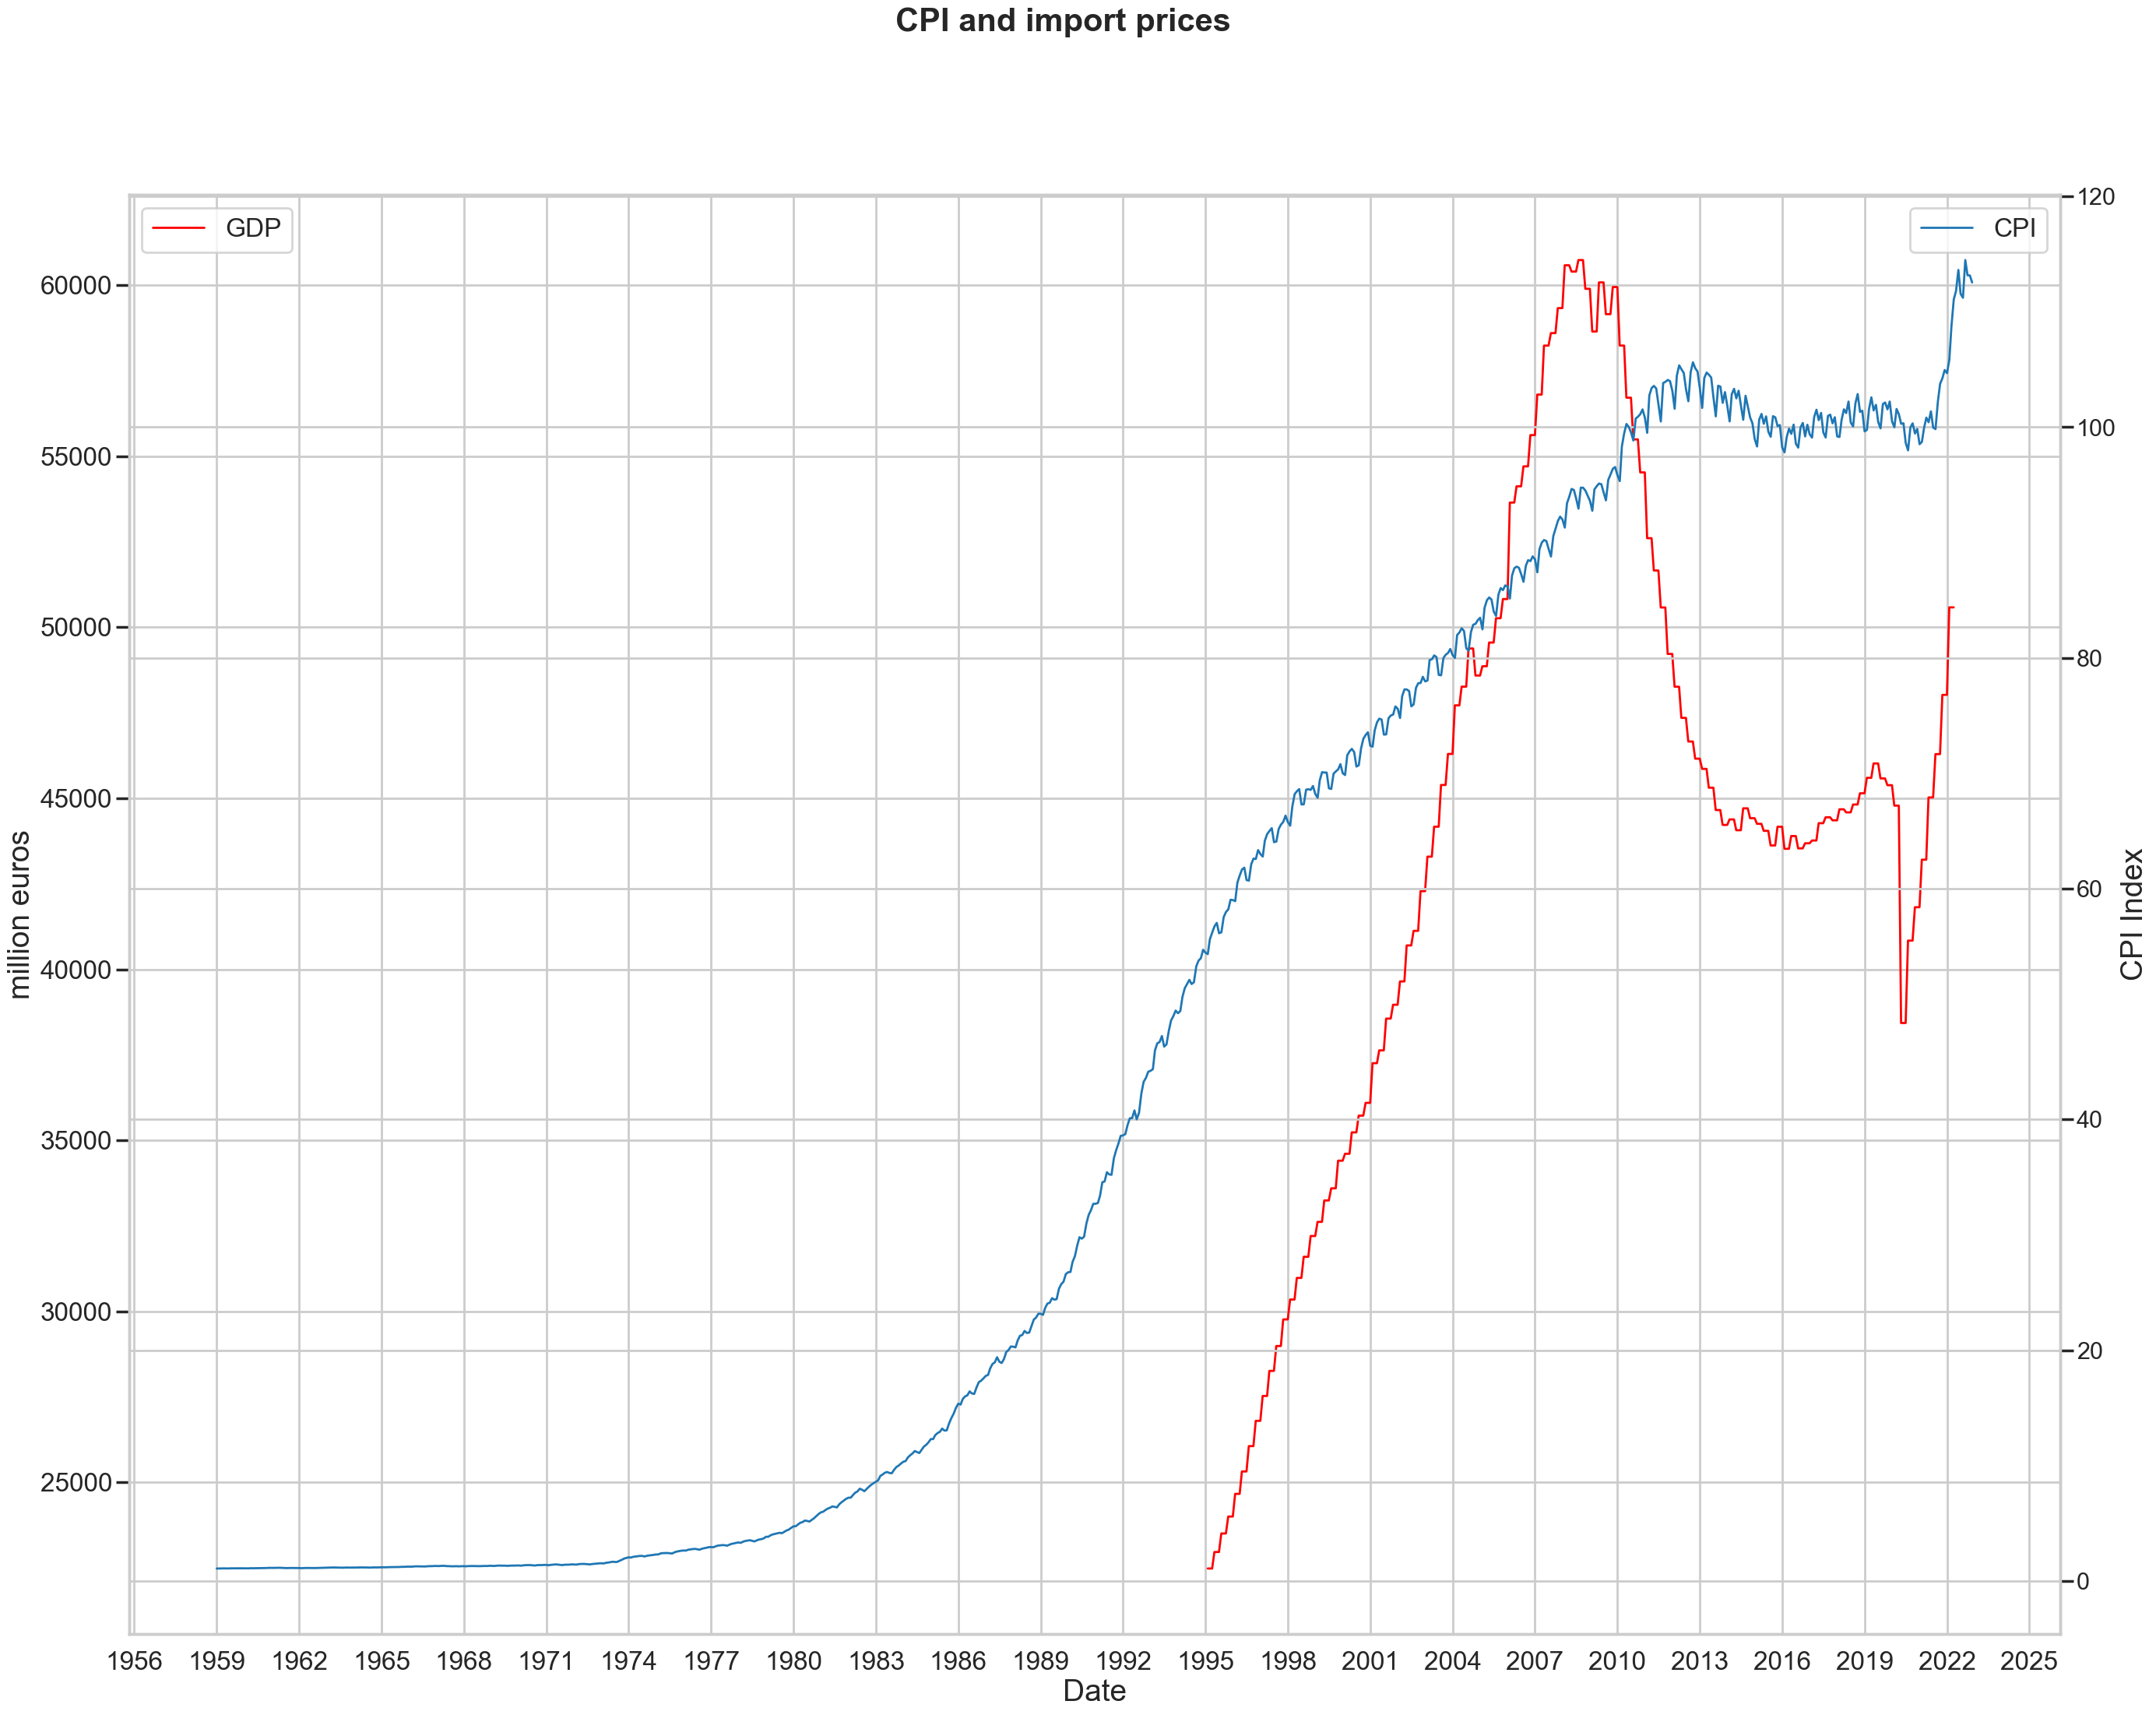

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot import prices
ax1.plot(monthly_GDP['GDP'], linewidth=2, label = 'GDP', color = 'r')

# plot CPI
ax2.plot(CPI['CPI_index'], linewidth=2, label = 'CPI')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('million euros', fontsize=28)
ax2.set_ylabel('CPI Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)

# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# Add separate legends for each plot
ax1.legend(loc='upper left', fontsize='24')
ax2.legend(loc='upper right', fontsize='24')

# Add a main title for the figure
fig.suptitle('CPI and import prices', fontsize=30, fontweight='bold')

plt.show()

extremely similar to industrial production.

# Industry

In [ ]:
PPI.sort_values(by = 'Date', inplace = True)

In [ ]:
PPI['Date'] = pd.to_datetime(PPI['Date'])

In [ ]:
PPI.set_index('Date', inplace = True)

somewhat linked but insufficient data. Highly seasonal variable.

In [ ]:
business_confidence

Date  Value
0    2023-01-31  104.9
1    2022-12-31  103.5
2    2022-11-30  101.4
3    2022-10-31   98.9
4    2022-09-30  105.6
..          ...    ...
452  1985-05-31  107.2
453  1985-04-30  106.3
454  1985-03-31  106.1
455  1985-02-28  106.7
456  1985-01-31  108.4

[457 rows x 2 columns]

In [ ]:
business_confidence.sort_values(by = 'Date', inplace = True)

In [ ]:
business_confidence['Date'] = pd.to_datetime(business_confidence['Date'])

In [ ]:
business_confidence.set_index('Date', inplace = True)

In [ ]:
business_confidence.rename(columns = {'Value':'business_confidence'}, inplace = True)

In [ ]:
business_confidence.describe()

business_confidence
count           457.000000
mean            102.484464
std               8.539755
min              79.000000
25%              99.100000
50%             104.300000
75%             108.500000
max             119.900000

In [ ]:
Capacity_utilization.sort_values(by = 'Date', inplace = True)

In [ ]:
Capacity_utilization['Date'] = pd.to_datetime(Capacity_utilization['Date'])

In [ ]:
Capacity_utilization.set_index('Date', inplace = True)

In [ ]:
Capacity_utilization.rename(columns = {'Value':'capacity_utilization'}, inplace = True)

In [ ]:
Capacity_utilization

capacity_utilization
Date                            
1981-01-31                  83.8
1981-02-28                  82.1
1981-03-31                  82.0
1981-04-30                  79.8
1981-05-31                  79.4
...                          ...
2022-08-31                  75.9
2022-09-30                  70.7
2022-10-31                  75.8
2022-11-30                  75.6
2022-12-31                  76.6

[504 rows x 1 columns]

In [ ]:
Capacity_utilization.describe()

capacity_utilization
count            504.000000
mean              73.852183
std                4.174822
min               61.300000
25%               71.075000
50%               75.000000
75%               77.000000
max               83.800000

In [ ]:
industrial_production.sort_values(by = 'Date', inplace = True)

In [ ]:
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'])

In [ ]:
industrial_production.set_index('Date', inplace = True)

In [ ]:
industrial_production.rename(columns = {'Value':'industrial_production'}, inplace = True)

In [ ]:
industrial_production

industrial_production
Date                             
2000-01-31                    5.0
2000-02-29                    8.2
2000-03-31                   11.9
2000-04-30                    8.9
2000-05-31                    5.6
...                           ...
2022-07-31                    6.8
2022-08-31                    4.6
2022-09-30                   -1.3
2022-10-31                   -2.7
2022-11-30                   -0.9

[275 rows x 1 columns]

In [ ]:
manufacturing_production.sort_values(by = 'Date', inplace = True)

In [ ]:
manufacturing_production['Date'] = pd.to_datetime(manufacturing_production['Date'])

In [ ]:
manufacturing_production.set_index('Date', inplace = True)

In [ ]:
manufacturing_production.rename(columns = {'Value':'manufacturing_production'}, inplace = True)

In [ ]:
manufacturing_production

manufacturing_production
Date                                
1996-01-31                      -0.5
1996-02-29                       1.0
1996-03-31                      -2.5
1996-04-30                       0.3
1996-05-31                       2.7
...                              ...
2022-07-31                       6.2
2022-08-31                       5.1
2022-09-30                       1.5
2022-10-31                       2.0
2022-11-30                       2.6

[323 rows x 1 columns]

Text(0, 0.5, 'Capacity Utilization (%)')

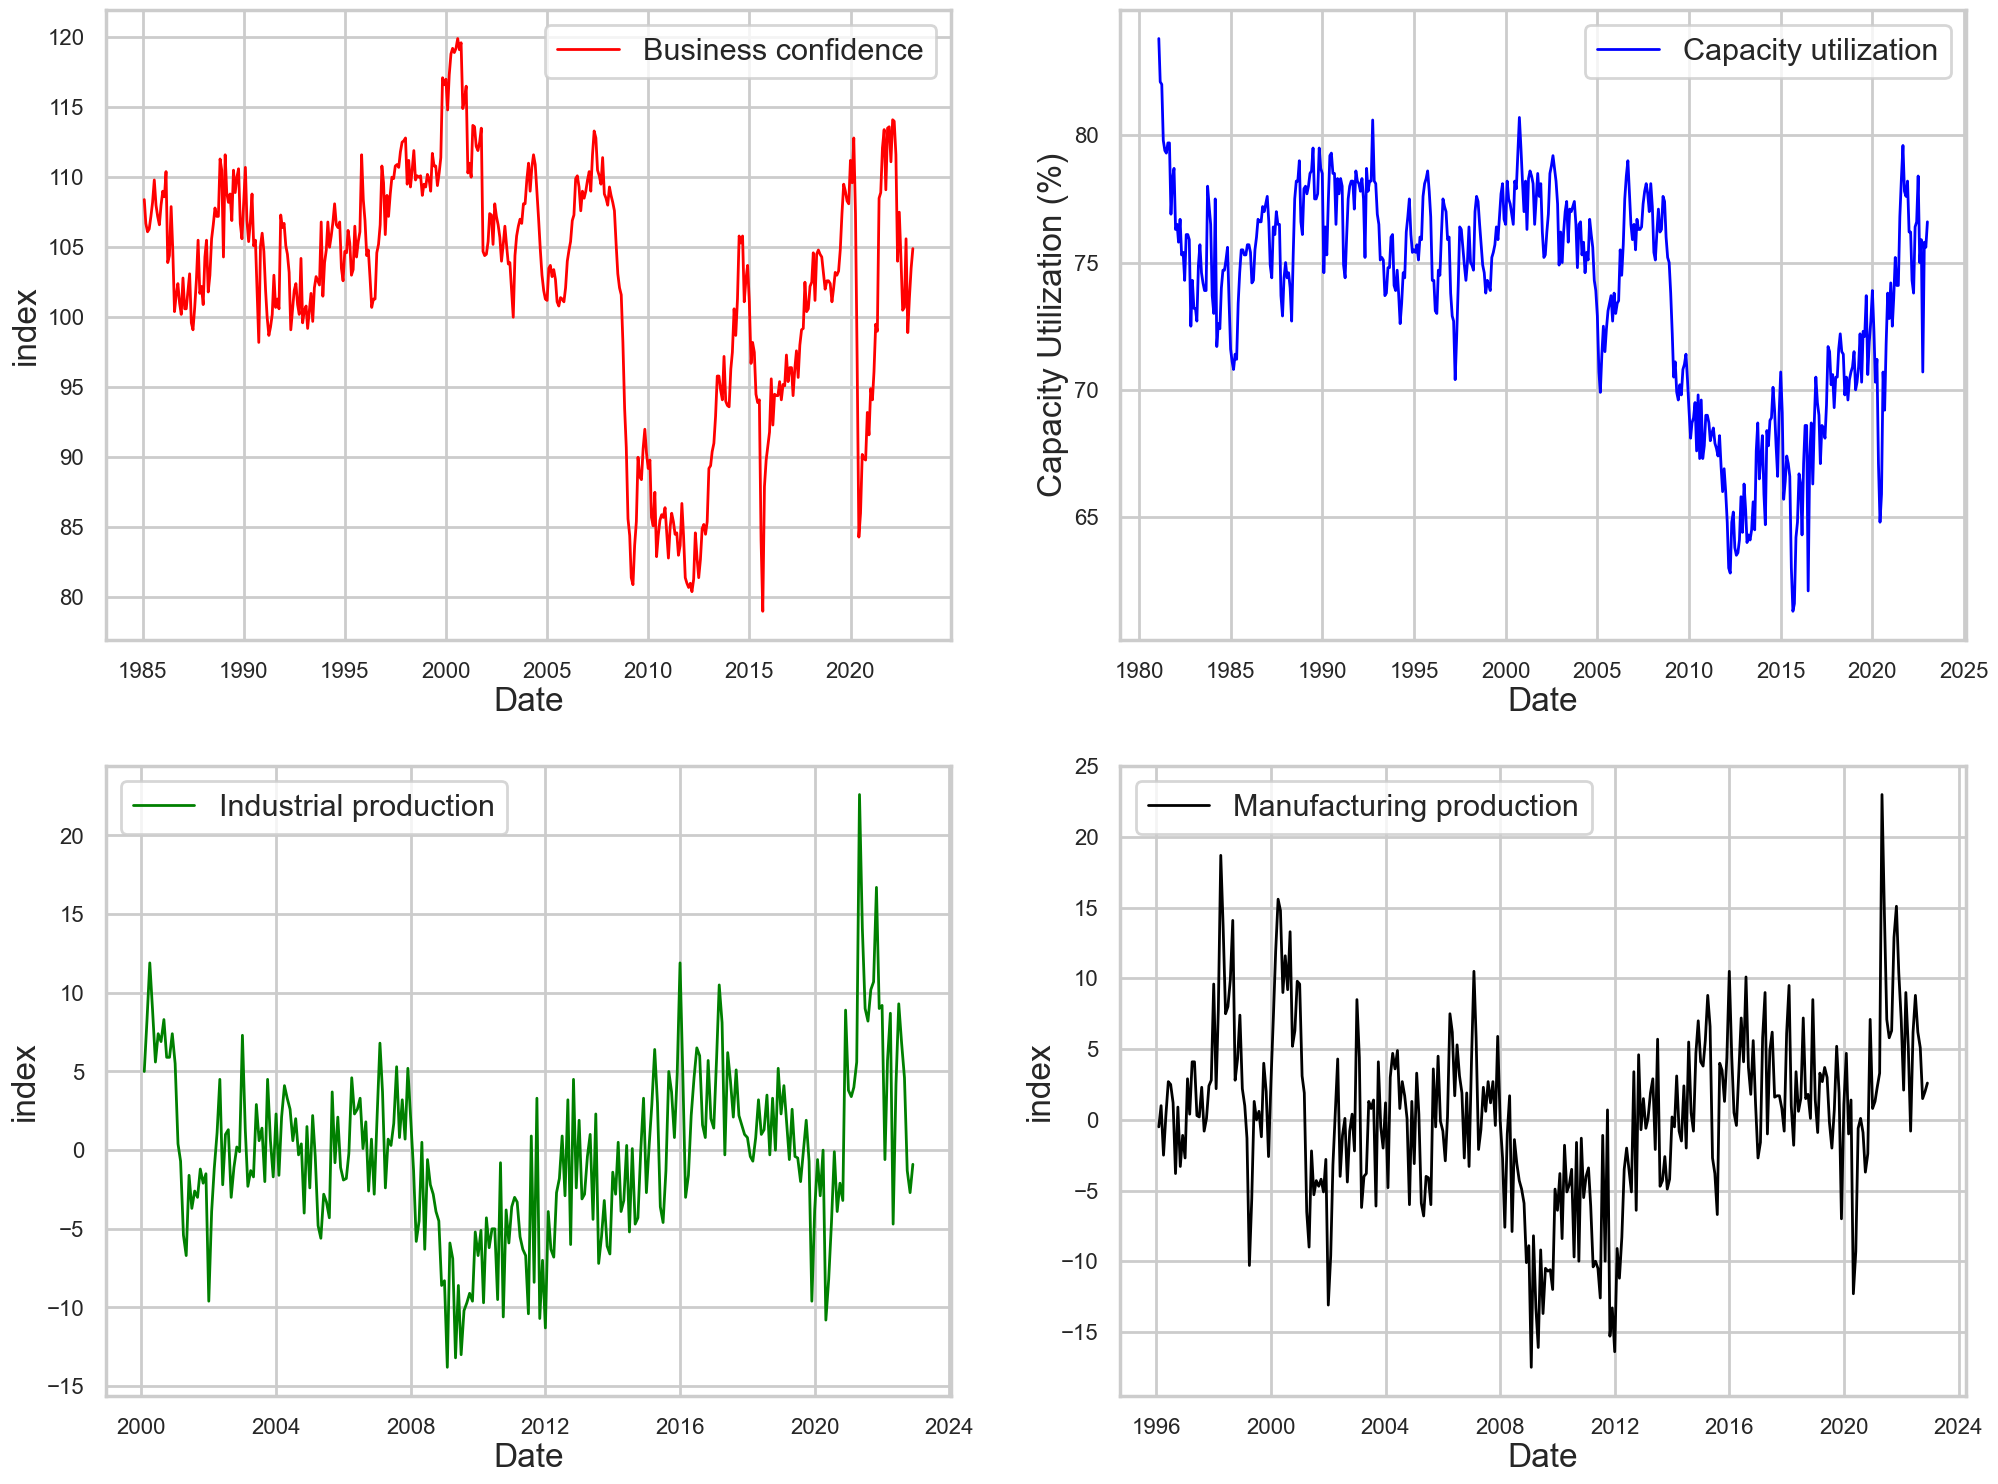

In [ ]:
import random
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 18))

ax[0,0].plot(business_confidence, linewidth = 2, label = 'Business confidence', color = 'r')
ax[0,1].plot(Capacity_utilization, linewidth = 2, label = 'Capacity utilization', color = 'b')
ax[1,0].plot(industrial_production, linewidth = 2, label = 'Industrial production', color = 'g')
ax[1,1].plot(manufacturing_production, linewidth = 2, label = 'Manufacturing production', color = 'black')

for i,a in enumerate(ax.flatten()):
    a.tick_params(axis='both', labelsize = 16)
    a.legend()
    a.set_xlabel('Date')
    a.set_ylabel('index')

ax[0,1].set_ylabel('Capacity Utilization (%)')

Text(0.5, 0.98, 'CPI and business confidence')

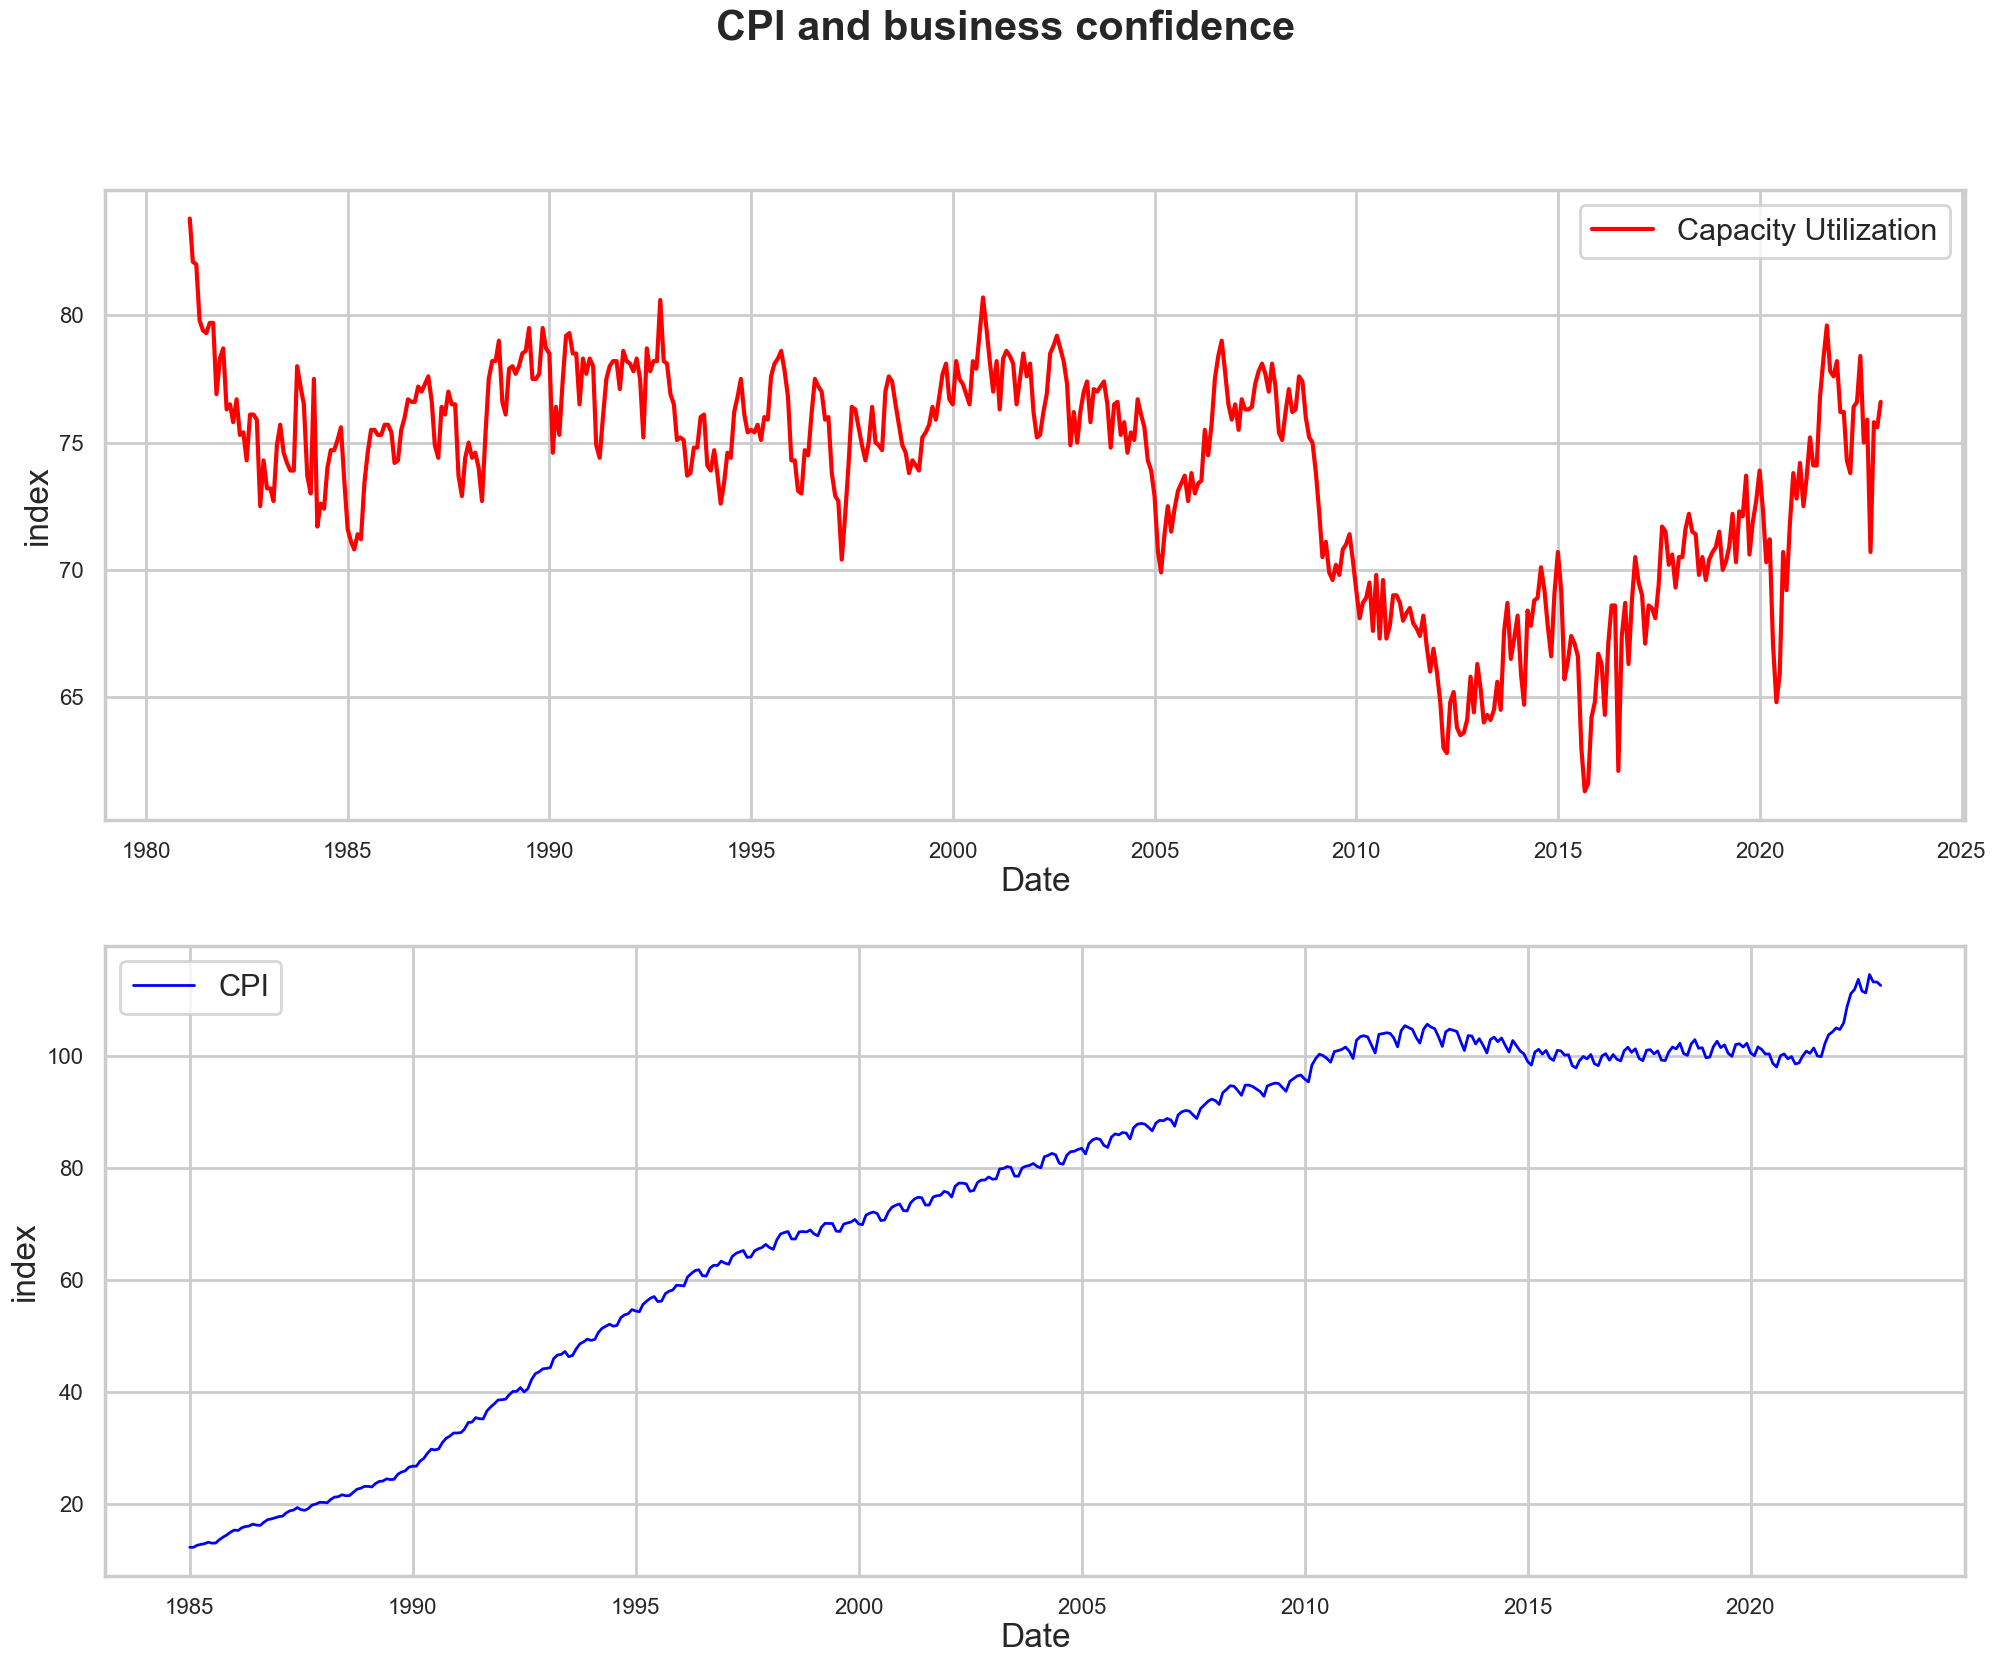

In [ ]:
import random
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24, 18))

CPI_short = CPI[CPI['Year'] > 1984]

ax[0].plot(Capacity_utilization, label = 'Capacity Utilization', color = 'r')
ax[1].plot(CPI_short['CPI_index'], linewidth = 2, label = 'CPI', color = 'b')


for i,a in enumerate(ax.flatten()):
    a.tick_params(axis='both', labelsize = 16)
    a.legend()
    a.set_xlabel('Date')
    a.set_ylabel('index')
fig.suptitle('CPI and business confidence', fontsize=30, fontweight='bold')


In [ ]:
CPI

CPI_index       Date  Month  Year
Date                                          
1959-01-01    1.083857 1959-01-01      1  1959
1959-02-01    1.083857 1959-02-01      2  1959
1959-03-01    1.088166 1959-03-01      3  1959
1959-04-01    1.096785 1959-04-01      4  1959
1959-05-01    1.094630 1959-05-01      5  1959
...                ...        ...    ...   ...
2022-08-01  111.211375 2022-08-01      8  2022
2022-09-01  114.478049 2022-09-01      9  2022
2022-10-01  113.157924 2022-10-01     10  2022
2022-11-01  113.146170 2022-11-01     11  2022
2022-12-01  112.532917 2022-12-01     12  2022

[768 rows x 4 columns]

In [ ]:
corr = pd.merge(business_confidence, Capacity_utilization, left_index = True, right_index = True)

In [ ]:
corr = pd.merge(corr, manufacturing_production, left_index = True, right_index = True)

In [ ]:
industry = pd.merge(corr, industrial_production, left_index = True, right_index = True)

In [ ]:
industry.corr()

business_confidence  capacity_utilization  \
business_confidence                  1.000000              0.784779   
capacity_utilization                 0.784779              1.000000   
manufacturing_production             0.514728              0.237004   
industrial_production                0.466638              0.282037   

                          manufacturing_production  industrial_production  
business_confidence                       0.514728               0.466638  
capacity_utilization                      0.237004               0.282037  
manufacturing_production                  1.000000               0.914440  
industrial_production                     0.914440               1.000000

In [ ]:
PPI.isnull().sum()

Value    0
dtype: int64

In [ ]:
CPI_short

CPI_index       Date  Month  Year
Date                                          
1985-01-01   12.302071 1985-01-01      1  1985
1985-02-01   12.302071 1985-02-01      2  1985
1985-03-01   12.647999 1985-03-01      3  1985
1985-04-01   12.820963 1985-04-01      4  1985
1985-05-01   12.929066 1985-05-01      5  1985
...                ...        ...    ...   ...
2022-08-01  111.211375 2022-08-01      8  2022
2022-09-01  114.478049 2022-09-01      9  2022
2022-10-01  113.157924 2022-10-01     10  2022
2022-11-01  113.146170 2022-11-01     11  2022
2022-12-01  112.532917 2022-12-01     12  2022

[456 rows x 4 columns]

In [ ]:
PPI.describe()

Value
count  228.000000
mean   100.237281
std     15.099443
min     74.200000
25%     92.375000
50%     99.750000
75%    106.000000
max    159.300000

In [ ]:
PPI

Value
Date             
2004-01-31   74.2
2004-02-29   74.3
2004-03-31   75.1
2004-04-30   76.0
2004-05-31   76.7
...           ...
2022-08-31  150.9
2022-09-30  147.4
2022-10-31  159.3
2022-11-30  150.1
2022-12-31  146.4

[228 rows x 1 columns]

In [ ]:
PPI['Month'] = PPI.index.month

In [ ]:
PPI['Year'] = PPI.index.year

In [ ]:
merged_data = pd.merge(PPI, CPI, on = ['Month', 'Year'], how = 'inner')

In [ ]:
merged_data['Date'] = PPI.index

In [ ]:
merged_data.set_index('Date', inplace = True)

In [ ]:
PPI.columns

Index(['Value', 'Month', 'Year'], dtype='object')

In [ ]:
PPI.describe()

Value       Month         Year
count  228.000000  228.000000   228.000000
mean   100.237281    6.500000  2013.000000
std     15.099443    3.459648     5.489277
min     74.200000    1.000000  2004.000000
25%     92.375000    3.750000  2008.000000
50%     99.750000    6.500000  2013.000000
75%    106.000000    9.250000  2018.000000
max    159.300000   12.000000  2022.000000

In [ ]:
merged_data.corr()

Value         Month          Year  CPI_index
Value      1.000000  6.208785e-02  6.941413e-01   0.868669
Month      0.062088  1.000000e+00  5.951752e-15   0.097396
Year       0.694141  5.951752e-15  1.000000e+00   0.798303
CPI_index  0.868669  9.739650e-02  7.983033e-01   1.000000

In [ ]:
merged_data.rename(columns = {'Value':'PPI'}, inplace = True)

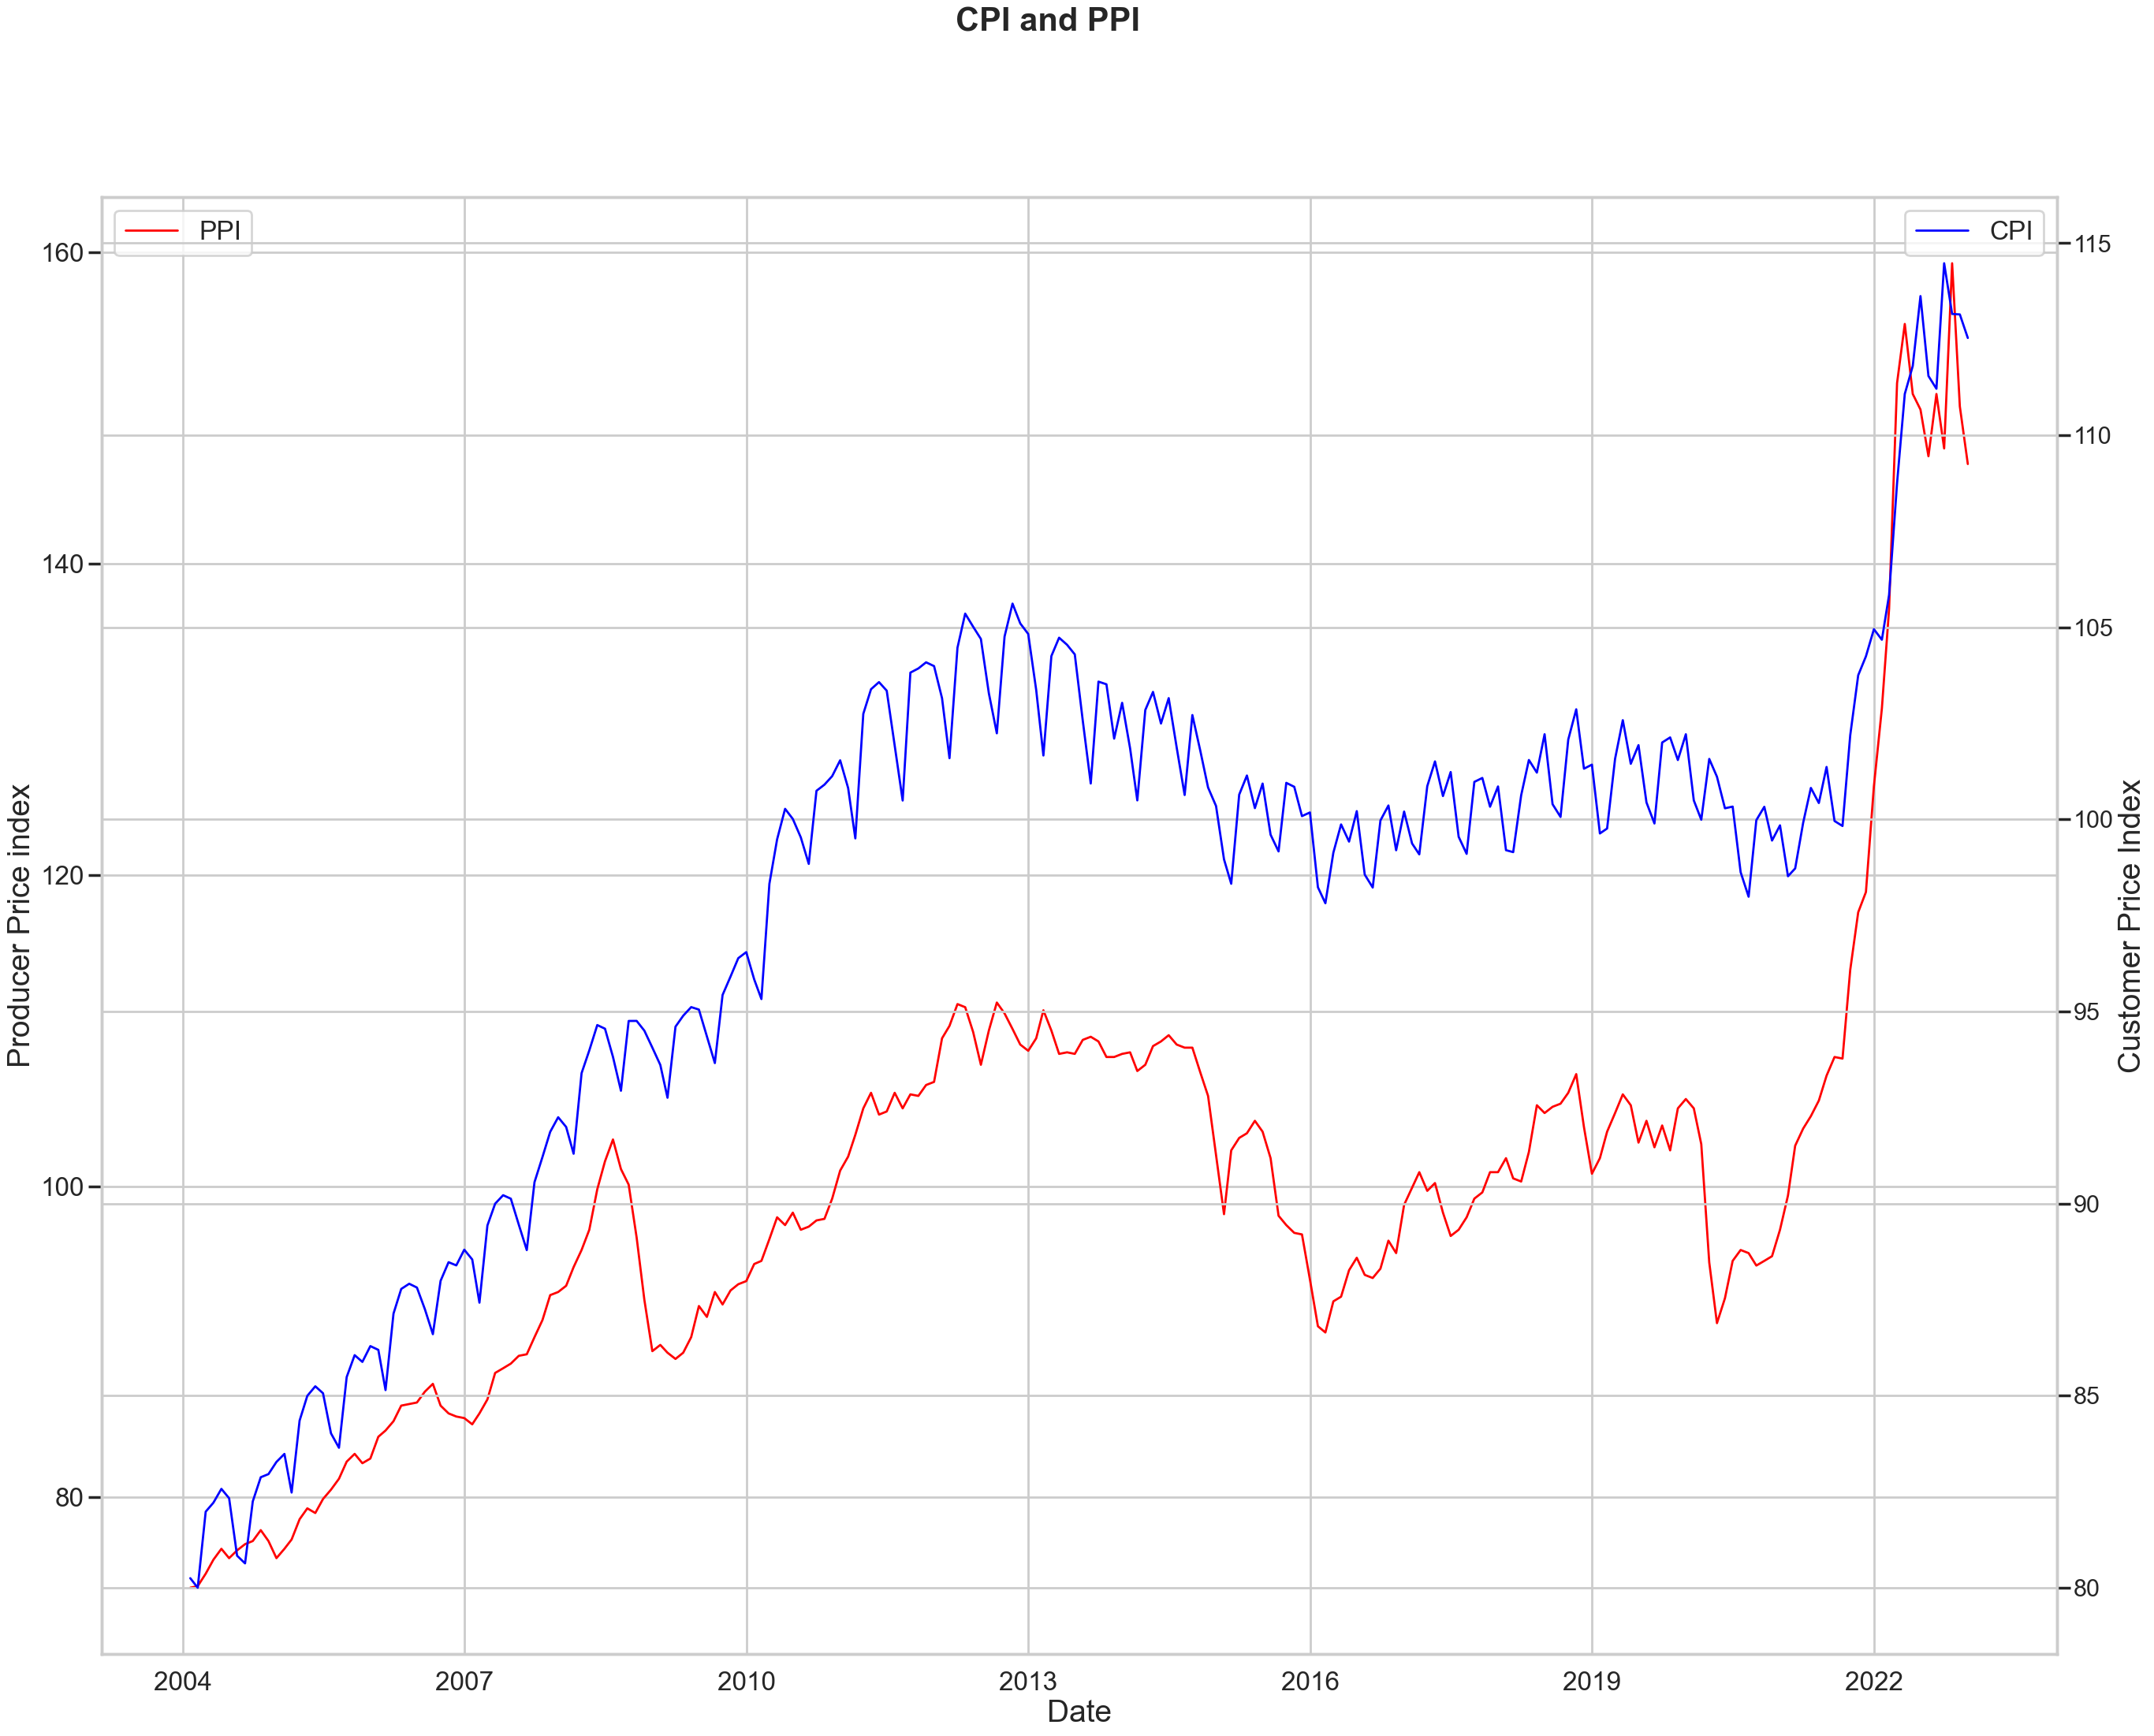

In [ ]:
fig, ax1 = plt.subplots(figsize=(32,24))
ax2 = ax1.twinx()

# plot import prices
ax1.plot(merged_data['PPI'], linewidth=2, label = 'PPI', color = 'r')

# plot CPI
ax2.plot(merged_data['CPI_index'], linewidth=2, label = 'CPI', color = 'b')

# set axis labels and legend
ax1.set_xlabel('Date', fontsize=28)
ax1.set_ylabel('Producer Price index', fontsize=28)
ax2.set_ylabel('Customer Price Index', fontsize=28)
ax1.tick_params(axis='both', labelsize=24)

# set the tick marks every 3 years
years = mdates.YearLocator(base=3)
ax1.xaxis.set_major_locator(years)
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# Add separate legends for each plot
ax1.legend(loc='upper left', fontsize='24')
ax2.legend(loc='upper right', fontsize='24')

# Add a main title for the figure
fig.suptitle('CPI and PPI', fontsize=30, fontweight='bold')

plt.show()

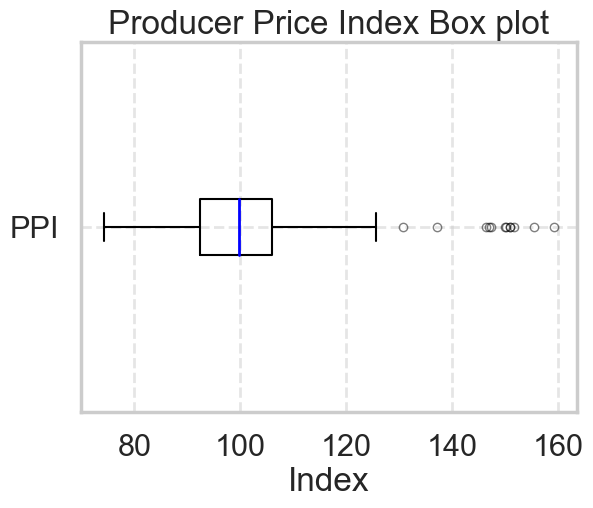

In [ ]:

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
box = ax.boxplot(PPI['Value'], vert=False)

# Customize the box plot appearance
ax.set_title("Producer Price Index Box plot")
ax.set_xlabel("Index")
ax.set_yticklabels(["PPI"])
ax.grid(True, linestyle="--", alpha=0.5)

# Set the style of the outliers
outliers = box["fliers"]
for outlier in outliers:
    outlier.set(marker="o", color="red", alpha=0.5)

# Set the style of the whiskers and caps
whiskers = box["whiskers"]
caps = box["caps"]
for whisker, cap in zip(whiskers, caps):
    whisker.set(color="black", linewidth=1.5)
    cap.set(color="black", linewidth=1.5)

# Set the style of the medians and boxes
medians = box["medians"]
boxes = box["boxes"]
for median in medians:
    median.set(color="blue", linewidth=2)
for box_ in boxes:
    box_.set(color="black", linewidth=1.5)

# Display the box plot
plt.show()

In [ ]:
retail_turnover

Year-Month  Overall Index  Overall index except automotive fuel  \
0   2000-01-01      79.336074                             84.250048   
1   2000-02-01      76.266418                             79.878460   
2   2000-03-01      77.724904                             80.595807   
3   2000-04-01      93.362295                             98.475063   
4   2000-05-01      82.239819                             85.866700   
..         ...            ...                                   ...   
272 2022-09-01     129.100000                            130.800000   
273 2022-10-01     130.800000                            130.000000   
274 2022-11-01     128.700000                            128.000000   
275 2022-12-01     137.600000                            143.000000   
276 2023-01-01     116.400000                            117.300000   

     Food sector  Overall index except food sector and automotive  \
0      66.434171                                       108.088716   
1      63.692291                                       101.365839   
2      66.091559                                        99.390080   
3      78.862795                                       124.424482   
4      66.311597                                       112.369883   
..           ...                                              ...   
272   128.300000                                       136.900000   
273   124.400000                                       139.100000   
274   114.100000                                       145.400000   
275   131.700000                                       158.200000   
276   112.400000                                       125.200000   

     SUPER MARKETS  Department stores  Automotive fuel  \
0        60.733016          76.448303        62.144693   
1        58.587247          77.812881        66.286483   
2        61.596618          73.565962        72.323541   
3        72.636215          91.679089        77.077038   
4        60.980191          85.607478        73.056553   
..             ...                ...              ...   
272     131.600000          88.700000       121.000000   
273     128.200000          94.800000       133.000000   
274     118.800000          94.200000       130.800000   
275     133.300000         103.400000       113.800000   
276     116.600000          87.700000       112.100000   

     Food, Beveraged, Tobacco  Pharmaceutical and Cosmetics  \
0                  100.298865                     89.072554   
1                   94.442182                     89.696578   
2                   94.180374                     92.547428   
3                  116.486838                     97.374999   
4                   98.404530                     94.524149   
..                        ...                           ...   
272                108.500000                    158.200000   
273                102.900000                    153.300000   
274                 88.400000                    150.800000   
275                120.400000                    161.700000   
276                 89.500000                    149.700000   

     Clothing and footwear  \
0               119.559752   
1               102.557767   
2                86.547403   
3               132.310752   
4               108.160621   
..                     ...   
272             104.700000   
273             130.200000   
274             129.400000   
275             152.600000   
276             111.400000   

     Furniture, electical equipment and household equipment  other goods  \
0                                           136.499020         75.978389   
1                                           133.759030         69.521518   
2                                           134.182337         78.849646   
3                                           163.946778         88.985734   
4                                           153.977191         83.052619   
..                                                 

In [ ]:
retail_turnover.drop(columns=retail_turnover.columns[-3:], inplace=True)


In [ ]:
retail_turnover.corr()

Overall Index  \
Overall Index                                            1.000000   
Overall index except automotive fuel                     0.985272   
Food sector                                              0.859346   
Overall index except food sector and automotive          0.869728   
SUPER MARKETS                                            0.780450   
Department stores                                        0.800213   
Automotive fuel                                          0.778282   
Food, Beveraged, Tobacco                                 0.826735   
Pharmaceutical and Cosmetics                             0.860793   
Clothing and footwear                                    0.752928   
Furniture, electical equipment and household eq...       0.761971   
other goods                                              0.730269   
Retail sale not in store                                 0.563962   

                                                    Overall index except automotive fuel  \
Overall Index                                                                   0.985272   
Overall index except automotive fuel                                            1.000000   
Food sector                                                                     0.823575   
Overall index except food sector and automotive                                 0.918712   
SUPER MARKETS                                                                   0.735402   
Department stores                                                               0.790817   
Automotive fuel                                                                 0.671621   
Food, Beveraged, Tobacco                                                        0.855823   
Pharmaceutical and Cosmetics                                                    0.879191   
Clothing and footwear                                                           0.806846   
Furniture, electical equipment and household eq...                              0.813296   
other goods                                                                     0.760366   
Retail sale not in store                                                        0.647466   

                                                    Food sector  \
Overall Index                                          0.859346   
Overall index except automotive fuel                   0.823575   
Food sector                                            1.000000   
Overall index except food sector and automotive        0.534412   
SUPER MARKETS                                          0.986173   
Department stores                                      0.587736   
Automotive fuel                                        0.685982   
Food, Beveraged, Tobacco                               0.575397   
Pharmaceutical and Cosmetics                           0.749572   
Clothing and footwear                                  0.414212   
Furniture, electical equipment and household eq...     0.374300   
other goods                                            0.621827   
Retail sale not in store                               0.345544   

                                                    Overall index except food sector and automotive  \
Overall Index                                                                              0.869728   
Overall index except automotive fuel                                                       0.918712   
Food sector                                                                                0.534412   
Overall index except food sector and automotive                                            1.000000   
SUPER MARKETS                                                                              0.413324   
Department stores                                                                          0.761363   
Automotive fuel                                                                            0.514712   
Food, Beveraged, Tobacco         

In [ ]:
retail_turnover.drop(columns = retail_turnover.columns[2:], inplace = True)

In [ ]:
retail_turnover['Year-Month'].dtype

dtype('<M8[ns]')

In [ ]:
retail_turnover.rename(columns = {'Year-Month':'Date'}, inplace = True)

In [ ]:
retail_turnover.set_index('Date', inplace = True)

In [ ]:
fig, ax =

SyntaxError: invalid syntax (<ipython-input-216-edd384139c62>, line 1)

# National Economy

In [ ]:
interest_rates['Date'] = pd.to_datetime(interest_rates['Date'])

In [ ]:
interest_rates.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

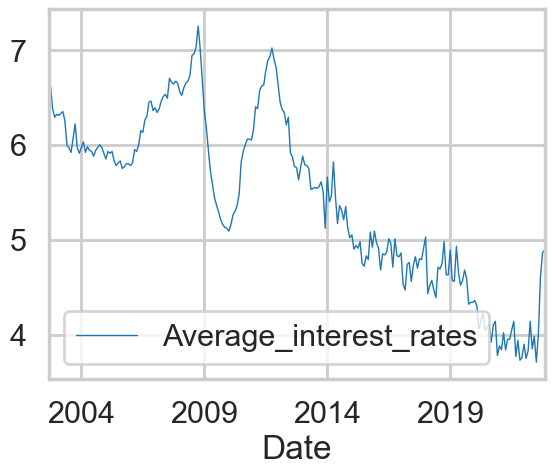

In [ ]:
interest_rates.plot(linewidth = 1)

In [ ]:
interest_rates

Average_interest_rates
Date                              
2002-09-01                    6.66
2002-10-01                    6.61
2002-11-01                    6.38
2002-12-01                    6.29
2003-01-01                    6.32
...                            ...
2022-07-01                    3.71
2022-08-01                    4.00
2022-09-01                    4.60
2022-10-01                    4.86
2022-11-01                    4.89

[243 rows x 1 columns]

An overall decreasing trend with a spike after 2022. That perhaps occur because after 2009 CPI is stabilized. The relationship is inverse.

In [ ]:
loans['Date'] = pd.to_datetime(loans['Date'])

In [ ]:
loans.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

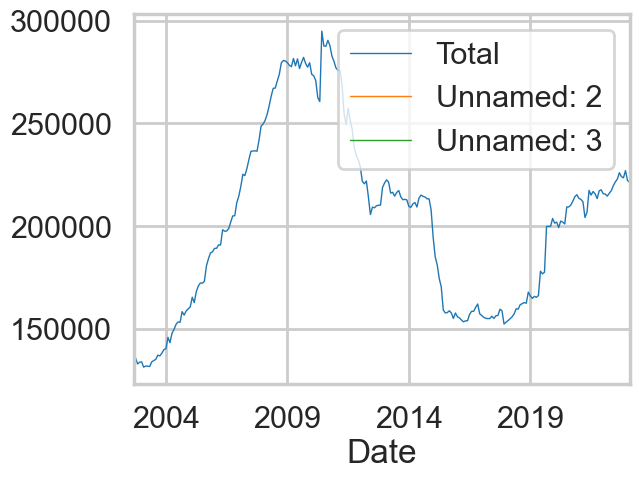

In [ ]:
loans.plot(linewidth = 1)

In [ ]:
interest_rates.columns

Index(['Average_interest_rates'], dtype='object')

Now although borrowing has become cheaper, the total number of loans seem to have been decreasing after 2008. That is perhaps due to the Greek financial crisis. No eminent relationship between loans & interest rates and CPI.

In [ ]:
loans['Total'].corr(interest_rates['Average_interest_rates'])

0.2483093516583952

In [ ]:
deposits['Date'] = pd.to_datetime(deposits['Date'])

In [ ]:
deposits.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

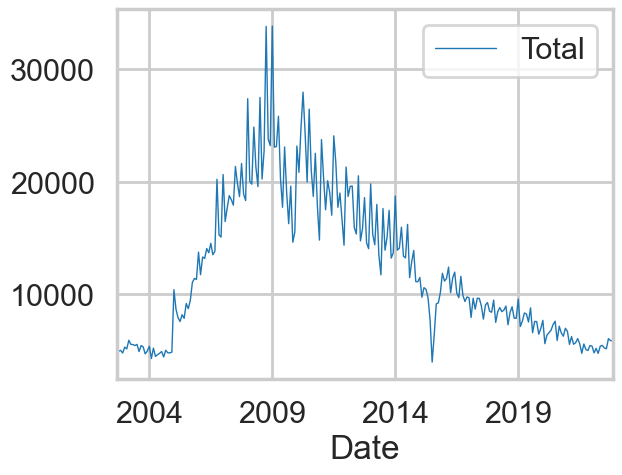

In [ ]:
deposits.plot(linewidth = 1)

Indeed, the deposits were increasing until around 2008 and then kept on decreasing. The pattern is similar to loans.

In [ ]:
unemployment['Date'] = pd.to_datetime(unemployment['Date'])

In [ ]:
unemployment.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

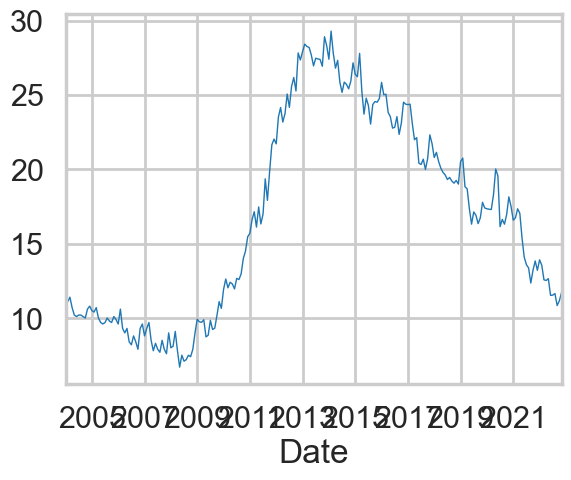

In [ ]:
unemployment['Unemployment rate'].plot(linewidth = 1)

In [ ]:
wages['Date'] = pd.to_datetime(wages['Date'])

In [ ]:
wages.set_index('Date', inplace = True)

In [ ]:
wages

Index  Ι  Unnamed: 2  Unnamed: 3
Date                                        
2000-03-01      76.6         NaN         NaN
2000-06-01      87.1         NaN         NaN
2000-09-01      93.0         NaN         NaN
2000-12-01     103.5         NaN         NaN
2001-03-01      82.1         NaN         NaN
...              ...         ...         ...
2021-12-01     118.8         NaN         NaN
2022-03-01     100.5         NaN         NaN
2022-06-01     112.3         NaN         NaN
2022-09-01     121.3         NaN         NaN
2022-12-01     124.1         NaN         NaN

[92 rows x 3 columns]

In [ ]:
wages.dropna(axis = 1, inplace = True)

<AxesSubplot:xlabel='Date'>

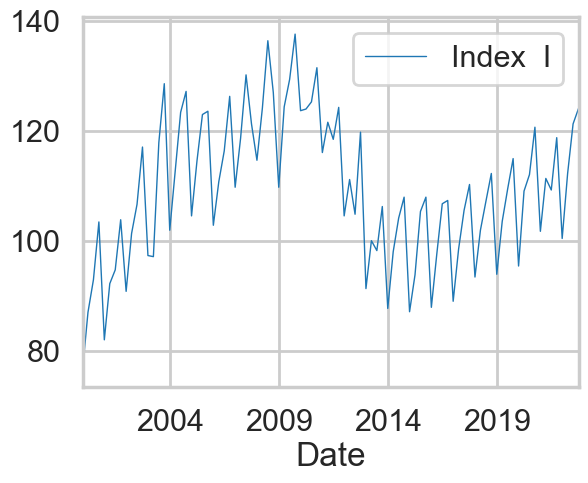

In [ ]:
wages.plot(linewidth = 1)

In [ ]:
interest_rates['Date'].dtype

KeyError: 'Date'

In [ ]:
interest_rates.index.dtype

dtype('<M8[ns]')

In [ ]:
interest_rates.set_index('Date', inplace = True)

KeyError: "None of ['Date'] are in the columns"

In [ ]:
interest_rates

Average_interest_rates
Date                              
2002-09-01                    6.66
2002-10-01                    6.61
2002-11-01                    6.38
2002-12-01                    6.29
2003-01-01                    6.32
...                            ...
2022-07-01                    3.71
2022-08-01                    4.00
2022-09-01                    4.60
2022-10-01                    4.86
2022-11-01                    4.89

[243 rows x 1 columns]

In [ ]:
merged_data = pd.merge(CPI, interest_rates, right_index = True, left_index = True)

In [ ]:
merged_data

CPI_index       Date  Month  Year  Average_interest_rates
Date                                                                  
2002-09-01   77.405819 2002-09-01      9  2002                    6.66
2002-10-01   77.807133 2002-10-01     10  2002                    6.61
2002-11-01   77.823862 2002-11-01     11  2002                    6.38
2002-12-01   78.363595 2002-12-01     12  2002                    6.29
2003-01-01   77.963014 2003-01-01      1  2003                    6.32
...                ...        ...    ...   ...                     ...
2022-07-01  111.543407 2022-07-01      7  2022                    3.71
2022-08-01  111.211375 2022-08-01      8  2022                    4.00
2022-09-01  114.478049 2022-09-01      9  2022                    4.60
2022-10-01  113.157924 2022-10-01     10  2022                    4.86
2022-11-01  113.146170 2022-11-01     11  2022                    4.89

[243 rows x 5 columns]

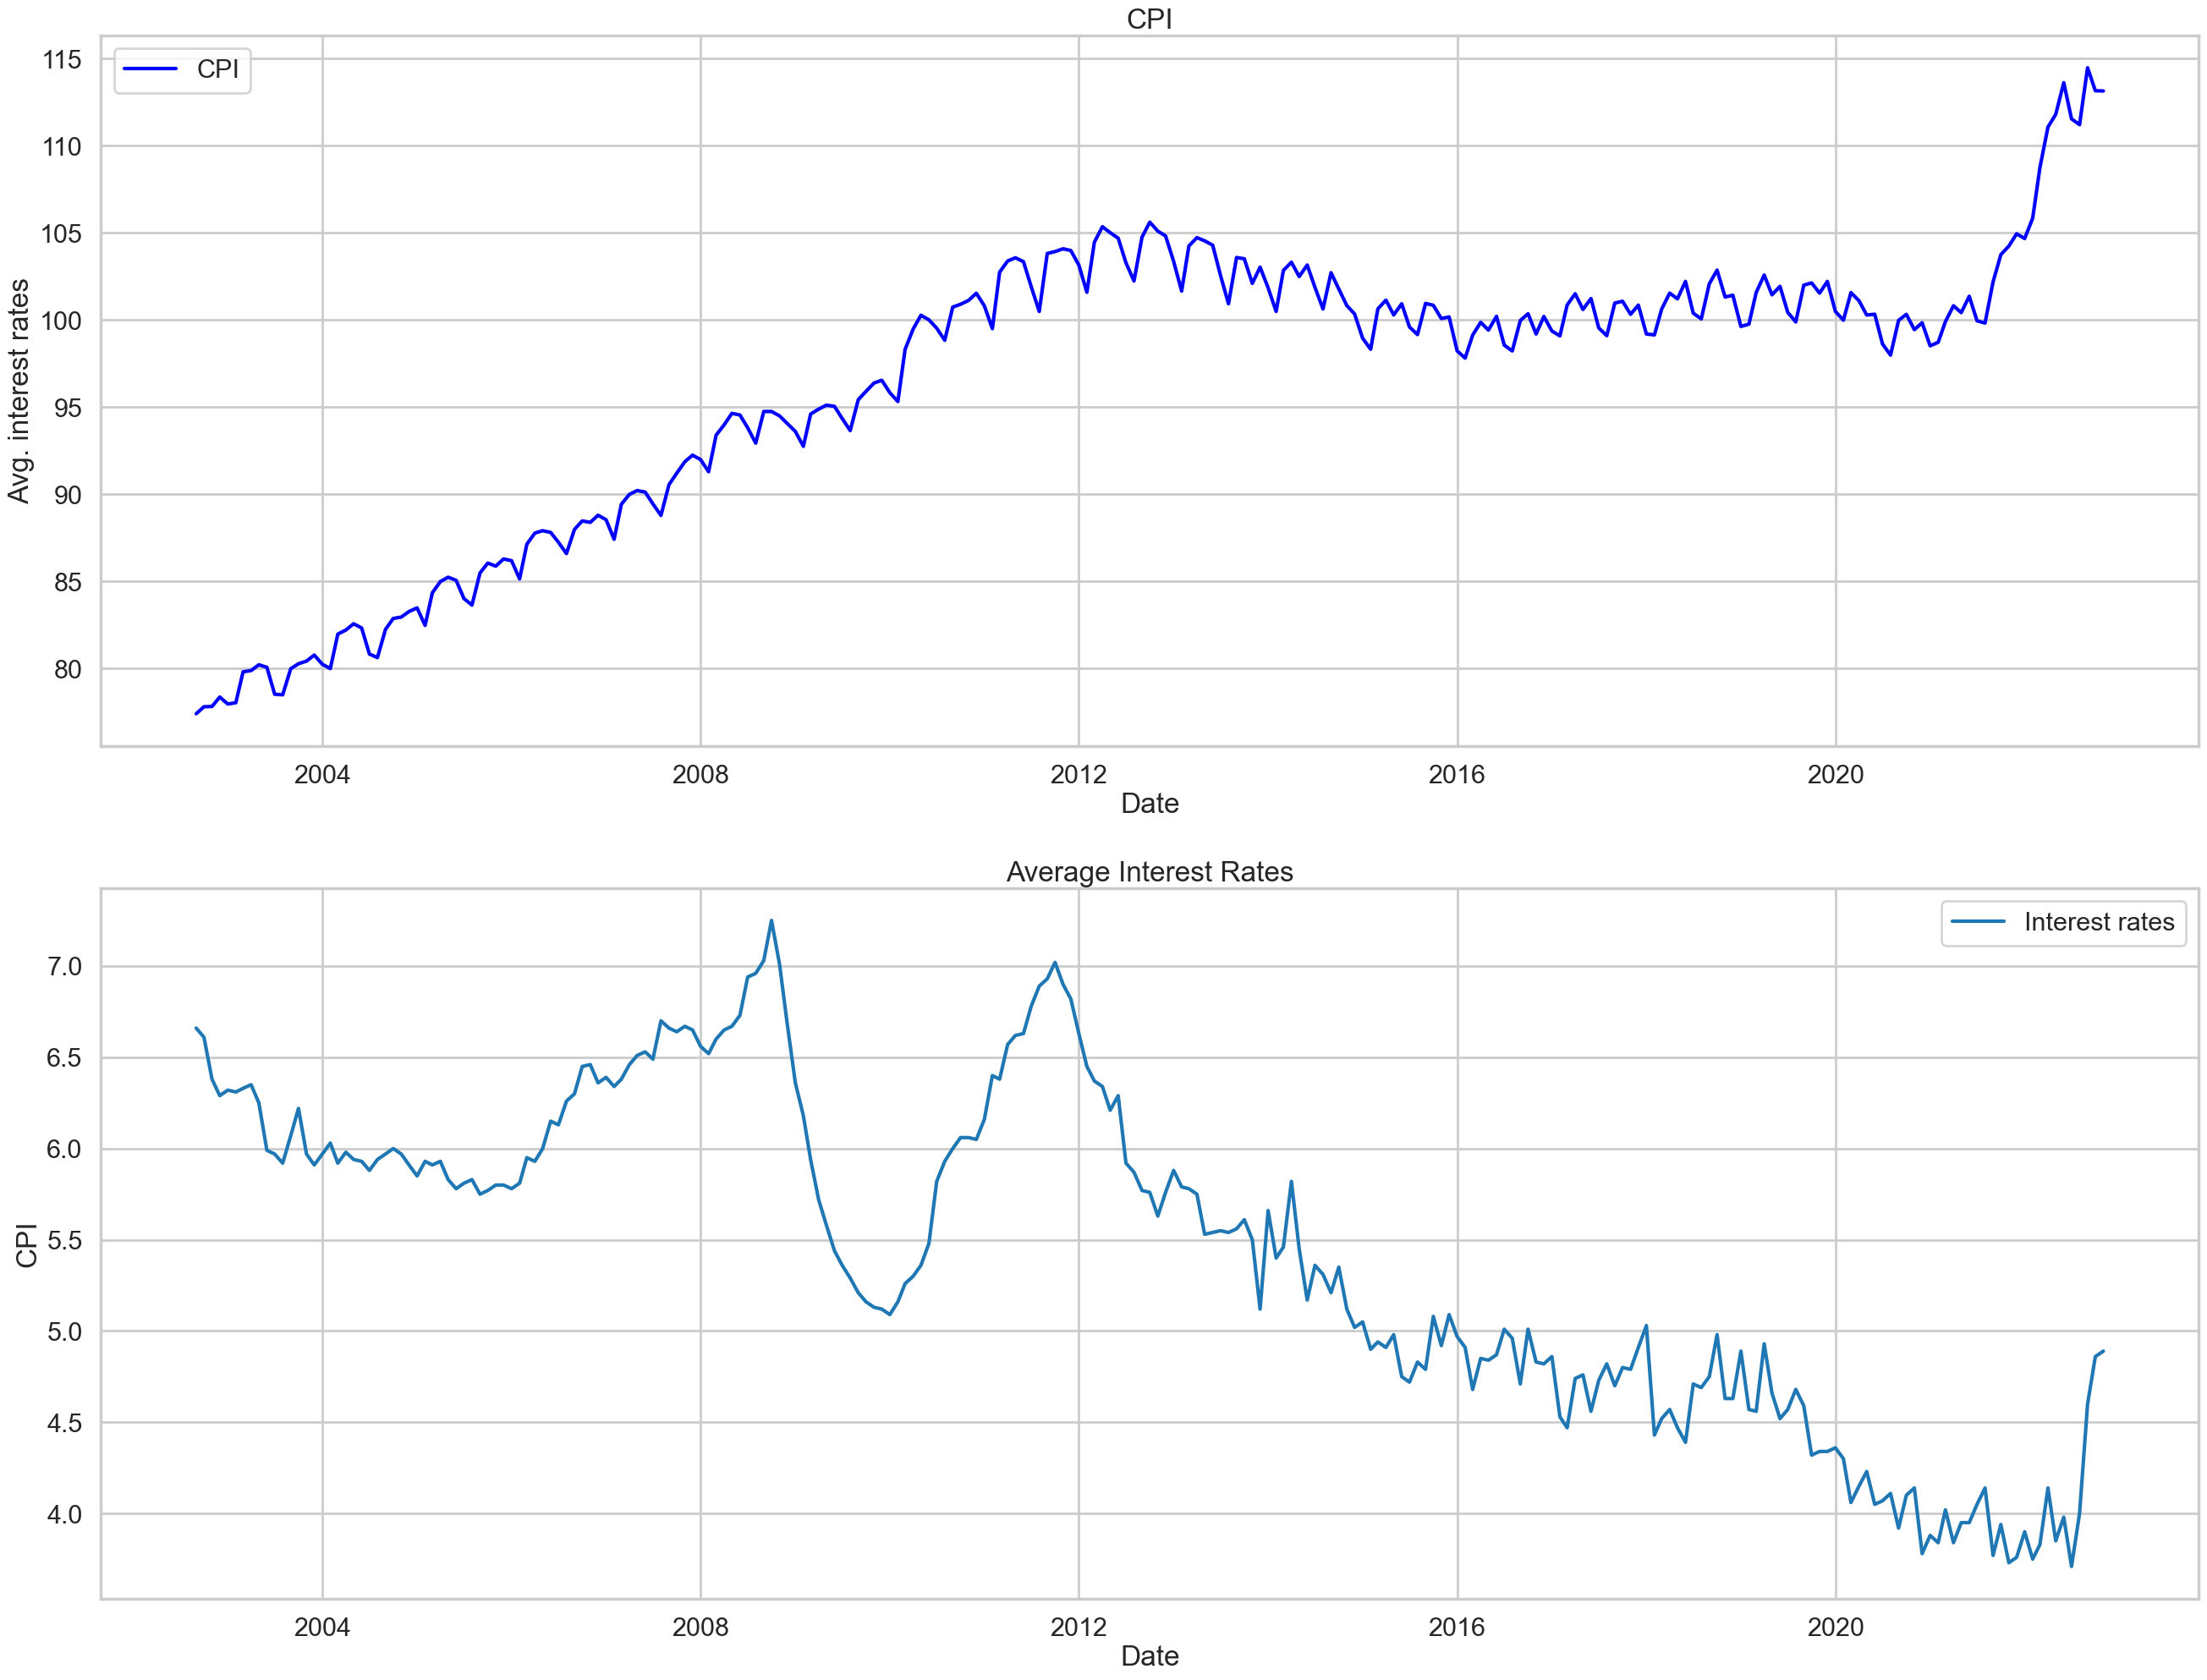

In [ ]:
fig, ax = plt.subplots(2, figsize = (32,24))
ax[0].plot(merged_data['CPI_index'], label = 'CPI', color = 'b')
ax[1].plot(merged_data['Average_interest_rates'], label = 'Interest rates')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('Avg. interest rates')
ax[1].set_ylabel('CPI')

ax[0].set_title('CPI')
ax[1].set_title('Average Interest Rates')

ax[0].legend()
ax[1].legend()

In [ ]:
merged_data['CPI_index'].corr(merged_data['Average_interest_rates'])

-0.5054746726258885

Text(0, 0.5, 'Average_interest_rates')

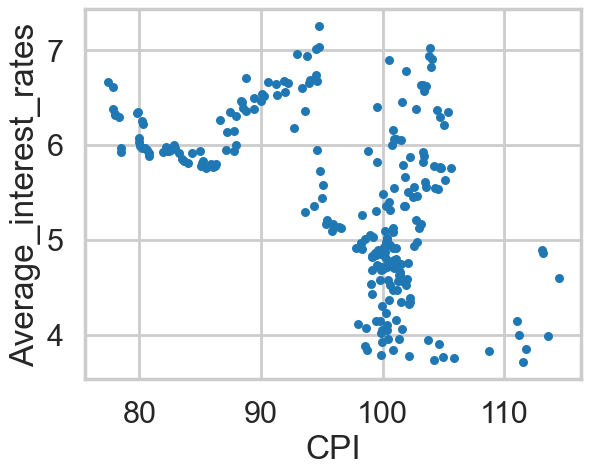

In [ ]:
plt.scatter(merged_data['CPI_index'], merged_data['Average_interest_rates'], s = 20)
plt.xlabel('CPI')
plt.ylabel('Average_interest_rates')

In [ ]:
merged_data = pd.merge(CPI, loans, right_index = True, left_index = True)

In [ ]:
merged_data.rename(columns = {'Total':'loans'}, inplace = True)

In [ ]:
merged_data = pd.merge(merged_data, deposits, left_index = True, right_index = True)

In [ ]:
merged_data.rename(columns = {'Total':'deposits'}, inplace = True)

In [ ]:
merged_data = pd.merge(merged_data, interest_rates, left_index = True, right_index = True)

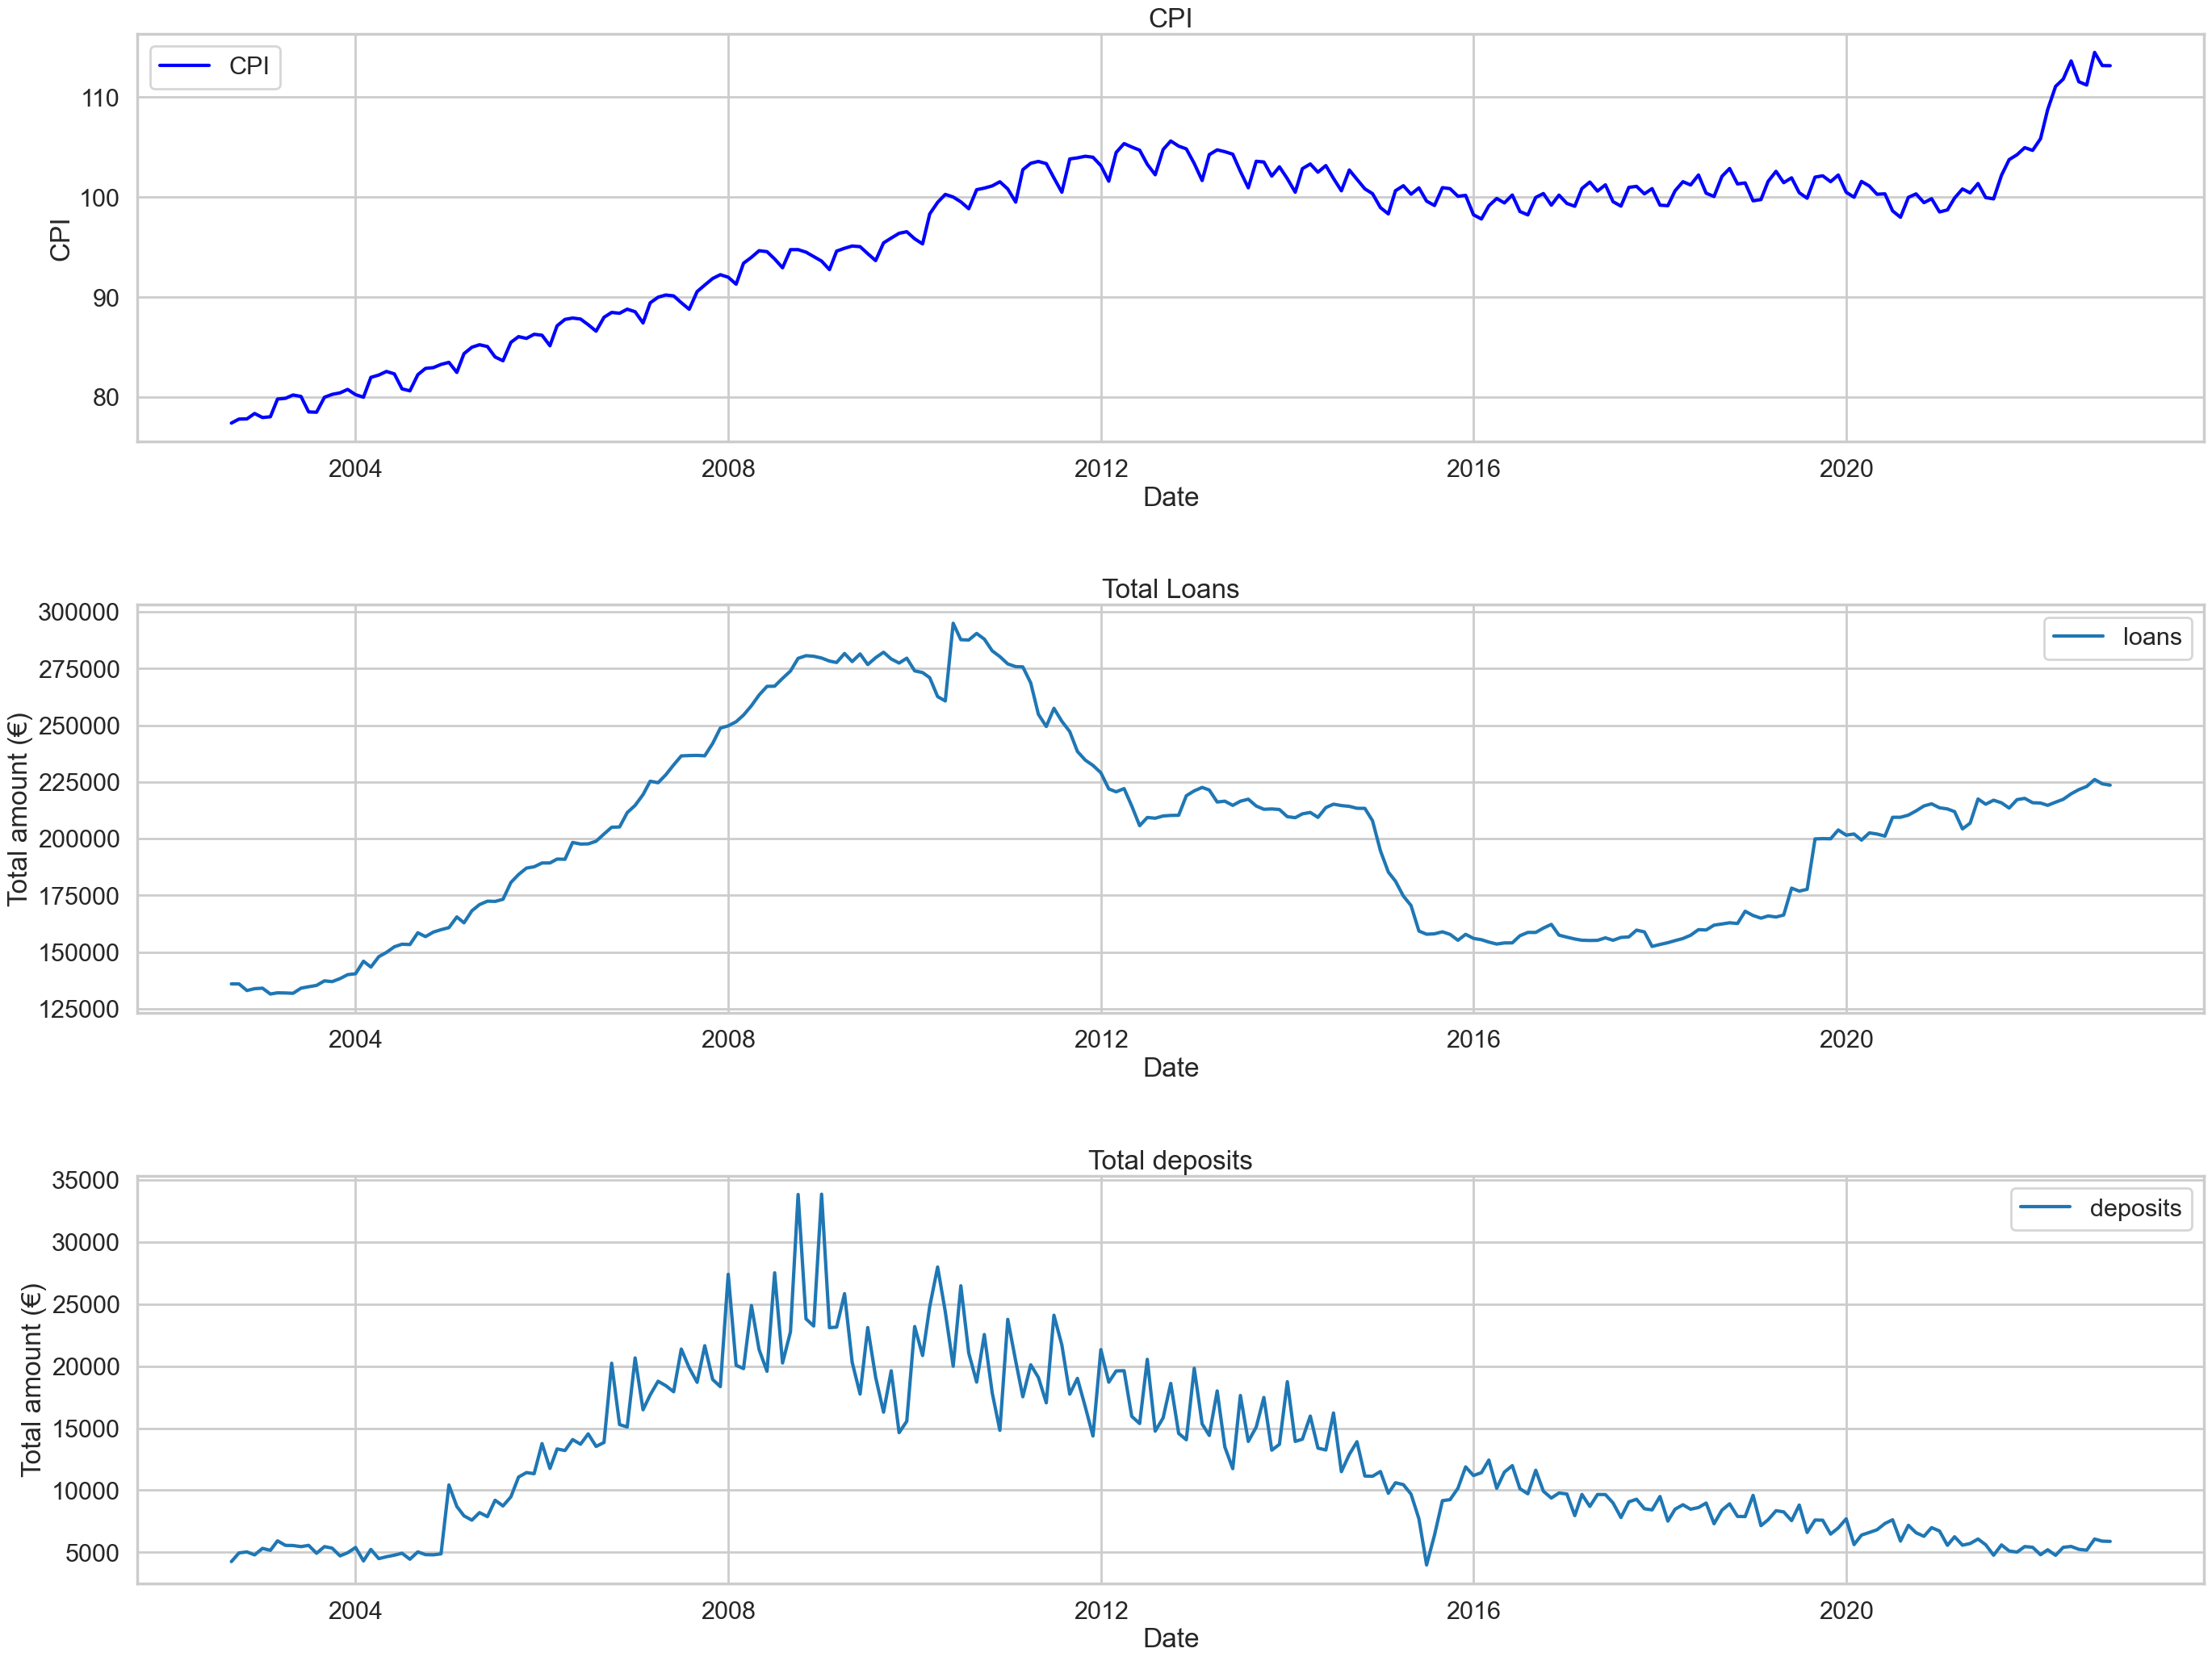

In [ ]:
fig, ax = plt.subplots(3, figsize = (32,24))
ax[0].plot(merged_data['CPI_index'], label = 'CPI', color = 'b')
ax[1].plot(merged_data['loans'], label = 'loans')
ax[2].plot(merged_data['deposits'], label = 'deposits')

ax[0].set_xlabel('Date')
ax[0].set_ylabel('CPI')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total amount (€)')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Total amount (€)')

ax[0].set_title('CPI')
ax[1].set_title('Total Loans')
ax[2].set_title('Total deposits')

ax[0].legend()
ax[1].legend()
ax[2].legend()


fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

In [ ]:
wages

Index  Ι
Date                
2000-03-01      76.6
2000-06-01      87.1
2000-09-01      93.0
2000-12-01     103.5
2001-03-01      82.1
...              ...
2021-12-01     118.8
2022-03-01     100.5
2022-06-01     112.3
2022-09-01     121.3
2022-12-01     124.1

[92 rows x 1 columns]

In [ ]:
monthly_wages = wages.asfreq('M', method='ffill')

In [ ]:
monthly_wages.index.dtype

dtype('<M8[ns]')

In [ ]:
monthly_wages['Month'] = monthly_wages.index.month
monthly_wages['Year'] = monthly_wages.index.year

In [ ]:
merged_data = pd.merge(monthly_wages, CPI, on = ['Month', 'Year'])

In [ ]:
merged_data['Date'] = monthly_wages.index

In [ ]:
merged_data.rename(columns = {'Index  Ι':'Wage index'}, inplace = True)

In [ ]:
merged_data.set_index('Date', inplace = True)

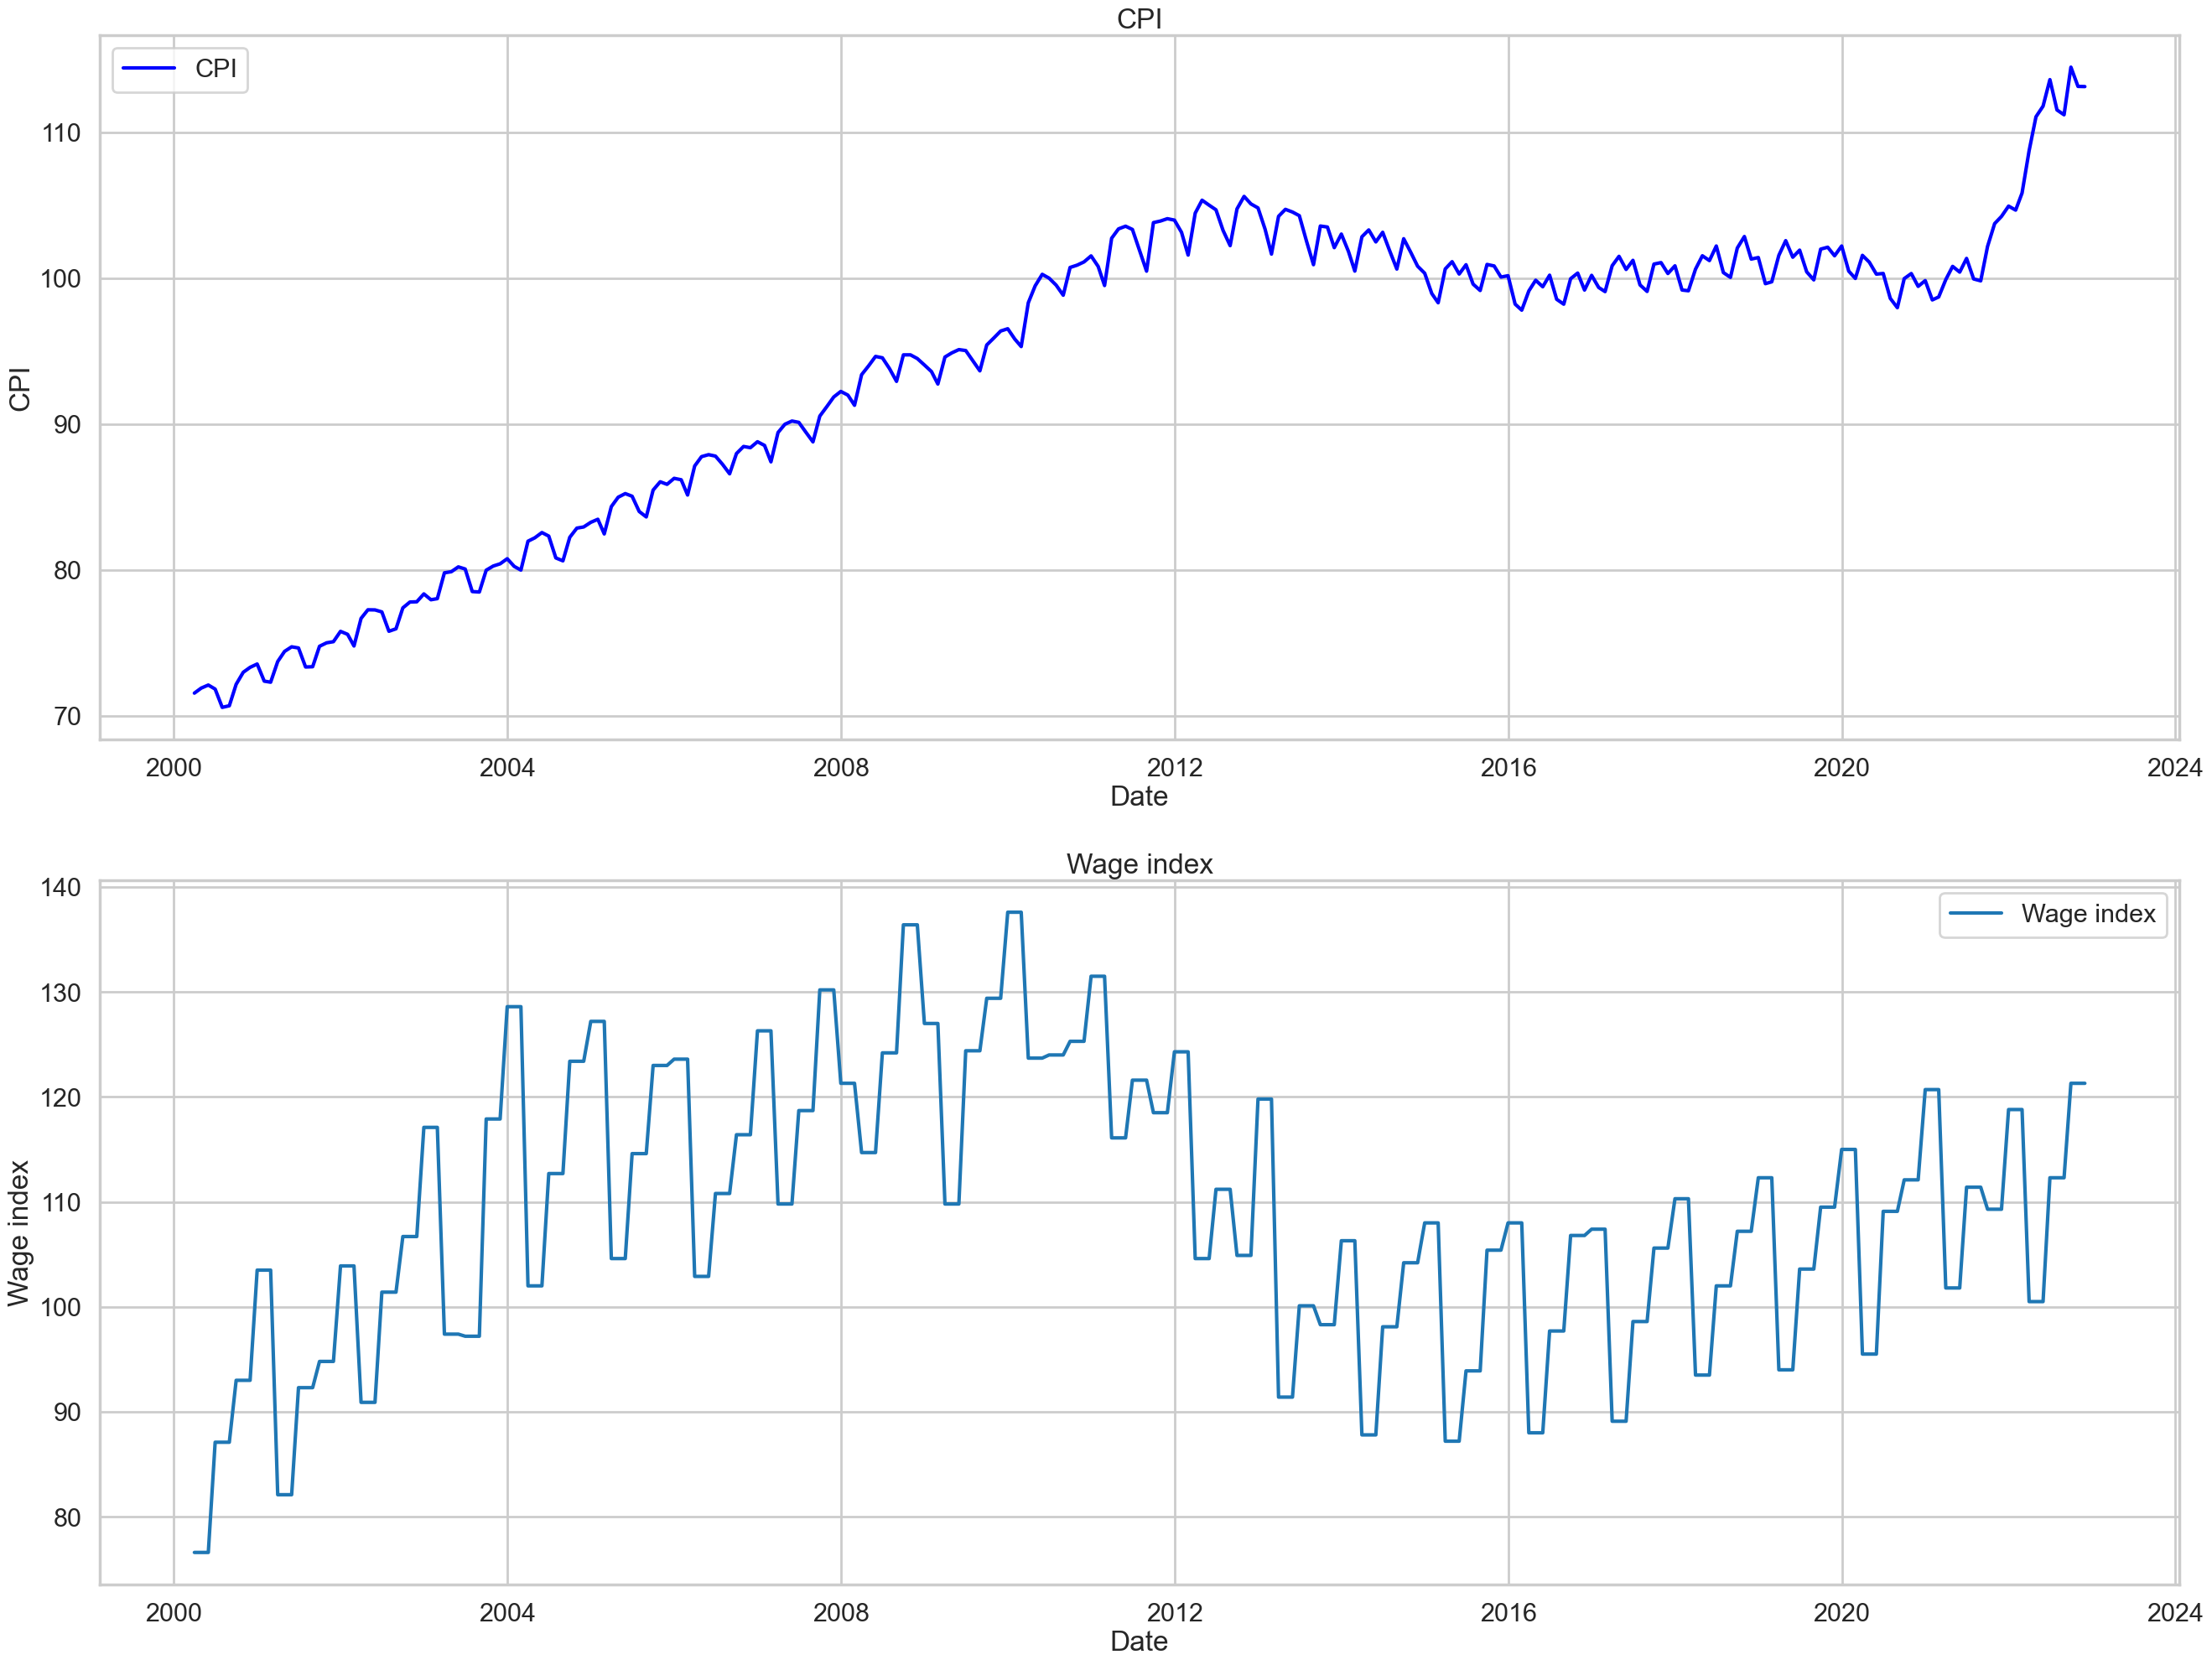

In [ ]:
fig, ax = plt.subplots(2, figsize = (32,24))
ax[0].plot(merged_data['CPI_index'], label = 'CPI', color = 'b')
ax[1].plot(merged_data['Wage index'], label = 'Wage index')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('CPI')
ax[1].set_ylabel('Wage index')

ax[0].set_title('CPI')
ax[1].set_title('Wage index')

ax[0].legend()
ax[1].legend()

In [ ]:
merged_data

Wage index  Month  Year   CPI_index
Date                                           
2000-03-31        76.6      3  2000   71.560157
2000-04-30        76.6      4  2000   71.905795
2000-05-31        76.6      5  2000   72.115056
2000-06-30        87.1      6  2000   71.837557
2000-07-31        87.1      7  2000   70.584720
...                ...    ...   ...         ...
2022-07-31       112.3      7  2022  111.543407
2022-08-31       112.3      8  2022  111.211375
2022-09-30       121.3      9  2022  114.478049
2022-10-31       121.3     10  2022  113.157924
2022-11-30       121.3     11  2022  113.146170

[273 rows x 4 columns]

In [ ]:
merged_data['Wage index'].corr(merged_data['CPI_index'])

0.15450161141893823

In [ ]:
unemployment_monthly = unemployment.asfreq('M', method='ffill')

In [ ]:
merged_data = pd.merge(CPI, unemployment, left_index = True, right_index = True)

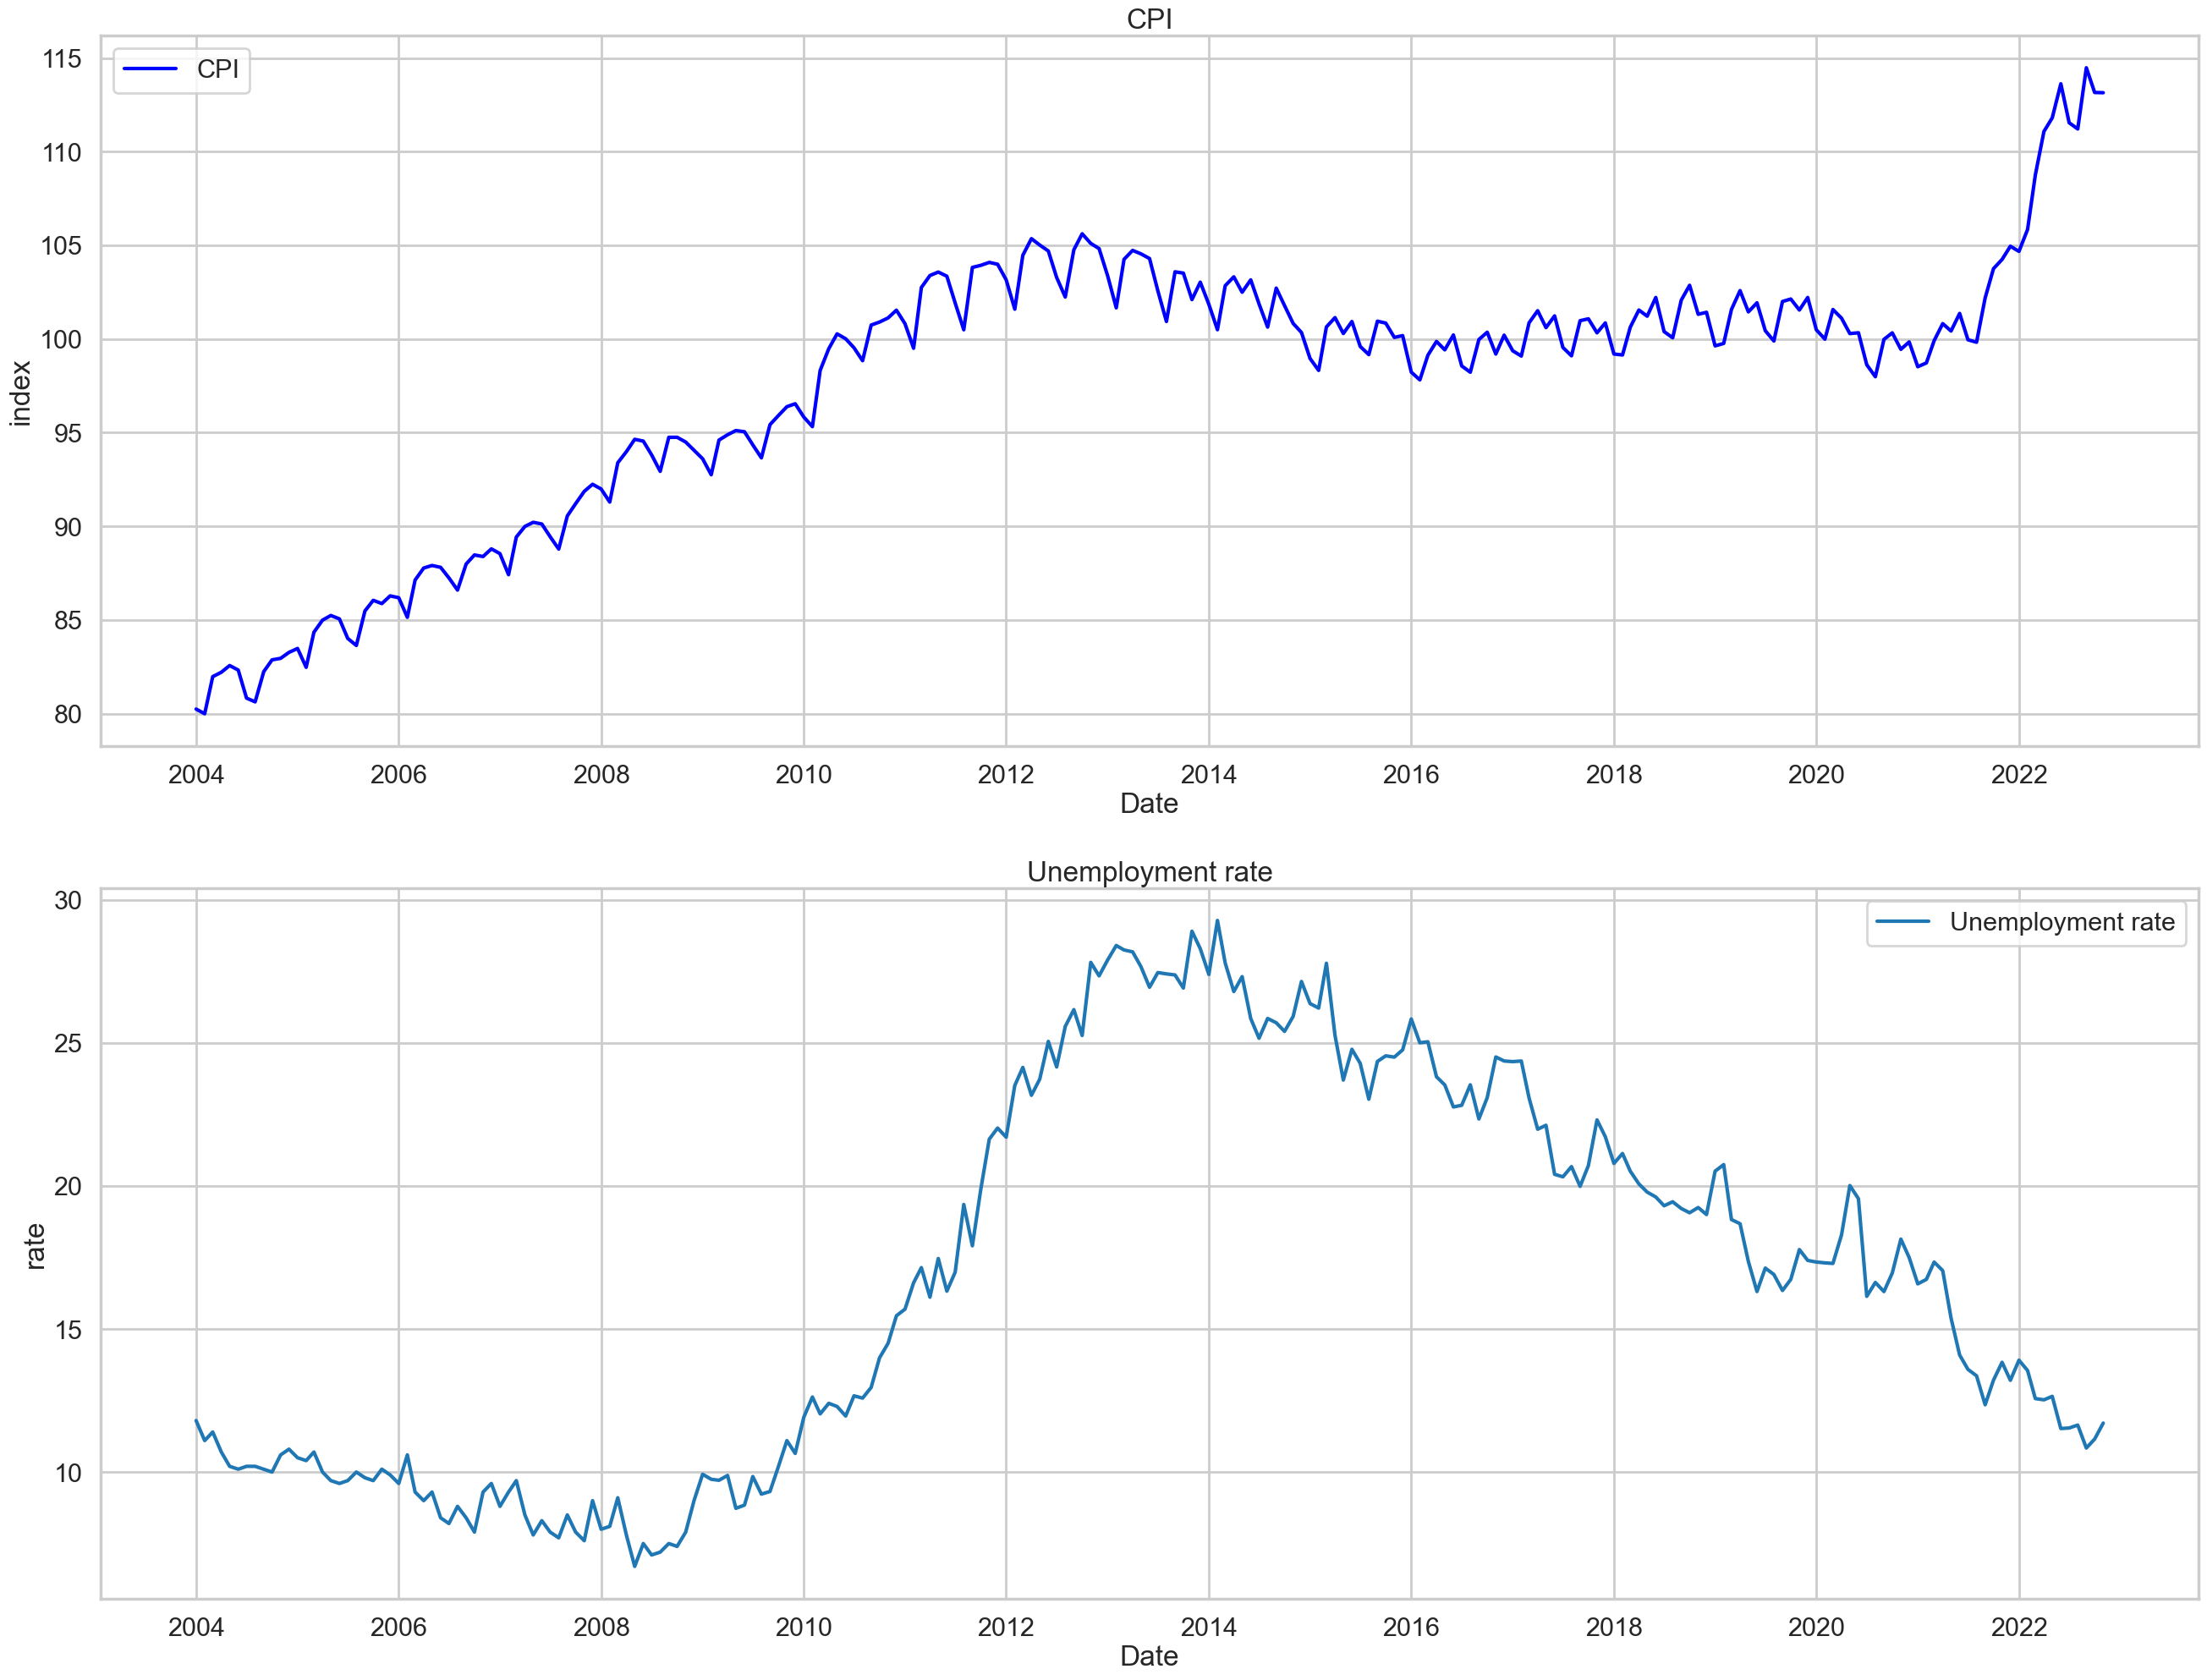

In [ ]:
fig, ax = plt.subplots(2, figsize = (32,24))
ax[0].plot(merged_data['CPI_index'], label = 'CPI', color = 'b')
ax[1].plot(merged_data['Unemployment rate'], label = 'Unemployment rate')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[0].set_ylabel('index')
ax[1].set_ylabel('rate')

ax[0].set_title('CPI')
ax[1].set_title('Unemployment rate')

ax[0].legend()
ax[1].legend()

In [ ]:
merged_data['Unemployment rate'].corr(merged_data['CPI_index'])

0.5857201610168918

In [ ]:
interest_rates.describe()

Average_interest_rates
count              243.000000
mean                 5.430988
std                  0.890413
min                  3.710000
25%                  4.745000
50%                  5.540000
75%                  6.100000
max                  7.250000

In [ ]:
PPI.rename(columns= {'Value':'PPI'}, inplace = True)

In [ ]:
CPI['CPI_index'].describe()

count    768.000000
mean      44.642449
std       41.412871
min        1.083857
25%        2.293768
50%       32.690111
75%       88.489198
max      114.478049
Name: CPI_index, dtype: float64

In [ ]:
CPI

CPI_index       Date  Month  Year
Date                                          
1959-01-01    1.083857 1959-01-01      1  1959
1959-02-01    1.083857 1959-02-01      2  1959
1959-03-01    1.088166 1959-03-01      3  1959
1959-04-01    1.096785 1959-04-01      4  1959
1959-05-01    1.094630 1959-05-01      5  1959
...                ...        ...    ...   ...
2022-08-01  111.211375 2022-08-01      8  2022
2022-09-01  114.478049 2022-09-01      9  2022
2022-10-01  113.157924 2022-10-01     10  2022
2022-11-01  113.146170 2022-11-01     11  2022
2022-12-01  112.532917 2022-12-01     12  2022

[768 rows x 4 columns]

In [ ]:
CPI.drop(['Date', 'Month', 'Year'], axis = 1, inplace = True)

In [ ]:
CPI

CPI_index
Date                  
1959-01-01    1.083857
1959-02-01    1.083857
1959-03-01    1.088166
1959-04-01    1.096785
1959-05-01    1.094630
...                ...
2022-08-01  111.211375
2022-09-01  114.478049
2022-10-01  113.157924
2022-11-01  113.146170
2022-12-01  112.532917

[768 rows x 1 columns]

# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(CPI, test_size = 0.1, shuffle = False)

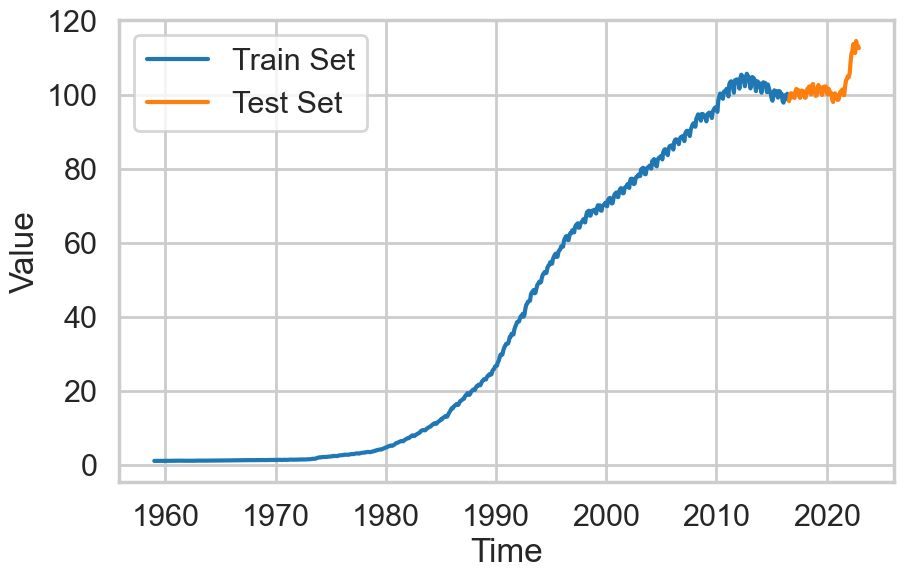

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size to be larger

# Plot the train_set
plt.plot(train_set, label='Train Set')

# Plot the test_set
plt.plot(test_set, label='Test Set')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()


In [ ]:
test_set

CPI_index
Date                  
2016-08-01   98.225729
2016-09-01   99.971710
2016-10-01  100.361022
2016-11-01   99.196005
2016-12-01  100.203162
...                ...
2022-08-01  111.211375
2022-09-01  114.478049
2022-10-01  113.157924
2022-11-01  113.146170
2022-12-01  112.532917

[77 rows x 1 columns]

# Baseline model - Persistence baseline

In [ ]:
baseline = test_set.shift(3)

In [ ]:
baseline.head(12)

CPI_index
Date                  
2016-08-01         NaN
2016-09-01         NaN
2016-10-01         NaN
2016-11-01   98.225729
2016-12-01   99.971710
2017-01-01  100.361022
2017-02-01   99.196005
2017-03-01  100.203162
2017-04-01   99.371932
2017-05-01   99.088461
2017-06-01  100.864098
2017-07-01  101.508636

In [ ]:
baseline.dropna(inplace = True)

In [ ]:
baseline.dropna()

CPI_index
Date                  
2016-11-01   98.225729
2016-12-01   99.971710
2017-01-01  100.361022
2017-02-01   99.196005
2017-03-01  100.203162
...                ...
2022-08-01  111.802846
2022-09-01  113.623166
2022-10-01  111.543407
2022-11-01  111.211375
2022-12-01  114.478049

[74 rows x 1 columns]

In [ ]:
baseline

CPI_index
Date                  
2016-11-01   98.225729
2016-12-01   99.971710
2017-01-01  100.361022
2017-02-01   99.196005
2017-03-01  100.203162
...                ...
2022-08-01  111.802846
2022-09-01  113.623166
2022-10-01  111.543407
2022-11-01  111.211375
2022-12-01  114.478049

[74 rows x 1 columns]

In [ ]:
test_set['CPI_index'].iloc[3:]

Date
2016-11-01     99.196005
2016-12-01    100.203162
2017-01-01     99.371932
2017-02-01     99.088461
2017-03-01    100.864098
                 ...    
2022-08-01    111.211375
2022-09-01    114.478049
2022-10-01    113.157924
2022-11-01    113.146170
2022-12-01    112.532917
Name: CPI_index, Length: 74, dtype: float64

In [ ]:
mse = ((test_set['CPI_index'].iloc[-12:] - baseline['CPI_index'][-12:]) ** 2).mean()
rmse = mse ** 0.5

In [ ]:
rmse

3.284637087801087

# ARIMA

In [ ]:
test_set.tail(36)

## Testing for stationarity

### Visually

Line chart shows that data is non-stationary

### ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_stat, pval, lags, obs, crit_vals, icbest = adfuller(CPI['CPI_index'])

In [ ]:
print(f"ADF statistic: {adf_stat}")
print(f"p-value: {pval}")

CPI is non stationary tha null hypothesis of non-stationarity(unit root) cannot be rejected, against the alternative of stationarity.

### KPSS test

In [ ]:
from statsmodels.tsa.stattools import kpss

# Assuming your time series is stored in the variable 'series'
# Perform KPSS test
result = kpss(CPI['CPI_index'])

# Extract test statistic, p-value, and lags used
test_statistic = result[0]
p_value = result[1]
lags_used = result[2]

# Print the results
print(f"KPSS Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Lags Used: {lags_used}")

we can reject the null hypothesis of stationarity and accept the alternative of unit root (non-stationarity)

Both the KPSS and adfuller test confirm the visual test of non-stationarity.

## Stationarising time series data

In [ ]:
train_diff = train_set.diff()

In [ ]:
train_diff

In [ ]:
train_diff.dropna(inplace = True)

In [ ]:
pval = adfuller(train_diff)[1]

In [ ]:
pval

In [ ]:
train_diff.plot()

In [ ]:
train_diff_2 = train_diff.diff()

In [ ]:
train_diff_2.dropna(inplace = True)

In [ ]:
pval = adfuller(train_diff_2)[1]

In [ ]:
pval

In [ ]:
train_seasonal_difference =   train_set.pct_change(periods=12)

In [ ]:
train_seasonal_difference.dropna(inplace = True)

In [ ]:
train_seasonal_difference

In [ ]:
train_seasonal_first_difference = train_seasonal_difference.diff()

In [ ]:
train_seasonal_first_difference.dropna(inplace = True)

In [ ]:
plt.figure(figsize = (10,8))
train_seasonal_first_difference.plot()
plt.title('First difference of seasonally differenced CPI data')
plt.xlabel("Time")
plt.ylabel("Value")



In [ ]:
pval = adfuller(train_seasonal_first_difference)[1]

In [ ]:
pval

In [ ]:
from statsmodels.tsa.stattools import kpss

# Assuming your time series is stored in the variable 'series'
# Perform KPSS test
result = kpss(train_seasonal_first_difference)

# Extract test statistic, p-value, and lags used
test_statistic = result[0]
p_value = result[1]
lags_used = result[2]

# Print the results
print(f"KPSS Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Lags Used: {lags_used}")

In [ ]:
test_seasonal_difference =  test_set.pct_change(periods = 12)

In [ ]:
test_seasonal_difference.dropna(inplace = True)

In [ ]:
test_seasonal_first_difference = test_seasonal_difference.diff()

In [ ]:
test_seasonal_first_difference.dropna(inplace = True)

## ARIMA

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_seasonal_first_difference, lags=30, ax=ax1)
plot_pacf(train_seasonal_first_difference, lags=30, ax=ax2)

# Set plot labels
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')

ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

endog = train_seasonal_first_difference
arima = ARIMA(endog, order = (4,0,4)).fit()

In [ ]:
arima.summary().tables[1]

In [ ]:
fitted_values = arima.fittedvalues

In [ ]:
fitted_values

In [ ]:
test_seasonal_first_difference

In [ ]:
test_seasonal_first_difference

In [ ]:
test_seasonal_first_difference

In [ ]:
endog = train_seasonal_first_difference['CPI_index']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Convert the 'endog' data to a list
history_endog = [x for x in endog]
predictions = [ ]

# Loop through the test observations and generate predictions
for i, test_obs in enumerate(test_seasonal_first_difference['CPI_index'][:-6]):
    model = ARIMA(history_endog, order=(4,0,4)).fit()
    yhat = model.forecast(steps = 3)[-1]
    predictions.append(yhat)
    history_endog.append(test_obs)

In [ ]:
len(predictions)

In [ ]:
predictions_series = pd.Series(predictions, name='Predictions', index=test_seasonal_first_difference[6:].index)


In [ ]:
len(predictions_series)

In [ ]:
test_seasonal_first_difference

In [ ]:
test_set

In [ ]:
predictions_series

In [ ]:
reversed_first_diff = predictions_series.cumsum()

In [ ]:
len(reversed_first_diff)

In [ ]:
test_seasonal_difference[6:]

In [ ]:
test_set['CPI_index'].shift(12)[19:]

In [ ]:
test_seasonal_difference[7:]

In [ ]:
test_set['CPI_index'].shift(12)[19:]

In [ ]:
reversed_first_diff

In [ ]:
reversed_seasonal_diff = test_set['CPI_index'].shift(12)[19:] * (1 + reversed_first_diff)

In [ ]:
reversed_seasonal_diff.dropna(inplace = True)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))

# Plotting the time series variable prediction
plt.plot(reversed_seasonal_diff, label='Prediction')
# Plotting the test_set DataFrame
plt.plot(test_set[19:], label='Test Set')


# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Variable')
plt.title('Time Series Variable Prediction vs Test Set')

# Adding a legend to differentiate the lines
plt.legend()
# Displaying the plot
plt.show()



In [ ]:
test_set

In [ ]:
reversed_seasonal_diff

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = test_set['CPI_index'][19:]  # Assuming this is the true values
y_pred = reversed_seasonal_diff  # Assuming this is the predicted values

mse = mean_squared_error(y_true, y_pred)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

# LSTM ANN

In [ ]:
pip install torch

In [ ]:
#test if it works
import torch
x = torch.rand(5, 3)
print(x)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

In [ ]:
pip install lightning

In [ ]:
pip install keras

In [ ]:
CPI

In [ ]:
temp = CPI['CPI_index']

In [ ]:
def CPI_to_X_y(df, window_size):
    X = []
    y = []
    CPI_as_np = df.to_numpy()

    for i in range(len(CPI_as_np) - window_size):
        row = [[a] for a in CPI_as_np[i:i+window_size]]
        X.append(row)
        label = CPI_as_np[i+window_size]
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X,y = CPI_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((763, 5, 1), (763,))

In [ ]:
X_train, y_train = X[:610], y[:610]
X_val, y_val = X[610:685], y[610:685]
X_test, y_test = X[685:], y[685:]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((610, 5, 1), (610,), (75, 5, 1), (75,), (78, 5, 1), (78,))

In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 1.8 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 714.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 835.1 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 2.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 M

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480503 sha256=0fdf4dd7dbcaa6d68a01eac2c45024ab8132272bbaf85842d5c87ddd0e3c03e2
  Stored in directory: /Users/dimitriskastrinakis/Library/Caches/pip/wheels/6a/8c/35/209bfba5979c08e883a5cfcb9f3ddf907f9dd1c37ee83c1f8d
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
Note: you may

In [ ]:
conda update --all

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::spyder-kernels==1.10.2=py38hecd8cb5_0
  - defaults/noarch::jupyterlab==3.0.14=pyhd3eb1b0_1
  - defaults/noarch::python-language-server==0.36.2=pyhd3eb1b0_0
  - defaults/osx-64::bokeh==2.3.2=py38hecd8cb5_0
  - defaults/osx-64::zope.event==4.5.0=py38_0
  - defaults/osx-64::matplotlib==3.3.4=py38hecd8cb5_0
  - defaults/noarch::jsonschema==3.2.0=py_2
  - defaults/noarch::pyls-spyder==0.3.2=pyhd3eb1b0_0
  - defaults/noarch::pygments==2.8.1=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn==0.24.1=py38hb2f4e1b_0
  - defaults/osx-64::ipython==7.22.0=py38h01d92e1_0
  - defaults/noarch::jupyterlab_server==2.4.0=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.18.1=py38hb2f4e1b_0
  - defaults/osx-64::distributed==2021.4.0=py38hecd8cb5_0
  - defaults/osx-64::matplotlib-base==3.3.4=py38h8b3ea08_0
  - defaults/noarch::nbclient==0.

pyobjc-framework-coc | 336 KB    | ##################################### | 100% 
pyobjc-framework-fse | 16 KB     | ##################################### | 100% 
applaunchservices-0. | 11 KB     | ##################################### | 100% 
navigator-updater-0. | 2.2 MB    | ##################################### | 100% 
pyobjc-core-9.0      | 415 KB    | ##################################### | 100% 
glib-2.69.1          | 3.0 MB    | ##################################### | 100% 
cffi-1.15.1          | 235 KB    | ##################################### | 100% 
libllvm14-14.0.6     | 24.1 MB   | ##################################### | 100% 
python-3.8.16        | 12.6 MB   | ##################################### | 100% 
python.app-3         | 20 KB     | ##################################### | 100% 
pyobjc-framework-cor | 40 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: failed

RemoveError: 'setuptools' is a dependency of conda

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError


In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /opt/anaconda3/bin/estimator_ckpt_converter
    /opt/anaconda3/bin/import_pb_to_tensorboard
    /opt/anaconda3/bin/saved_model_cli
    /opt/anaconda3/bin/tensorboard
    /opt/anaconda3/bin/tf_upgrade_v2
    /opt/anaconda3/bin/tflite_convert
    /opt/anaconda3/bin/toco
    /opt/anaconda3/bin/toco_from_protos
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow-2.12.0.dist-info/*
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/*
Proceed (Y/n)? 